In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import cv2
%matplotlib inline

In [2]:
TRAIN_DATA_PATH = "asl_alphabet_train" 

NUM_OF_LETTERS = 27 # "A" to "Z" 
IMAGE_SIZE = 50 #We'll be workign with 50 * 50 pixel images
NUM_OF_CHANNELS = 1 # Grayscale
NUM_OF_DENSE_LAYER_NODES = (IMAGE_SIZE * IMAGE_SIZE) // 2

LABELS = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
        'n','o', 'p', 'q','r', 's', 't','u', 'v', 'w', 'x', 'y', 'z']
print(len(LABELS))

26


In [3]:
#appending image of each type in list
y_unique = []
x_unique = []
for alphabet in os.listdir(TRAIN_DATA_PATH):
    for image in os.listdir(TRAIN_DATA_PATH+str('\\')+alphabet):
        X=imread(TRAIN_DATA_PATH+str('\\')+alphabet+str('\\')+image)
        x_unique.append(X)
        y_unique.append(alphabet)
        break

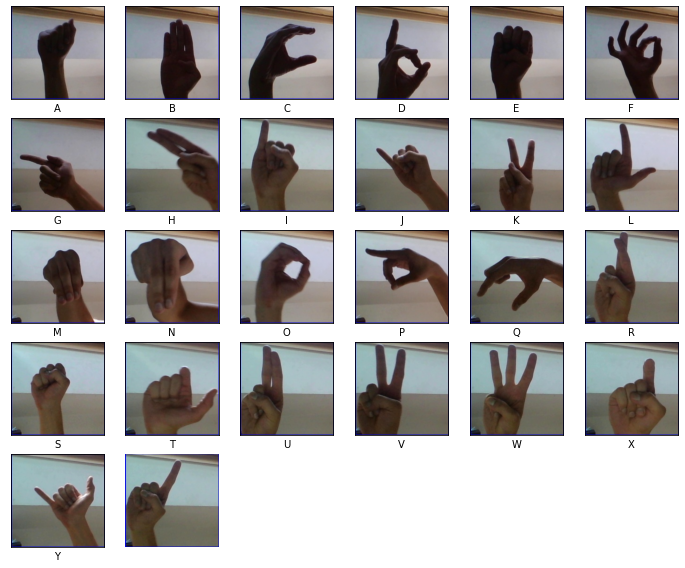

In [4]:
fig=plt.figure(figsize=(12,12))
for i in range(len(x_unique)):
    ax=fig.add_subplot(6,6,i+1)
    ax.imshow(x_unique[i])
    plt.xlabel(y_unique[i])
    plt.xticks([])
    plt.yticks([])
plt.axis('off')
plt.show()
fig.savefig('alphabet')

In [5]:
def create_data(DATA_PATH):
    x=[]
    y=[]
    paths=[]
    for label in LABELS:
        path = os.path.join(DATA_PATH, label)
        label_name = LABELS.index(label)
        for img in os.listdir(path):
            p=os.path.join(path, img)
            paths.append(p)
            print(p)
            try:
                img_array = cv2.imread(p)#os.path.join(path, img))
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                img_array = cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))
                x.append(img_array)
                y.append(label_name)
            except Exception as e:
                pass
    return x,y

X_train, y_train= create_data(TRAIN_DATA_PATH)


asl_alphabet_train\a\A1.jpg
asl_alphabet_train\a\A10.jpg
asl_alphabet_train\a\A100.jpg
asl_alphabet_train\a\A1000.jpg
asl_alphabet_train\a\A1001.jpg
asl_alphabet_train\a\A1002.jpg
asl_alphabet_train\a\A1003.jpg
asl_alphabet_train\a\A1004.jpg
asl_alphabet_train\a\A1005.jpg
asl_alphabet_train\a\A1006.jpg
asl_alphabet_train\a\A1007.jpg
asl_alphabet_train\a\A1008.jpg
asl_alphabet_train\a\A1009.jpg
asl_alphabet_train\a\A101.jpg
asl_alphabet_train\a\A1010.jpg
asl_alphabet_train\a\A1011.jpg
asl_alphabet_train\a\A1012.jpg
asl_alphabet_train\a\A1013.jpg
asl_alphabet_train\a\A1014.jpg
asl_alphabet_train\a\A1015.jpg
asl_alphabet_train\a\A1016.jpg
asl_alphabet_train\a\A1017.jpg
asl_alphabet_train\a\A1018.jpg
asl_alphabet_train\a\A1019.jpg
asl_alphabet_train\a\A102.jpg
asl_alphabet_train\a\A1020.jpg
asl_alphabet_train\a\A1021.jpg
asl_alphabet_train\a\A1022.jpg
asl_alphabet_train\a\A1023.jpg
asl_alphabet_train\a\A1024.jpg
asl_alphabet_train\a\A1025.jpg
asl_alphabet_train\a\A1026.jpg
asl_alphabet_tra

asl_alphabet_train\a\A1350.jpg
asl_alphabet_train\a\A1351.jpg
asl_alphabet_train\a\A1352.jpg
asl_alphabet_train\a\A1353.jpg
asl_alphabet_train\a\A1354.jpg
asl_alphabet_train\a\A1355.jpg
asl_alphabet_train\a\A1356.jpg
asl_alphabet_train\a\A1357.jpg
asl_alphabet_train\a\A1358.jpg
asl_alphabet_train\a\A1359.jpg
asl_alphabet_train\a\A136.jpg
asl_alphabet_train\a\A1360.jpg
asl_alphabet_train\a\A1361.jpg
asl_alphabet_train\a\A1362.jpg
asl_alphabet_train\a\A1363.jpg
asl_alphabet_train\a\A1364.jpg
asl_alphabet_train\a\A1365.jpg
asl_alphabet_train\a\A1366.jpg
asl_alphabet_train\a\A1367.jpg
asl_alphabet_train\a\A1368.jpg
asl_alphabet_train\a\A1369.jpg
asl_alphabet_train\a\A137.jpg
asl_alphabet_train\a\A1370.jpg
asl_alphabet_train\a\A1371.jpg
asl_alphabet_train\a\A1372.jpg
asl_alphabet_train\a\A1373.jpg
asl_alphabet_train\a\A1374.jpg
asl_alphabet_train\a\A1375.jpg
asl_alphabet_train\a\A1376.jpg
asl_alphabet_train\a\A1377.jpg
asl_alphabet_train\a\A1378.jpg
asl_alphabet_train\a\A1379.jpg
asl_alphab

asl_alphabet_train\a\A1685.jpg
asl_alphabet_train\a\A1686.jpg
asl_alphabet_train\a\A1687.jpg
asl_alphabet_train\a\A1688.jpg
asl_alphabet_train\a\A1689.jpg
asl_alphabet_train\a\A169.jpg
asl_alphabet_train\a\A1690.jpg
asl_alphabet_train\a\A1691.jpg
asl_alphabet_train\a\A1692.jpg
asl_alphabet_train\a\A1693.jpg
asl_alphabet_train\a\A1694.jpg
asl_alphabet_train\a\A1695.jpg
asl_alphabet_train\a\A1696.jpg
asl_alphabet_train\a\A1697.jpg
asl_alphabet_train\a\A1698.jpg
asl_alphabet_train\a\A1699.jpg
asl_alphabet_train\a\A17.jpg
asl_alphabet_train\a\A170.jpg
asl_alphabet_train\a\A1700.jpg
asl_alphabet_train\a\A1701.jpg
asl_alphabet_train\a\A1702.jpg
asl_alphabet_train\a\A1703.jpg
asl_alphabet_train\a\A1704.jpg
asl_alphabet_train\a\A1705.jpg
asl_alphabet_train\a\A1706.jpg
asl_alphabet_train\a\A1707.jpg
asl_alphabet_train\a\A1708.jpg
asl_alphabet_train\a\A1709.jpg
asl_alphabet_train\a\A171.jpg
asl_alphabet_train\a\A1710.jpg
asl_alphabet_train\a\A1711.jpg
asl_alphabet_train\a\A1712.jpg
asl_alphabet_

asl_alphabet_train\a\A2034.jpg
asl_alphabet_train\a\A2035.jpg
asl_alphabet_train\a\A2036.jpg
asl_alphabet_train\a\A2037.jpg
asl_alphabet_train\a\A2038.jpg
asl_alphabet_train\a\A2039.jpg
asl_alphabet_train\a\A204.jpg
asl_alphabet_train\a\A2040.jpg
asl_alphabet_train\a\A2041.jpg
asl_alphabet_train\a\A2042.jpg
asl_alphabet_train\a\A2043.jpg
asl_alphabet_train\a\A2044.jpg
asl_alphabet_train\a\A2045.jpg
asl_alphabet_train\a\A2046.jpg
asl_alphabet_train\a\A2047.jpg
asl_alphabet_train\a\A2048.jpg
asl_alphabet_train\a\A2049.jpg
asl_alphabet_train\a\A205.jpg
asl_alphabet_train\a\A2050.jpg
asl_alphabet_train\a\A2051.jpg
asl_alphabet_train\a\A2052.jpg
asl_alphabet_train\a\A2053.jpg
asl_alphabet_train\a\A2054.jpg
asl_alphabet_train\a\A2055.jpg
asl_alphabet_train\a\A2056.jpg
asl_alphabet_train\a\A2057.jpg
asl_alphabet_train\a\A2058.jpg
asl_alphabet_train\a\A2059.jpg
asl_alphabet_train\a\A206.jpg
asl_alphabet_train\a\A2060.jpg
asl_alphabet_train\a\A2061.jpg
asl_alphabet_train\a\A2062.jpg
asl_alphabe

asl_alphabet_train\a\A2328.jpg
asl_alphabet_train\a\A2329.jpg
asl_alphabet_train\a\A233.jpg
asl_alphabet_train\a\A2330.jpg
asl_alphabet_train\a\A2331.jpg
asl_alphabet_train\a\A2332.jpg
asl_alphabet_train\a\A2333.jpg
asl_alphabet_train\a\A2334.jpg
asl_alphabet_train\a\A2335.jpg
asl_alphabet_train\a\A2336.jpg
asl_alphabet_train\a\A2337.jpg
asl_alphabet_train\a\A2338.jpg
asl_alphabet_train\a\A2339.jpg
asl_alphabet_train\a\A234.jpg
asl_alphabet_train\a\A2340.jpg
asl_alphabet_train\a\A2341.jpg
asl_alphabet_train\a\A2342.jpg
asl_alphabet_train\a\A2343.jpg
asl_alphabet_train\a\A2344.jpg
asl_alphabet_train\a\A2345.jpg
asl_alphabet_train\a\A2346.jpg
asl_alphabet_train\a\A2347.jpg
asl_alphabet_train\a\A2348.jpg
asl_alphabet_train\a\A2349.jpg
asl_alphabet_train\a\A235.jpg
asl_alphabet_train\a\A2350.jpg
asl_alphabet_train\a\A2351.jpg
asl_alphabet_train\a\A2352.jpg
asl_alphabet_train\a\A2353.jpg
asl_alphabet_train\a\A2354.jpg
asl_alphabet_train\a\A2355.jpg
asl_alphabet_train\a\A2356.jpg
asl_alphabe

asl_alphabet_train\a\A2681.jpg
asl_alphabet_train\a\A2682.jpg
asl_alphabet_train\a\A2683.jpg
asl_alphabet_train\a\A2684.jpg
asl_alphabet_train\a\A2685.jpg
asl_alphabet_train\a\A2686.jpg
asl_alphabet_train\a\A2687.jpg
asl_alphabet_train\a\A2688.jpg
asl_alphabet_train\a\A2689.jpg
asl_alphabet_train\a\A269.jpg
asl_alphabet_train\a\A2690.jpg
asl_alphabet_train\a\A2691.jpg
asl_alphabet_train\a\A2692.jpg
asl_alphabet_train\a\A2693.jpg
asl_alphabet_train\a\A2694.jpg
asl_alphabet_train\a\A2695.jpg
asl_alphabet_train\a\A2696.jpg
asl_alphabet_train\a\A2697.jpg
asl_alphabet_train\a\A2698.jpg
asl_alphabet_train\a\A2699.jpg
asl_alphabet_train\a\A27.jpg
asl_alphabet_train\a\A270.jpg
asl_alphabet_train\a\A2700.jpg
asl_alphabet_train\a\A2701.jpg
asl_alphabet_train\a\A2702.jpg
asl_alphabet_train\a\A2703.jpg
asl_alphabet_train\a\A2704.jpg
asl_alphabet_train\a\A2705.jpg
asl_alphabet_train\a\A2706.jpg
asl_alphabet_train\a\A2707.jpg
asl_alphabet_train\a\A2708.jpg
asl_alphabet_train\a\A2709.jpg
asl_alphabet

asl_alphabet_train\a\A443.jpg
asl_alphabet_train\a\A444.jpg
asl_alphabet_train\a\A445.jpg
asl_alphabet_train\a\A446.jpg
asl_alphabet_train\a\A447.jpg
asl_alphabet_train\a\A448.jpg
asl_alphabet_train\a\A449.jpg
asl_alphabet_train\a\A45.jpg
asl_alphabet_train\a\A450.jpg
asl_alphabet_train\a\A451.jpg
asl_alphabet_train\a\A452.jpg
asl_alphabet_train\a\A453.jpg
asl_alphabet_train\a\A454.jpg
asl_alphabet_train\a\A455.jpg
asl_alphabet_train\a\A456.jpg
asl_alphabet_train\a\A457.jpg
asl_alphabet_train\a\A458.jpg
asl_alphabet_train\a\A459.jpg
asl_alphabet_train\a\A46.jpg
asl_alphabet_train\a\A460.jpg
asl_alphabet_train\a\A461.jpg
asl_alphabet_train\a\A462.jpg
asl_alphabet_train\a\A463.jpg
asl_alphabet_train\a\A464.jpg
asl_alphabet_train\a\A465.jpg
asl_alphabet_train\a\A466.jpg
asl_alphabet_train\a\A467.jpg
asl_alphabet_train\a\A468.jpg
asl_alphabet_train\a\A469.jpg
asl_alphabet_train\a\A47.jpg
asl_alphabet_train\a\A470.jpg
asl_alphabet_train\a\A471.jpg
asl_alphabet_train\a\A472.jpg
asl_alphabet_

asl_alphabet_train\a\A810.jpg
asl_alphabet_train\a\A811.jpg
asl_alphabet_train\a\A812.jpg
asl_alphabet_train\a\A813.jpg
asl_alphabet_train\a\A814.jpg
asl_alphabet_train\a\A815.jpg
asl_alphabet_train\a\A816.jpg
asl_alphabet_train\a\A817.jpg
asl_alphabet_train\a\A818.jpg
asl_alphabet_train\a\A819.jpg
asl_alphabet_train\a\A82.jpg
asl_alphabet_train\a\A820.jpg
asl_alphabet_train\a\A821.jpg
asl_alphabet_train\a\A822.jpg
asl_alphabet_train\a\A823.jpg
asl_alphabet_train\a\A824.jpg
asl_alphabet_train\a\A825.jpg
asl_alphabet_train\a\A826.jpg
asl_alphabet_train\a\A827.jpg
asl_alphabet_train\a\A828.jpg
asl_alphabet_train\a\A829.jpg
asl_alphabet_train\a\A83.jpg
asl_alphabet_train\a\A830.jpg
asl_alphabet_train\a\A831.jpg
asl_alphabet_train\a\A832.jpg
asl_alphabet_train\a\A833.jpg
asl_alphabet_train\a\A834.jpg
asl_alphabet_train\a\A835.jpg
asl_alphabet_train\a\A836.jpg
asl_alphabet_train\a\A837.jpg
asl_alphabet_train\a\A838.jpg
asl_alphabet_train\a\A839.jpg
asl_alphabet_train\a\A84.jpg
asl_alphabet_

asl_alphabet_train\b\B1156.jpg
asl_alphabet_train\b\B1157.jpg
asl_alphabet_train\b\B1158.jpg
asl_alphabet_train\b\B1159.jpg
asl_alphabet_train\b\B116.jpg
asl_alphabet_train\b\B1160.jpg
asl_alphabet_train\b\B1161.jpg
asl_alphabet_train\b\B1162.jpg
asl_alphabet_train\b\B1163.jpg
asl_alphabet_train\b\B1164.jpg
asl_alphabet_train\b\B1165.jpg
asl_alphabet_train\b\B1166.jpg
asl_alphabet_train\b\B1167.jpg
asl_alphabet_train\b\B1168.jpg
asl_alphabet_train\b\B1169.jpg
asl_alphabet_train\b\B117.jpg
asl_alphabet_train\b\B1170.jpg
asl_alphabet_train\b\B1171.jpg
asl_alphabet_train\b\B1172.jpg
asl_alphabet_train\b\B1173.jpg
asl_alphabet_train\b\B1174.jpg
asl_alphabet_train\b\B1175.jpg
asl_alphabet_train\b\B1176.jpg
asl_alphabet_train\b\B1177.jpg
asl_alphabet_train\b\B1178.jpg
asl_alphabet_train\b\B1179.jpg
asl_alphabet_train\b\B118.jpg
asl_alphabet_train\b\B1180.jpg
asl_alphabet_train\b\B1181.jpg
asl_alphabet_train\b\B1182.jpg
asl_alphabet_train\b\B1183.jpg
asl_alphabet_train\b\B1184.jpg
asl_alphabe

asl_alphabet_train\b\B1422.jpg
asl_alphabet_train\b\B1423.jpg
asl_alphabet_train\b\B1424.jpg
asl_alphabet_train\b\B1425.jpg
asl_alphabet_train\b\B1426.jpg
asl_alphabet_train\b\B1427.jpg
asl_alphabet_train\b\B1428.jpg
asl_alphabet_train\b\B1429.jpg
asl_alphabet_train\b\B143.jpg
asl_alphabet_train\b\B1430.jpg
asl_alphabet_train\b\B1431.jpg
asl_alphabet_train\b\B1432.jpg
asl_alphabet_train\b\B1433.jpg
asl_alphabet_train\b\B1434.jpg
asl_alphabet_train\b\B1435.jpg
asl_alphabet_train\b\B1436.jpg
asl_alphabet_train\b\B1437.jpg
asl_alphabet_train\b\B1438.jpg
asl_alphabet_train\b\B1439.jpg
asl_alphabet_train\b\B144.jpg
asl_alphabet_train\b\B1440.jpg
asl_alphabet_train\b\B1441.jpg
asl_alphabet_train\b\B1442.jpg
asl_alphabet_train\b\B1443.jpg
asl_alphabet_train\b\B1444.jpg
asl_alphabet_train\b\B1445.jpg
asl_alphabet_train\b\B1446.jpg
asl_alphabet_train\b\B1447.jpg
asl_alphabet_train\b\B1448.jpg
asl_alphabet_train\b\B1449.jpg
asl_alphabet_train\b\B145.jpg
asl_alphabet_train\b\B1450.jpg
asl_alphabe

asl_alphabet_train\b\B17.jpg
asl_alphabet_train\b\B170.jpg
asl_alphabet_train\b\B1700.jpg
asl_alphabet_train\b\B1701.jpg
asl_alphabet_train\b\B1702.jpg
asl_alphabet_train\b\B1703.jpg
asl_alphabet_train\b\B1704.jpg
asl_alphabet_train\b\B1705.jpg
asl_alphabet_train\b\B1706.jpg
asl_alphabet_train\b\B1707.jpg
asl_alphabet_train\b\B1708.jpg
asl_alphabet_train\b\B1709.jpg
asl_alphabet_train\b\B171.jpg
asl_alphabet_train\b\B1710.jpg
asl_alphabet_train\b\B1711.jpg
asl_alphabet_train\b\B1712.jpg
asl_alphabet_train\b\B1713.jpg
asl_alphabet_train\b\B1714.jpg
asl_alphabet_train\b\B1715.jpg
asl_alphabet_train\b\B1716.jpg
asl_alphabet_train\b\B1717.jpg
asl_alphabet_train\b\B1718.jpg
asl_alphabet_train\b\B1719.jpg
asl_alphabet_train\b\B172.jpg
asl_alphabet_train\b\B1720.jpg
asl_alphabet_train\b\B1721.jpg
asl_alphabet_train\b\B1722.jpg
asl_alphabet_train\b\B1723.jpg
asl_alphabet_train\b\B1724.jpg
asl_alphabet_train\b\B1725.jpg
asl_alphabet_train\b\B1726.jpg
asl_alphabet_train\b\B1727.jpg
asl_alphabet_

asl_alphabet_train\b\B2015.jpg
asl_alphabet_train\b\B2016.jpg
asl_alphabet_train\b\B2017.jpg
asl_alphabet_train\b\B2018.jpg
asl_alphabet_train\b\B2019.jpg
asl_alphabet_train\b\B202.jpg
asl_alphabet_train\b\B2020.jpg
asl_alphabet_train\b\B2021.jpg
asl_alphabet_train\b\B2022.jpg
asl_alphabet_train\b\B2023.jpg
asl_alphabet_train\b\B2024.jpg
asl_alphabet_train\b\B2025.jpg
asl_alphabet_train\b\B2026.jpg
asl_alphabet_train\b\B2027.jpg
asl_alphabet_train\b\B2028.jpg
asl_alphabet_train\b\B2029.jpg
asl_alphabet_train\b\B203.jpg
asl_alphabet_train\b\B2030.jpg
asl_alphabet_train\b\B2031.jpg
asl_alphabet_train\b\B2032.jpg
asl_alphabet_train\b\B2033.jpg
asl_alphabet_train\b\B2034.jpg
asl_alphabet_train\b\B2035.jpg
asl_alphabet_train\b\B2036.jpg
asl_alphabet_train\b\B2037.jpg
asl_alphabet_train\b\B2038.jpg
asl_alphabet_train\b\B2039.jpg
asl_alphabet_train\b\B204.jpg
asl_alphabet_train\b\B2040.jpg
asl_alphabet_train\b\B2041.jpg
asl_alphabet_train\b\B2042.jpg
asl_alphabet_train\b\B2043.jpg
asl_alphabe

asl_alphabet_train\b\B2396.jpg
asl_alphabet_train\b\B2397.jpg
asl_alphabet_train\b\B2398.jpg
asl_alphabet_train\b\B2399.jpg
asl_alphabet_train\b\B24.jpg
asl_alphabet_train\b\B240.jpg
asl_alphabet_train\b\B2400.jpg
asl_alphabet_train\b\B2401.jpg
asl_alphabet_train\b\B2402.jpg
asl_alphabet_train\b\B2403.jpg
asl_alphabet_train\b\B2404.jpg
asl_alphabet_train\b\B2405.jpg
asl_alphabet_train\b\B2406.jpg
asl_alphabet_train\b\B2407.jpg
asl_alphabet_train\b\B2408.jpg
asl_alphabet_train\b\B2409.jpg
asl_alphabet_train\b\B241.jpg
asl_alphabet_train\b\B2410.jpg
asl_alphabet_train\b\B2411.jpg
asl_alphabet_train\b\B2412.jpg
asl_alphabet_train\b\B2413.jpg
asl_alphabet_train\b\B2414.jpg
asl_alphabet_train\b\B2415.jpg
asl_alphabet_train\b\B2416.jpg
asl_alphabet_train\b\B2417.jpg
asl_alphabet_train\b\B2418.jpg
asl_alphabet_train\b\B2419.jpg
asl_alphabet_train\b\B242.jpg
asl_alphabet_train\b\B2420.jpg
asl_alphabet_train\b\B2421.jpg
asl_alphabet_train\b\B2422.jpg
asl_alphabet_train\b\B2423.jpg
asl_alphabet_

asl_alphabet_train\b\B2649.jpg
asl_alphabet_train\b\B265.jpg
asl_alphabet_train\b\B2650.jpg
asl_alphabet_train\b\B2651.jpg
asl_alphabet_train\b\B2652.jpg
asl_alphabet_train\b\B2653.jpg
asl_alphabet_train\b\B2654.jpg
asl_alphabet_train\b\B2655.jpg
asl_alphabet_train\b\B2656.jpg
asl_alphabet_train\b\B2657.jpg
asl_alphabet_train\b\B2658.jpg
asl_alphabet_train\b\B2659.jpg
asl_alphabet_train\b\B266.jpg
asl_alphabet_train\b\B2660.jpg
asl_alphabet_train\b\B2661.jpg
asl_alphabet_train\b\B2662.jpg
asl_alphabet_train\b\B2663.jpg
asl_alphabet_train\b\B2664.jpg
asl_alphabet_train\b\B2665.jpg
asl_alphabet_train\b\B2666.jpg
asl_alphabet_train\b\B2667.jpg
asl_alphabet_train\b\B2668.jpg
asl_alphabet_train\b\B2669.jpg
asl_alphabet_train\b\B267.jpg
asl_alphabet_train\b\B2670.jpg
asl_alphabet_train\b\B2671.jpg
asl_alphabet_train\b\B2672.jpg
asl_alphabet_train\b\B2673.jpg
asl_alphabet_train\b\B2674.jpg
asl_alphabet_train\b\B2675.jpg
asl_alphabet_train\b\B2676.jpg
asl_alphabet_train\b\B2677.jpg
asl_alphabe

asl_alphabet_train\b\B2928.jpg
asl_alphabet_train\b\B2929.jpg
asl_alphabet_train\b\B293.jpg
asl_alphabet_train\b\B2930.jpg
asl_alphabet_train\b\B2931.jpg
asl_alphabet_train\b\B2932.jpg
asl_alphabet_train\b\B2933.jpg
asl_alphabet_train\b\B2934.jpg
asl_alphabet_train\b\B2935.jpg
asl_alphabet_train\b\B2936.jpg
asl_alphabet_train\b\B2937.jpg
asl_alphabet_train\b\B2938.jpg
asl_alphabet_train\b\B2939.jpg
asl_alphabet_train\b\B294.jpg
asl_alphabet_train\b\B2940.jpg
asl_alphabet_train\b\B2941.jpg
asl_alphabet_train\b\B2942.jpg
asl_alphabet_train\b\B2943.jpg
asl_alphabet_train\b\B2944.jpg
asl_alphabet_train\b\B2945.jpg
asl_alphabet_train\b\B2946.jpg
asl_alphabet_train\b\B2947.jpg
asl_alphabet_train\b\B2948.jpg
asl_alphabet_train\b\B2949.jpg
asl_alphabet_train\b\B295.jpg
asl_alphabet_train\b\B2950.jpg
asl_alphabet_train\b\B2951.jpg
asl_alphabet_train\b\B2952.jpg
asl_alphabet_train\b\B2953.jpg
asl_alphabet_train\b\B2954.jpg
asl_alphabet_train\b\B2955.jpg
asl_alphabet_train\b\B2956.jpg
asl_alphabe

asl_alphabet_train\b\B59.jpg
asl_alphabet_train\b\B590.jpg
asl_alphabet_train\b\B591.jpg
asl_alphabet_train\b\B592.jpg
asl_alphabet_train\b\B593.jpg
asl_alphabet_train\b\B594.jpg
asl_alphabet_train\b\B595.jpg
asl_alphabet_train\b\B596.jpg
asl_alphabet_train\b\B597.jpg
asl_alphabet_train\b\B598.jpg
asl_alphabet_train\b\B599.jpg
asl_alphabet_train\b\B6.jpg
asl_alphabet_train\b\B60.jpg
asl_alphabet_train\b\B600.jpg
asl_alphabet_train\b\B601.jpg
asl_alphabet_train\b\B602.jpg
asl_alphabet_train\b\B603.jpg
asl_alphabet_train\b\B604.jpg
asl_alphabet_train\b\B605.jpg
asl_alphabet_train\b\B606.jpg
asl_alphabet_train\b\B607.jpg
asl_alphabet_train\b\B608.jpg
asl_alphabet_train\b\B609.jpg
asl_alphabet_train\b\B61.jpg
asl_alphabet_train\b\B610.jpg
asl_alphabet_train\b\B611.jpg
asl_alphabet_train\b\B612.jpg
asl_alphabet_train\b\B613.jpg
asl_alphabet_train\b\B614.jpg
asl_alphabet_train\b\B615.jpg
asl_alphabet_train\b\B616.jpg
asl_alphabet_train\b\B617.jpg
asl_alphabet_train\b\B618.jpg
asl_alphabet_tr

asl_alphabet_train\b\B937.jpg
asl_alphabet_train\b\B938.jpg
asl_alphabet_train\b\B939.jpg
asl_alphabet_train\b\B94.jpg
asl_alphabet_train\b\B940.jpg
asl_alphabet_train\b\B941.jpg
asl_alphabet_train\b\B942.jpg
asl_alphabet_train\b\B943.jpg
asl_alphabet_train\b\B944.jpg
asl_alphabet_train\b\B945.jpg
asl_alphabet_train\b\B946.jpg
asl_alphabet_train\b\B947.jpg
asl_alphabet_train\b\B948.jpg
asl_alphabet_train\b\B949.jpg
asl_alphabet_train\b\B95.jpg
asl_alphabet_train\b\B950.jpg
asl_alphabet_train\b\B951.jpg
asl_alphabet_train\b\B952.jpg
asl_alphabet_train\b\B953.jpg
asl_alphabet_train\b\B954.jpg
asl_alphabet_train\b\B955.jpg
asl_alphabet_train\b\B956.jpg
asl_alphabet_train\b\B957.jpg
asl_alphabet_train\b\B958.jpg
asl_alphabet_train\b\B959.jpg
asl_alphabet_train\b\B96.jpg
asl_alphabet_train\b\B960.jpg
asl_alphabet_train\b\B961.jpg
asl_alphabet_train\b\B962.jpg
asl_alphabet_train\b\B963.jpg
asl_alphabet_train\b\B964.jpg
asl_alphabet_train\b\B965.jpg
asl_alphabet_train\b\B966.jpg
asl_alphabet_

asl_alphabet_train\c\C118.jpg
asl_alphabet_train\c\C1180.jpg
asl_alphabet_train\c\C1181.jpg
asl_alphabet_train\c\C1182.jpg
asl_alphabet_train\c\C1183.jpg
asl_alphabet_train\c\C1184.jpg
asl_alphabet_train\c\C1185.jpg
asl_alphabet_train\c\C1186.jpg
asl_alphabet_train\c\C1187.jpg
asl_alphabet_train\c\C1188.jpg
asl_alphabet_train\c\C1189.jpg
asl_alphabet_train\c\C119.jpg
asl_alphabet_train\c\C1190.jpg
asl_alphabet_train\c\C1191.jpg
asl_alphabet_train\c\C1192.jpg
asl_alphabet_train\c\C1193.jpg
asl_alphabet_train\c\C1194.jpg
asl_alphabet_train\c\C1195.jpg
asl_alphabet_train\c\C1196.jpg
asl_alphabet_train\c\C1197.jpg
asl_alphabet_train\c\C1198.jpg
asl_alphabet_train\c\C1199.jpg
asl_alphabet_train\c\C12.jpg
asl_alphabet_train\c\C120.jpg
asl_alphabet_train\c\C1200.jpg
asl_alphabet_train\c\C1201.jpg
asl_alphabet_train\c\C1202.jpg
asl_alphabet_train\c\C1203.jpg
asl_alphabet_train\c\C1204.jpg
asl_alphabet_train\c\C1205.jpg
asl_alphabet_train\c\C1206.jpg
asl_alphabet_train\c\C1207.jpg
asl_alphabet_

asl_alphabet_train\c\C147.jpg
asl_alphabet_train\c\C1470.jpg
asl_alphabet_train\c\C1471.jpg
asl_alphabet_train\c\C1472.jpg
asl_alphabet_train\c\C1473.jpg
asl_alphabet_train\c\C1474.jpg
asl_alphabet_train\c\C1475.jpg
asl_alphabet_train\c\C1476.jpg
asl_alphabet_train\c\C1477.jpg
asl_alphabet_train\c\C1478.jpg
asl_alphabet_train\c\C1479.jpg
asl_alphabet_train\c\C148.jpg
asl_alphabet_train\c\C1480.jpg
asl_alphabet_train\c\C1481.jpg
asl_alphabet_train\c\C1482.jpg
asl_alphabet_train\c\C1483.jpg
asl_alphabet_train\c\C1484.jpg
asl_alphabet_train\c\C1485.jpg
asl_alphabet_train\c\C1486.jpg
asl_alphabet_train\c\C1487.jpg
asl_alphabet_train\c\C1488.jpg
asl_alphabet_train\c\C1489.jpg
asl_alphabet_train\c\C149.jpg
asl_alphabet_train\c\C1490.jpg
asl_alphabet_train\c\C1491.jpg
asl_alphabet_train\c\C1492.jpg
asl_alphabet_train\c\C1493.jpg
asl_alphabet_train\c\C1494.jpg
asl_alphabet_train\c\C1495.jpg
asl_alphabet_train\c\C1496.jpg
asl_alphabet_train\c\C1497.jpg
asl_alphabet_train\c\C1498.jpg
asl_alphabe

asl_alphabet_train\c\C1752.jpg
asl_alphabet_train\c\C1753.jpg
asl_alphabet_train\c\C1754.jpg
asl_alphabet_train\c\C1755.jpg
asl_alphabet_train\c\C1756.jpg
asl_alphabet_train\c\C1757.jpg
asl_alphabet_train\c\C1758.jpg
asl_alphabet_train\c\C1759.jpg
asl_alphabet_train\c\C176.jpg
asl_alphabet_train\c\C1760.jpg
asl_alphabet_train\c\C1761.jpg
asl_alphabet_train\c\C1762.jpg
asl_alphabet_train\c\C1763.jpg
asl_alphabet_train\c\C1764.jpg
asl_alphabet_train\c\C1765.jpg
asl_alphabet_train\c\C1766.jpg
asl_alphabet_train\c\C1767.jpg
asl_alphabet_train\c\C1768.jpg
asl_alphabet_train\c\C1769.jpg
asl_alphabet_train\c\C177.jpg
asl_alphabet_train\c\C1770.jpg
asl_alphabet_train\c\C1771.jpg
asl_alphabet_train\c\C1772.jpg
asl_alphabet_train\c\C1773.jpg
asl_alphabet_train\c\C1774.jpg
asl_alphabet_train\c\C1775.jpg
asl_alphabet_train\c\C1776.jpg
asl_alphabet_train\c\C1777.jpg
asl_alphabet_train\c\C1778.jpg
asl_alphabet_train\c\C1779.jpg
asl_alphabet_train\c\C178.jpg
asl_alphabet_train\c\C1780.jpg
asl_alphabe

asl_alphabet_train\c\C2091.jpg
asl_alphabet_train\c\C2092.jpg
asl_alphabet_train\c\C2093.jpg
asl_alphabet_train\c\C2094.jpg
asl_alphabet_train\c\C2095.jpg
asl_alphabet_train\c\C2096.jpg
asl_alphabet_train\c\C2097.jpg
asl_alphabet_train\c\C2098.jpg
asl_alphabet_train\c\C2099.jpg
asl_alphabet_train\c\C21.jpg
asl_alphabet_train\c\C210.jpg
asl_alphabet_train\c\C2100.jpg
asl_alphabet_train\c\C2101.jpg
asl_alphabet_train\c\C2102.jpg
asl_alphabet_train\c\C2103.jpg
asl_alphabet_train\c\C2104.jpg
asl_alphabet_train\c\C2105.jpg
asl_alphabet_train\c\C2106.jpg
asl_alphabet_train\c\C2107.jpg
asl_alphabet_train\c\C2108.jpg
asl_alphabet_train\c\C2109.jpg
asl_alphabet_train\c\C211.jpg
asl_alphabet_train\c\C2110.jpg
asl_alphabet_train\c\C2111.jpg
asl_alphabet_train\c\C2112.jpg
asl_alphabet_train\c\C2113.jpg
asl_alphabet_train\c\C2114.jpg
asl_alphabet_train\c\C2115.jpg
asl_alphabet_train\c\C2116.jpg
asl_alphabet_train\c\C2117.jpg
asl_alphabet_train\c\C2118.jpg
asl_alphabet_train\c\C2119.jpg
asl_alphabet

asl_alphabet_train\c\C2525.jpg
asl_alphabet_train\c\C2526.jpg
asl_alphabet_train\c\C2527.jpg
asl_alphabet_train\c\C2528.jpg
asl_alphabet_train\c\C2529.jpg
asl_alphabet_train\c\C253.jpg
asl_alphabet_train\c\C2530.jpg
asl_alphabet_train\c\C2531.jpg
asl_alphabet_train\c\C2532.jpg
asl_alphabet_train\c\C2533.jpg
asl_alphabet_train\c\C2534.jpg
asl_alphabet_train\c\C2535.jpg
asl_alphabet_train\c\C2536.jpg
asl_alphabet_train\c\C2537.jpg
asl_alphabet_train\c\C2538.jpg
asl_alphabet_train\c\C2539.jpg
asl_alphabet_train\c\C254.jpg
asl_alphabet_train\c\C2540.jpg
asl_alphabet_train\c\C2541.jpg
asl_alphabet_train\c\C2542.jpg
asl_alphabet_train\c\C2543.jpg
asl_alphabet_train\c\C2544.jpg
asl_alphabet_train\c\C2545.jpg
asl_alphabet_train\c\C2546.jpg
asl_alphabet_train\c\C2547.jpg
asl_alphabet_train\c\C2548.jpg
asl_alphabet_train\c\C2549.jpg
asl_alphabet_train\c\C255.jpg
asl_alphabet_train\c\C2550.jpg
asl_alphabet_train\c\C2551.jpg
asl_alphabet_train\c\C2552.jpg
asl_alphabet_train\c\C2553.jpg
asl_alphabe

asl_alphabet_train\c\C2830.jpg
asl_alphabet_train\c\C2831.jpg
asl_alphabet_train\c\C2832.jpg
asl_alphabet_train\c\C2833.jpg
asl_alphabet_train\c\C2834.jpg
asl_alphabet_train\c\C2835.jpg
asl_alphabet_train\c\C2836.jpg
asl_alphabet_train\c\C2837.jpg
asl_alphabet_train\c\C2838.jpg
asl_alphabet_train\c\C2839.jpg
asl_alphabet_train\c\C284.jpg
asl_alphabet_train\c\C2840.jpg
asl_alphabet_train\c\C2841.jpg
asl_alphabet_train\c\C2842.jpg
asl_alphabet_train\c\C2843.jpg
asl_alphabet_train\c\C2844.jpg
asl_alphabet_train\c\C2845.jpg
asl_alphabet_train\c\C2846.jpg
asl_alphabet_train\c\C2847.jpg
asl_alphabet_train\c\C2848.jpg
asl_alphabet_train\c\C2849.jpg
asl_alphabet_train\c\C285.jpg
asl_alphabet_train\c\C2850.jpg
asl_alphabet_train\c\C2851.jpg
asl_alphabet_train\c\C2852.jpg
asl_alphabet_train\c\C2853.jpg
asl_alphabet_train\c\C2854.jpg
asl_alphabet_train\c\C2855.jpg
asl_alphabet_train\c\C2856.jpg
asl_alphabet_train\c\C2857.jpg
asl_alphabet_train\c\C2858.jpg
asl_alphabet_train\c\C2859.jpg
asl_alphab

asl_alphabet_train\c\C501.jpg
asl_alphabet_train\c\C502.jpg
asl_alphabet_train\c\C503.jpg
asl_alphabet_train\c\C504.jpg
asl_alphabet_train\c\C505.jpg
asl_alphabet_train\c\C506.jpg
asl_alphabet_train\c\C507.jpg
asl_alphabet_train\c\C508.jpg
asl_alphabet_train\c\C509.jpg
asl_alphabet_train\c\C51.jpg
asl_alphabet_train\c\C510.jpg
asl_alphabet_train\c\C511.jpg
asl_alphabet_train\c\C512.jpg
asl_alphabet_train\c\C513.jpg
asl_alphabet_train\c\C514.jpg
asl_alphabet_train\c\C515.jpg
asl_alphabet_train\c\C516.jpg
asl_alphabet_train\c\C517.jpg
asl_alphabet_train\c\C518.jpg
asl_alphabet_train\c\C519.jpg
asl_alphabet_train\c\C52.jpg
asl_alphabet_train\c\C520.jpg
asl_alphabet_train\c\C521.jpg
asl_alphabet_train\c\C522.jpg
asl_alphabet_train\c\C523.jpg
asl_alphabet_train\c\C524.jpg
asl_alphabet_train\c\C525.jpg
asl_alphabet_train\c\C526.jpg
asl_alphabet_train\c\C527.jpg
asl_alphabet_train\c\C528.jpg
asl_alphabet_train\c\C529.jpg
asl_alphabet_train\c\C53.jpg
asl_alphabet_train\c\C530.jpg
asl_alphabet_

asl_alphabet_train\c\C853.jpg
asl_alphabet_train\c\C854.jpg
asl_alphabet_train\c\C855.jpg
asl_alphabet_train\c\C856.jpg
asl_alphabet_train\c\C857.jpg
asl_alphabet_train\c\C858.jpg
asl_alphabet_train\c\C859.jpg
asl_alphabet_train\c\C86.jpg
asl_alphabet_train\c\C860.jpg
asl_alphabet_train\c\C861.jpg
asl_alphabet_train\c\C862.jpg
asl_alphabet_train\c\C863.jpg
asl_alphabet_train\c\C864.jpg
asl_alphabet_train\c\C865.jpg
asl_alphabet_train\c\C866.jpg
asl_alphabet_train\c\C867.jpg
asl_alphabet_train\c\C868.jpg
asl_alphabet_train\c\C869.jpg
asl_alphabet_train\c\C87.jpg
asl_alphabet_train\c\C870.jpg
asl_alphabet_train\c\C871.jpg
asl_alphabet_train\c\C872.jpg
asl_alphabet_train\c\C873.jpg
asl_alphabet_train\c\C874.jpg
asl_alphabet_train\c\C875.jpg
asl_alphabet_train\c\C876.jpg
asl_alphabet_train\c\C877.jpg
asl_alphabet_train\c\C878.jpg
asl_alphabet_train\c\C879.jpg
asl_alphabet_train\c\C88.jpg
asl_alphabet_train\c\C880.jpg
asl_alphabet_train\c\C881.jpg
asl_alphabet_train\c\C882.jpg
asl_alphabet_

asl_alphabet_train\d\D12.jpg
asl_alphabet_train\d\D120.jpg
asl_alphabet_train\d\D1200.jpg
asl_alphabet_train\d\D1201.jpg
asl_alphabet_train\d\D1202.jpg
asl_alphabet_train\d\D1203.jpg
asl_alphabet_train\d\D1204.jpg
asl_alphabet_train\d\D1205.jpg
asl_alphabet_train\d\D1206.jpg
asl_alphabet_train\d\D1207.jpg
asl_alphabet_train\d\D1208.jpg
asl_alphabet_train\d\D1209.jpg
asl_alphabet_train\d\D121.jpg
asl_alphabet_train\d\D1210.jpg
asl_alphabet_train\d\D1211.jpg
asl_alphabet_train\d\D1212.jpg
asl_alphabet_train\d\D1213.jpg
asl_alphabet_train\d\D1214.jpg
asl_alphabet_train\d\D1215.jpg
asl_alphabet_train\d\D1216.jpg
asl_alphabet_train\d\D1217.jpg
asl_alphabet_train\d\D1218.jpg
asl_alphabet_train\d\D1219.jpg
asl_alphabet_train\d\D122.jpg
asl_alphabet_train\d\D1220.jpg
asl_alphabet_train\d\D1221.jpg
asl_alphabet_train\d\D1222.jpg
asl_alphabet_train\d\D1223.jpg
asl_alphabet_train\d\D1224.jpg
asl_alphabet_train\d\D1225.jpg
asl_alphabet_train\d\D1226.jpg
asl_alphabet_train\d\D1227.jpg
asl_alphabet_

asl_alphabet_train\d\D147.jpg
asl_alphabet_train\d\D1470.jpg
asl_alphabet_train\d\D1471.jpg
asl_alphabet_train\d\D1472.jpg
asl_alphabet_train\d\D1473.jpg
asl_alphabet_train\d\D1474.jpg
asl_alphabet_train\d\D1475.jpg
asl_alphabet_train\d\D1476.jpg
asl_alphabet_train\d\D1477.jpg
asl_alphabet_train\d\D1478.jpg
asl_alphabet_train\d\D1479.jpg
asl_alphabet_train\d\D148.jpg
asl_alphabet_train\d\D1480.jpg
asl_alphabet_train\d\D1481.jpg
asl_alphabet_train\d\D1482.jpg
asl_alphabet_train\d\D1483.jpg
asl_alphabet_train\d\D1484.jpg
asl_alphabet_train\d\D1485.jpg
asl_alphabet_train\d\D1486.jpg
asl_alphabet_train\d\D1487.jpg
asl_alphabet_train\d\D1488.jpg
asl_alphabet_train\d\D1489.jpg
asl_alphabet_train\d\D149.jpg
asl_alphabet_train\d\D1490.jpg
asl_alphabet_train\d\D1491.jpg
asl_alphabet_train\d\D1492.jpg
asl_alphabet_train\d\D1493.jpg
asl_alphabet_train\d\D1494.jpg
asl_alphabet_train\d\D1495.jpg
asl_alphabet_train\d\D1496.jpg
asl_alphabet_train\d\D1497.jpg
asl_alphabet_train\d\D1498.jpg
asl_alphabe

asl_alphabet_train\d\D1841.jpg
asl_alphabet_train\d\D1842.jpg
asl_alphabet_train\d\D1843.jpg
asl_alphabet_train\d\D1844.jpg
asl_alphabet_train\d\D1845.jpg
asl_alphabet_train\d\D1846.jpg
asl_alphabet_train\d\D1847.jpg
asl_alphabet_train\d\D1848.jpg
asl_alphabet_train\d\D1849.jpg
asl_alphabet_train\d\D185.jpg
asl_alphabet_train\d\D1850.jpg
asl_alphabet_train\d\D1851.jpg
asl_alphabet_train\d\D1852.jpg
asl_alphabet_train\d\D1853.jpg
asl_alphabet_train\d\D1854.jpg
asl_alphabet_train\d\D1855.jpg
asl_alphabet_train\d\D1856.jpg
asl_alphabet_train\d\D1857.jpg
asl_alphabet_train\d\D1858.jpg
asl_alphabet_train\d\D1859.jpg
asl_alphabet_train\d\D186.jpg
asl_alphabet_train\d\D1860.jpg
asl_alphabet_train\d\D1861.jpg
asl_alphabet_train\d\D1862.jpg
asl_alphabet_train\d\D1863.jpg
asl_alphabet_train\d\D1864.jpg
asl_alphabet_train\d\D1865.jpg
asl_alphabet_train\d\D1866.jpg
asl_alphabet_train\d\D1867.jpg
asl_alphabet_train\d\D1868.jpg
asl_alphabet_train\d\D1869.jpg
asl_alphabet_train\d\D187.jpg
asl_alphabe

asl_alphabet_train\d\D217.jpg
asl_alphabet_train\d\D2170.jpg
asl_alphabet_train\d\D2171.jpg
asl_alphabet_train\d\D2172.jpg
asl_alphabet_train\d\D2173.jpg
asl_alphabet_train\d\D2174.jpg
asl_alphabet_train\d\D2175.jpg
asl_alphabet_train\d\D2176.jpg
asl_alphabet_train\d\D2177.jpg
asl_alphabet_train\d\D2178.jpg
asl_alphabet_train\d\D2179.jpg
asl_alphabet_train\d\D218.jpg
asl_alphabet_train\d\D2180.jpg
asl_alphabet_train\d\D2181.jpg
asl_alphabet_train\d\D2182.jpg
asl_alphabet_train\d\D2183.jpg
asl_alphabet_train\d\D2184.jpg
asl_alphabet_train\d\D2185.jpg
asl_alphabet_train\d\D2186.jpg
asl_alphabet_train\d\D2187.jpg
asl_alphabet_train\d\D2188.jpg
asl_alphabet_train\d\D2189.jpg
asl_alphabet_train\d\D219.jpg
asl_alphabet_train\d\D2190.jpg
asl_alphabet_train\d\D2191.jpg
asl_alphabet_train\d\D2192.jpg
asl_alphabet_train\d\D2193.jpg
asl_alphabet_train\d\D2194.jpg
asl_alphabet_train\d\D2195.jpg
asl_alphabet_train\d\D2196.jpg
asl_alphabet_train\d\D2197.jpg
asl_alphabet_train\d\D2198.jpg
asl_alphabe

asl_alphabet_train\d\D2446.jpg
asl_alphabet_train\d\D2447.jpg
asl_alphabet_train\d\D2448.jpg
asl_alphabet_train\d\D2449.jpg
asl_alphabet_train\d\D245.jpg
asl_alphabet_train\d\D2450.jpg
asl_alphabet_train\d\D2451.jpg
asl_alphabet_train\d\D2452.jpg
asl_alphabet_train\d\D2453.jpg
asl_alphabet_train\d\D2454.jpg
asl_alphabet_train\d\D2455.jpg
asl_alphabet_train\d\D2456.jpg
asl_alphabet_train\d\D2457.jpg
asl_alphabet_train\d\D2458.jpg
asl_alphabet_train\d\D2459.jpg
asl_alphabet_train\d\D246.jpg
asl_alphabet_train\d\D2460.jpg
asl_alphabet_train\d\D2461.jpg
asl_alphabet_train\d\D2462.jpg
asl_alphabet_train\d\D2463.jpg
asl_alphabet_train\d\D2464.jpg
asl_alphabet_train\d\D2465.jpg
asl_alphabet_train\d\D2466.jpg
asl_alphabet_train\d\D2467.jpg
asl_alphabet_train\d\D2468.jpg
asl_alphabet_train\d\D2469.jpg
asl_alphabet_train\d\D247.jpg
asl_alphabet_train\d\D2470.jpg
asl_alphabet_train\d\D2471.jpg
asl_alphabet_train\d\D2472.jpg
asl_alphabet_train\d\D2473.jpg
asl_alphabet_train\d\D2474.jpg
asl_alphabe

asl_alphabet_train\d\D2734.jpg
asl_alphabet_train\d\D2735.jpg
asl_alphabet_train\d\D2736.jpg
asl_alphabet_train\d\D2737.jpg
asl_alphabet_train\d\D2738.jpg
asl_alphabet_train\d\D2739.jpg
asl_alphabet_train\d\D274.jpg
asl_alphabet_train\d\D2740.jpg
asl_alphabet_train\d\D2741.jpg
asl_alphabet_train\d\D2742.jpg
asl_alphabet_train\d\D2743.jpg
asl_alphabet_train\d\D2744.jpg
asl_alphabet_train\d\D2745.jpg
asl_alphabet_train\d\D2746.jpg
asl_alphabet_train\d\D2747.jpg
asl_alphabet_train\d\D2748.jpg
asl_alphabet_train\d\D2749.jpg
asl_alphabet_train\d\D275.jpg
asl_alphabet_train\d\D2750.jpg
asl_alphabet_train\d\D2751.jpg
asl_alphabet_train\d\D2752.jpg
asl_alphabet_train\d\D2753.jpg
asl_alphabet_train\d\D2754.jpg
asl_alphabet_train\d\D2755.jpg
asl_alphabet_train\d\D2756.jpg
asl_alphabet_train\d\D2757.jpg
asl_alphabet_train\d\D2758.jpg
asl_alphabet_train\d\D2759.jpg
asl_alphabet_train\d\D276.jpg
asl_alphabet_train\d\D2760.jpg
asl_alphabet_train\d\D2761.jpg
asl_alphabet_train\d\D2762.jpg
asl_alphabe

asl_alphabet_train\d\D368.jpg
asl_alphabet_train\d\D369.jpg
asl_alphabet_train\d\D37.jpg
asl_alphabet_train\d\D370.jpg
asl_alphabet_train\d\D371.jpg
asl_alphabet_train\d\D372.jpg
asl_alphabet_train\d\D373.jpg
asl_alphabet_train\d\D374.jpg
asl_alphabet_train\d\D375.jpg
asl_alphabet_train\d\D376.jpg
asl_alphabet_train\d\D377.jpg
asl_alphabet_train\d\D378.jpg
asl_alphabet_train\d\D379.jpg
asl_alphabet_train\d\D38.jpg
asl_alphabet_train\d\D380.jpg
asl_alphabet_train\d\D381.jpg
asl_alphabet_train\d\D382.jpg
asl_alphabet_train\d\D383.jpg
asl_alphabet_train\d\D384.jpg
asl_alphabet_train\d\D385.jpg
asl_alphabet_train\d\D386.jpg
asl_alphabet_train\d\D387.jpg
asl_alphabet_train\d\D388.jpg
asl_alphabet_train\d\D389.jpg
asl_alphabet_train\d\D39.jpg
asl_alphabet_train\d\D390.jpg
asl_alphabet_train\d\D391.jpg
asl_alphabet_train\d\D392.jpg
asl_alphabet_train\d\D393.jpg
asl_alphabet_train\d\D394.jpg
asl_alphabet_train\d\D395.jpg
asl_alphabet_train\d\D396.jpg
asl_alphabet_train\d\D397.jpg
asl_alphabet_

asl_alphabet_train\d\D708.jpg
asl_alphabet_train\d\D709.jpg
asl_alphabet_train\d\D71.jpg
asl_alphabet_train\d\D710.jpg
asl_alphabet_train\d\D711.jpg
asl_alphabet_train\d\D712.jpg
asl_alphabet_train\d\D713.jpg
asl_alphabet_train\d\D714.jpg
asl_alphabet_train\d\D715.jpg
asl_alphabet_train\d\D716.jpg
asl_alphabet_train\d\D717.jpg
asl_alphabet_train\d\D718.jpg
asl_alphabet_train\d\D719.jpg
asl_alphabet_train\d\D72.jpg
asl_alphabet_train\d\D720.jpg
asl_alphabet_train\d\D721.jpg
asl_alphabet_train\d\D722.jpg
asl_alphabet_train\d\D723.jpg
asl_alphabet_train\d\D724.jpg
asl_alphabet_train\d\D725.jpg
asl_alphabet_train\d\D726.jpg
asl_alphabet_train\d\D727.jpg
asl_alphabet_train\d\D728.jpg
asl_alphabet_train\d\D729.jpg
asl_alphabet_train\d\D73.jpg
asl_alphabet_train\d\D730.jpg
asl_alphabet_train\d\D731.jpg
asl_alphabet_train\d\D732.jpg
asl_alphabet_train\d\D733.jpg
asl_alphabet_train\d\D734.jpg
asl_alphabet_train\d\D735.jpg
asl_alphabet_train\d\D736.jpg
asl_alphabet_train\d\D737.jpg
asl_alphabet_

asl_alphabet_train\e\E1038.jpg
asl_alphabet_train\e\E1039.jpg
asl_alphabet_train\e\E104.jpg
asl_alphabet_train\e\E1040.jpg
asl_alphabet_train\e\E1041.jpg
asl_alphabet_train\e\E1042.jpg
asl_alphabet_train\e\E1043.jpg
asl_alphabet_train\e\E1044.jpg
asl_alphabet_train\e\E1045.jpg
asl_alphabet_train\e\E1046.jpg
asl_alphabet_train\e\E1047.jpg
asl_alphabet_train\e\E1048.jpg
asl_alphabet_train\e\E1049.jpg
asl_alphabet_train\e\E105.jpg
asl_alphabet_train\e\E1050.jpg
asl_alphabet_train\e\E1051.jpg
asl_alphabet_train\e\E1052.jpg
asl_alphabet_train\e\E1053.jpg
asl_alphabet_train\e\E1054.jpg
asl_alphabet_train\e\E1055.jpg
asl_alphabet_train\e\E1056.jpg
asl_alphabet_train\e\E1057.jpg
asl_alphabet_train\e\E1058.jpg
asl_alphabet_train\e\E1059.jpg
asl_alphabet_train\e\E106.jpg
asl_alphabet_train\e\E1060.jpg
asl_alphabet_train\e\E1061.jpg
asl_alphabet_train\e\E1062.jpg
asl_alphabet_train\e\E1063.jpg
asl_alphabet_train\e\E1064.jpg
asl_alphabet_train\e\E1065.jpg
asl_alphabet_train\e\E1066.jpg
asl_alphabe

asl_alphabet_train\e\E1353.jpg
asl_alphabet_train\e\E1354.jpg
asl_alphabet_train\e\E1355.jpg
asl_alphabet_train\e\E1356.jpg
asl_alphabet_train\e\E1357.jpg
asl_alphabet_train\e\E1358.jpg
asl_alphabet_train\e\E1359.jpg
asl_alphabet_train\e\E136.jpg
asl_alphabet_train\e\E1360.jpg
asl_alphabet_train\e\E1361.jpg
asl_alphabet_train\e\E1362.jpg
asl_alphabet_train\e\E1363.jpg
asl_alphabet_train\e\E1364.jpg
asl_alphabet_train\e\E1365.jpg
asl_alphabet_train\e\E1366.jpg
asl_alphabet_train\e\E1367.jpg
asl_alphabet_train\e\E1368.jpg
asl_alphabet_train\e\E1369.jpg
asl_alphabet_train\e\E137.jpg
asl_alphabet_train\e\E1370.jpg
asl_alphabet_train\e\E1371.jpg
asl_alphabet_train\e\E1372.jpg
asl_alphabet_train\e\E1373.jpg
asl_alphabet_train\e\E1374.jpg
asl_alphabet_train\e\E1375.jpg
asl_alphabet_train\e\E1376.jpg
asl_alphabet_train\e\E1377.jpg
asl_alphabet_train\e\E1378.jpg
asl_alphabet_train\e\E1379.jpg
asl_alphabet_train\e\E138.jpg
asl_alphabet_train\e\E1380.jpg
asl_alphabet_train\e\E1381.jpg
asl_alphabe

asl_alphabet_train\e\E1693.jpg
asl_alphabet_train\e\E1694.jpg
asl_alphabet_train\e\E1695.jpg
asl_alphabet_train\e\E1696.jpg
asl_alphabet_train\e\E1697.jpg
asl_alphabet_train\e\E1698.jpg
asl_alphabet_train\e\E1699.jpg
asl_alphabet_train\e\E17.jpg
asl_alphabet_train\e\E170.jpg
asl_alphabet_train\e\E1700.jpg
asl_alphabet_train\e\E1701.jpg
asl_alphabet_train\e\E1702.jpg
asl_alphabet_train\e\E1703.jpg
asl_alphabet_train\e\E1704.jpg
asl_alphabet_train\e\E1705.jpg
asl_alphabet_train\e\E1706.jpg
asl_alphabet_train\e\E1707.jpg
asl_alphabet_train\e\E1708.jpg
asl_alphabet_train\e\E1709.jpg
asl_alphabet_train\e\E171.jpg
asl_alphabet_train\e\E1710.jpg
asl_alphabet_train\e\E1711.jpg
asl_alphabet_train\e\E1712.jpg
asl_alphabet_train\e\E1713.jpg
asl_alphabet_train\e\E1714.jpg
asl_alphabet_train\e\E1715.jpg
asl_alphabet_train\e\E1716.jpg
asl_alphabet_train\e\E1717.jpg
asl_alphabet_train\e\E1718.jpg
asl_alphabet_train\e\E1719.jpg
asl_alphabet_train\e\E172.jpg
asl_alphabet_train\e\E1720.jpg
asl_alphabet_

asl_alphabet_train\e\E2055.jpg
asl_alphabet_train\e\E2056.jpg
asl_alphabet_train\e\E2057.jpg
asl_alphabet_train\e\E2058.jpg
asl_alphabet_train\e\E2059.jpg
asl_alphabet_train\e\E206.jpg
asl_alphabet_train\e\E2060.jpg
asl_alphabet_train\e\E2061.jpg
asl_alphabet_train\e\E2062.jpg
asl_alphabet_train\e\E2063.jpg
asl_alphabet_train\e\E2064.jpg
asl_alphabet_train\e\E2065.jpg
asl_alphabet_train\e\E2066.jpg
asl_alphabet_train\e\E2067.jpg
asl_alphabet_train\e\E2068.jpg
asl_alphabet_train\e\E2069.jpg
asl_alphabet_train\e\E207.jpg
asl_alphabet_train\e\E2070.jpg
asl_alphabet_train\e\E2071.jpg
asl_alphabet_train\e\E2072.jpg
asl_alphabet_train\e\E2073.jpg
asl_alphabet_train\e\E2074.jpg
asl_alphabet_train\e\E2075.jpg
asl_alphabet_train\e\E2076.jpg
asl_alphabet_train\e\E2077.jpg
asl_alphabet_train\e\E2078.jpg
asl_alphabet_train\e\E2079.jpg
asl_alphabet_train\e\E208.jpg
asl_alphabet_train\e\E2080.jpg
asl_alphabet_train\e\E2081.jpg
asl_alphabet_train\e\E2082.jpg
asl_alphabet_train\e\E2083.jpg
asl_alphabe

asl_alphabet_train\e\E2335.jpg
asl_alphabet_train\e\E2336.jpg
asl_alphabet_train\e\E2337.jpg
asl_alphabet_train\e\E2338.jpg
asl_alphabet_train\e\E2339.jpg
asl_alphabet_train\e\E234.jpg
asl_alphabet_train\e\E2340.jpg
asl_alphabet_train\e\E2341.jpg
asl_alphabet_train\e\E2342.jpg
asl_alphabet_train\e\E2343.jpg
asl_alphabet_train\e\E2344.jpg
asl_alphabet_train\e\E2345.jpg
asl_alphabet_train\e\E2346.jpg
asl_alphabet_train\e\E2347.jpg
asl_alphabet_train\e\E2348.jpg
asl_alphabet_train\e\E2349.jpg
asl_alphabet_train\e\E235.jpg
asl_alphabet_train\e\E2350.jpg
asl_alphabet_train\e\E2351.jpg
asl_alphabet_train\e\E2352.jpg
asl_alphabet_train\e\E2353.jpg
asl_alphabet_train\e\E2354.jpg
asl_alphabet_train\e\E2355.jpg
asl_alphabet_train\e\E2356.jpg
asl_alphabet_train\e\E2357.jpg
asl_alphabet_train\e\E2358.jpg
asl_alphabet_train\e\E2359.jpg
asl_alphabet_train\e\E236.jpg
asl_alphabet_train\e\E2360.jpg
asl_alphabet_train\e\E2361.jpg
asl_alphabet_train\e\E2362.jpg
asl_alphabet_train\e\E2363.jpg
asl_alphabe

asl_alphabet_train\e\E2717.jpg
asl_alphabet_train\e\E2718.jpg
asl_alphabet_train\e\E2719.jpg
asl_alphabet_train\e\E272.jpg
asl_alphabet_train\e\E2720.jpg
asl_alphabet_train\e\E2721.jpg
asl_alphabet_train\e\E2722.jpg
asl_alphabet_train\e\E2723.jpg
asl_alphabet_train\e\E2724.jpg
asl_alphabet_train\e\E2725.jpg
asl_alphabet_train\e\E2726.jpg
asl_alphabet_train\e\E2727.jpg
asl_alphabet_train\e\E2728.jpg
asl_alphabet_train\e\E2729.jpg
asl_alphabet_train\e\E273.jpg
asl_alphabet_train\e\E2730.jpg
asl_alphabet_train\e\E2731.jpg
asl_alphabet_train\e\E2732.jpg
asl_alphabet_train\e\E2733.jpg
asl_alphabet_train\e\E2734.jpg
asl_alphabet_train\e\E2735.jpg
asl_alphabet_train\e\E2736.jpg
asl_alphabet_train\e\E2737.jpg
asl_alphabet_train\e\E2738.jpg
asl_alphabet_train\e\E2739.jpg
asl_alphabet_train\e\E274.jpg
asl_alphabet_train\e\E2740.jpg
asl_alphabet_train\e\E2741.jpg
asl_alphabet_train\e\E2742.jpg
asl_alphabet_train\e\E2743.jpg
asl_alphabet_train\e\E2744.jpg
asl_alphabet_train\e\E2745.jpg
asl_alphabe

asl_alphabet_train\e\E358.jpg
asl_alphabet_train\e\E359.jpg
asl_alphabet_train\e\E36.jpg
asl_alphabet_train\e\E360.jpg
asl_alphabet_train\e\E361.jpg
asl_alphabet_train\e\E362.jpg
asl_alphabet_train\e\E363.jpg
asl_alphabet_train\e\E364.jpg
asl_alphabet_train\e\E365.jpg
asl_alphabet_train\e\E366.jpg
asl_alphabet_train\e\E367.jpg
asl_alphabet_train\e\E368.jpg
asl_alphabet_train\e\E369.jpg
asl_alphabet_train\e\E37.jpg
asl_alphabet_train\e\E370.jpg
asl_alphabet_train\e\E371.jpg
asl_alphabet_train\e\E372.jpg
asl_alphabet_train\e\E373.jpg
asl_alphabet_train\e\E374.jpg
asl_alphabet_train\e\E375.jpg
asl_alphabet_train\e\E376.jpg
asl_alphabet_train\e\E377.jpg
asl_alphabet_train\e\E378.jpg
asl_alphabet_train\e\E379.jpg
asl_alphabet_train\e\E38.jpg
asl_alphabet_train\e\E380.jpg
asl_alphabet_train\e\E381.jpg
asl_alphabet_train\e\E382.jpg
asl_alphabet_train\e\E383.jpg
asl_alphabet_train\e\E384.jpg
asl_alphabet_train\e\E385.jpg
asl_alphabet_train\e\E386.jpg
asl_alphabet_train\e\E387.jpg
asl_alphabet_

asl_alphabet_train\e\E678.jpg
asl_alphabet_train\e\E679.jpg
asl_alphabet_train\e\E68.jpg
asl_alphabet_train\e\E680.jpg
asl_alphabet_train\e\E681.jpg
asl_alphabet_train\e\E682.jpg
asl_alphabet_train\e\E683.jpg
asl_alphabet_train\e\E684.jpg
asl_alphabet_train\e\E685.jpg
asl_alphabet_train\e\E686.jpg
asl_alphabet_train\e\E687.jpg
asl_alphabet_train\e\E688.jpg
asl_alphabet_train\e\E689.jpg
asl_alphabet_train\e\E69.jpg
asl_alphabet_train\e\E690.jpg
asl_alphabet_train\e\E691.jpg
asl_alphabet_train\e\E692.jpg
asl_alphabet_train\e\E693.jpg
asl_alphabet_train\e\E694.jpg
asl_alphabet_train\e\E695.jpg
asl_alphabet_train\e\E696.jpg
asl_alphabet_train\e\E697.jpg
asl_alphabet_train\e\E698.jpg
asl_alphabet_train\e\E699.jpg
asl_alphabet_train\e\E7.jpg
asl_alphabet_train\e\E70.jpg
asl_alphabet_train\e\E700.jpg
asl_alphabet_train\e\E701.jpg
asl_alphabet_train\e\E702.jpg
asl_alphabet_train\e\E703.jpg
asl_alphabet_train\e\E704.jpg
asl_alphabet_train\e\E705.jpg
asl_alphabet_train\e\E706.jpg
asl_alphabet_tr

asl_alphabet_train\f\F1005.jpg
asl_alphabet_train\f\F1006.jpg
asl_alphabet_train\f\F1007.jpg
asl_alphabet_train\f\F1008.jpg
asl_alphabet_train\f\F1009.jpg
asl_alphabet_train\f\F101.jpg
asl_alphabet_train\f\F1010.jpg
asl_alphabet_train\f\F1011.jpg
asl_alphabet_train\f\F1012.jpg
asl_alphabet_train\f\F1013.jpg
asl_alphabet_train\f\F1014.jpg
asl_alphabet_train\f\F1015.jpg
asl_alphabet_train\f\F1016.jpg
asl_alphabet_train\f\F1017.jpg
asl_alphabet_train\f\F1018.jpg
asl_alphabet_train\f\F1019.jpg
asl_alphabet_train\f\F102.jpg
asl_alphabet_train\f\F1020.jpg
asl_alphabet_train\f\F1021.jpg
asl_alphabet_train\f\F1022.jpg
asl_alphabet_train\f\F1023.jpg
asl_alphabet_train\f\F1024.jpg
asl_alphabet_train\f\F1025.jpg
asl_alphabet_train\f\F1026.jpg
asl_alphabet_train\f\F1027.jpg
asl_alphabet_train\f\F1028.jpg
asl_alphabet_train\f\F1029.jpg
asl_alphabet_train\f\F103.jpg
asl_alphabet_train\f\F1030.jpg
asl_alphabet_train\f\F1031.jpg
asl_alphabet_train\f\F1032.jpg
asl_alphabet_train\f\F1033.jpg
asl_alphabe

asl_alphabet_train\f\F1338.jpg
asl_alphabet_train\f\F1339.jpg
asl_alphabet_train\f\F134.jpg
asl_alphabet_train\f\F1340.jpg
asl_alphabet_train\f\F1341.jpg
asl_alphabet_train\f\F1342.jpg
asl_alphabet_train\f\F1343.jpg
asl_alphabet_train\f\F1344.jpg
asl_alphabet_train\f\F1345.jpg
asl_alphabet_train\f\F1346.jpg
asl_alphabet_train\f\F1347.jpg
asl_alphabet_train\f\F1348.jpg
asl_alphabet_train\f\F1349.jpg
asl_alphabet_train\f\F135.jpg
asl_alphabet_train\f\F1350.jpg
asl_alphabet_train\f\F1351.jpg
asl_alphabet_train\f\F1352.jpg
asl_alphabet_train\f\F1353.jpg
asl_alphabet_train\f\F1354.jpg
asl_alphabet_train\f\F1355.jpg
asl_alphabet_train\f\F1356.jpg
asl_alphabet_train\f\F1357.jpg
asl_alphabet_train\f\F1358.jpg
asl_alphabet_train\f\F1359.jpg
asl_alphabet_train\f\F136.jpg
asl_alphabet_train\f\F1360.jpg
asl_alphabet_train\f\F1361.jpg
asl_alphabet_train\f\F1362.jpg
asl_alphabet_train\f\F1363.jpg
asl_alphabet_train\f\F1364.jpg
asl_alphabet_train\f\F1365.jpg
asl_alphabet_train\f\F1366.jpg
asl_alphabe

asl_alphabet_train\f\F1685.jpg
asl_alphabet_train\f\F1686.jpg
asl_alphabet_train\f\F1687.jpg
asl_alphabet_train\f\F1688.jpg
asl_alphabet_train\f\F1689.jpg
asl_alphabet_train\f\F169.jpg
asl_alphabet_train\f\F1690.jpg
asl_alphabet_train\f\F1691.jpg
asl_alphabet_train\f\F1692.jpg
asl_alphabet_train\f\F1693.jpg
asl_alphabet_train\f\F1694.jpg
asl_alphabet_train\f\F1695.jpg
asl_alphabet_train\f\F1696.jpg
asl_alphabet_train\f\F1697.jpg
asl_alphabet_train\f\F1698.jpg
asl_alphabet_train\f\F1699.jpg
asl_alphabet_train\f\F17.jpg
asl_alphabet_train\f\F170.jpg
asl_alphabet_train\f\F1700.jpg
asl_alphabet_train\f\F1701.jpg
asl_alphabet_train\f\F1702.jpg
asl_alphabet_train\f\F1703.jpg
asl_alphabet_train\f\F1704.jpg
asl_alphabet_train\f\F1705.jpg
asl_alphabet_train\f\F1706.jpg
asl_alphabet_train\f\F1707.jpg
asl_alphabet_train\f\F1708.jpg
asl_alphabet_train\f\F1709.jpg
asl_alphabet_train\f\F171.jpg
asl_alphabet_train\f\F1710.jpg
asl_alphabet_train\f\F1711.jpg
asl_alphabet_train\f\F1712.jpg
asl_alphabet_

asl_alphabet_train\f\F1976.jpg
asl_alphabet_train\f\F1977.jpg
asl_alphabet_train\f\F1978.jpg
asl_alphabet_train\f\F1979.jpg
asl_alphabet_train\f\F198.jpg
asl_alphabet_train\f\F1980.jpg
asl_alphabet_train\f\F1981.jpg
asl_alphabet_train\f\F1982.jpg
asl_alphabet_train\f\F1983.jpg
asl_alphabet_train\f\F1984.jpg
asl_alphabet_train\f\F1985.jpg
asl_alphabet_train\f\F1986.jpg
asl_alphabet_train\f\F1987.jpg
asl_alphabet_train\f\F1988.jpg
asl_alphabet_train\f\F1989.jpg
asl_alphabet_train\f\F199.jpg
asl_alphabet_train\f\F1990.jpg
asl_alphabet_train\f\F1991.jpg
asl_alphabet_train\f\F1992.jpg
asl_alphabet_train\f\F1993.jpg
asl_alphabet_train\f\F1994.jpg
asl_alphabet_train\f\F1995.jpg
asl_alphabet_train\f\F1996.jpg
asl_alphabet_train\f\F1997.jpg
asl_alphabet_train\f\F1998.jpg
asl_alphabet_train\f\F1999.jpg
asl_alphabet_train\f\F2.jpg
asl_alphabet_train\f\F20.jpg
asl_alphabet_train\f\F200.jpg
asl_alphabet_train\f\F2000.jpg
asl_alphabet_train\f\F2001.jpg
asl_alphabet_train\f\F2002.jpg
asl_alphabet_tra

asl_alphabet_train\f\F2286.jpg
asl_alphabet_train\f\F2287.jpg
asl_alphabet_train\f\F2288.jpg
asl_alphabet_train\f\F2289.jpg
asl_alphabet_train\f\F229.jpg
asl_alphabet_train\f\F2290.jpg
asl_alphabet_train\f\F2291.jpg
asl_alphabet_train\f\F2292.jpg
asl_alphabet_train\f\F2293.jpg
asl_alphabet_train\f\F2294.jpg
asl_alphabet_train\f\F2295.jpg
asl_alphabet_train\f\F2296.jpg
asl_alphabet_train\f\F2297.jpg
asl_alphabet_train\f\F2298.jpg
asl_alphabet_train\f\F2299.jpg
asl_alphabet_train\f\F23.jpg
asl_alphabet_train\f\F230.jpg
asl_alphabet_train\f\F2300.jpg
asl_alphabet_train\f\F2301.jpg
asl_alphabet_train\f\F2302.jpg
asl_alphabet_train\f\F2303.jpg
asl_alphabet_train\f\F2304.jpg
asl_alphabet_train\f\F2305.jpg
asl_alphabet_train\f\F2306.jpg
asl_alphabet_train\f\F2307.jpg
asl_alphabet_train\f\F2308.jpg
asl_alphabet_train\f\F2309.jpg
asl_alphabet_train\f\F231.jpg
asl_alphabet_train\f\F2310.jpg
asl_alphabet_train\f\F2311.jpg
asl_alphabet_train\f\F2312.jpg
asl_alphabet_train\f\F2313.jpg
asl_alphabet_

asl_alphabet_train\f\F2628.jpg
asl_alphabet_train\f\F2629.jpg
asl_alphabet_train\f\F263.jpg
asl_alphabet_train\f\F2630.jpg
asl_alphabet_train\f\F2631.jpg
asl_alphabet_train\f\F2632.jpg
asl_alphabet_train\f\F2633.jpg
asl_alphabet_train\f\F2634.jpg
asl_alphabet_train\f\F2635.jpg
asl_alphabet_train\f\F2636.jpg
asl_alphabet_train\f\F2637.jpg
asl_alphabet_train\f\F2638.jpg
asl_alphabet_train\f\F2639.jpg
asl_alphabet_train\f\F264.jpg
asl_alphabet_train\f\F2640.jpg
asl_alphabet_train\f\F2641.jpg
asl_alphabet_train\f\F2642.jpg
asl_alphabet_train\f\F2643.jpg
asl_alphabet_train\f\F2644.jpg
asl_alphabet_train\f\F2645.jpg
asl_alphabet_train\f\F2646.jpg
asl_alphabet_train\f\F2647.jpg
asl_alphabet_train\f\F2648.jpg
asl_alphabet_train\f\F2649.jpg
asl_alphabet_train\f\F265.jpg
asl_alphabet_train\f\F2650.jpg
asl_alphabet_train\f\F2651.jpg
asl_alphabet_train\f\F2652.jpg
asl_alphabet_train\f\F2653.jpg
asl_alphabet_train\f\F2654.jpg
asl_alphabet_train\f\F2655.jpg
asl_alphabet_train\f\F2656.jpg
asl_alphabe

asl_alphabet_train\f\F2950.jpg
asl_alphabet_train\f\F2951.jpg
asl_alphabet_train\f\F2952.jpg
asl_alphabet_train\f\F2953.jpg
asl_alphabet_train\f\F2954.jpg
asl_alphabet_train\f\F2955.jpg
asl_alphabet_train\f\F2956.jpg
asl_alphabet_train\f\F2957.jpg
asl_alphabet_train\f\F2958.jpg
asl_alphabet_train\f\F2959.jpg
asl_alphabet_train\f\F296.jpg
asl_alphabet_train\f\F2960.jpg
asl_alphabet_train\f\F2961.jpg
asl_alphabet_train\f\F2962.jpg
asl_alphabet_train\f\F2963.jpg
asl_alphabet_train\f\F2964.jpg
asl_alphabet_train\f\F2965.jpg
asl_alphabet_train\f\F2966.jpg
asl_alphabet_train\f\F2967.jpg
asl_alphabet_train\f\F2968.jpg
asl_alphabet_train\f\F2969.jpg
asl_alphabet_train\f\F297.jpg
asl_alphabet_train\f\F2970.jpg
asl_alphabet_train\f\F2971.jpg
asl_alphabet_train\f\F2972.jpg
asl_alphabet_train\f\F2973.jpg
asl_alphabet_train\f\F2974.jpg
asl_alphabet_train\f\F2975.jpg
asl_alphabet_train\f\F2976.jpg
asl_alphabet_train\f\F2977.jpg
asl_alphabet_train\f\F2978.jpg
asl_alphabet_train\f\F2979.jpg
asl_alphab

asl_alphabet_train\f\F660.jpg
asl_alphabet_train\f\F661.jpg
asl_alphabet_train\f\F662.jpg
asl_alphabet_train\f\F663.jpg
asl_alphabet_train\f\F664.jpg
asl_alphabet_train\f\F665.jpg
asl_alphabet_train\f\F666.jpg
asl_alphabet_train\f\F667.jpg
asl_alphabet_train\f\F668.jpg
asl_alphabet_train\f\F669.jpg
asl_alphabet_train\f\F67.jpg
asl_alphabet_train\f\F670.jpg
asl_alphabet_train\f\F671.jpg
asl_alphabet_train\f\F672.jpg
asl_alphabet_train\f\F673.jpg
asl_alphabet_train\f\F674.jpg
asl_alphabet_train\f\F675.jpg
asl_alphabet_train\f\F676.jpg
asl_alphabet_train\f\F677.jpg
asl_alphabet_train\f\F678.jpg
asl_alphabet_train\f\F679.jpg
asl_alphabet_train\f\F68.jpg
asl_alphabet_train\f\F680.jpg
asl_alphabet_train\f\F681.jpg
asl_alphabet_train\f\F682.jpg
asl_alphabet_train\f\F683.jpg
asl_alphabet_train\f\F684.jpg
asl_alphabet_train\f\F685.jpg
asl_alphabet_train\f\F686.jpg
asl_alphabet_train\f\F687.jpg
asl_alphabet_train\f\F688.jpg
asl_alphabet_train\f\F689.jpg
asl_alphabet_train\f\F69.jpg
asl_alphabet_

asl_alphabet_train\g\G1040.jpg
asl_alphabet_train\g\G1041.jpg
asl_alphabet_train\g\G1042.jpg
asl_alphabet_train\g\G1043.jpg
asl_alphabet_train\g\G1044.jpg
asl_alphabet_train\g\G1045.jpg
asl_alphabet_train\g\G1046.jpg
asl_alphabet_train\g\G1047.jpg
asl_alphabet_train\g\G1048.jpg
asl_alphabet_train\g\G1049.jpg
asl_alphabet_train\g\G105.jpg
asl_alphabet_train\g\G1050.jpg
asl_alphabet_train\g\G1051.jpg
asl_alphabet_train\g\G1052.jpg
asl_alphabet_train\g\G1053.jpg
asl_alphabet_train\g\G1054.jpg
asl_alphabet_train\g\G1055.jpg
asl_alphabet_train\g\G1056.jpg
asl_alphabet_train\g\G1057.jpg
asl_alphabet_train\g\G1058.jpg
asl_alphabet_train\g\G1059.jpg
asl_alphabet_train\g\G106.jpg
asl_alphabet_train\g\G1060.jpg
asl_alphabet_train\g\G1061.jpg
asl_alphabet_train\g\G1062.jpg
asl_alphabet_train\g\G1063.jpg
asl_alphabet_train\g\G1064.jpg
asl_alphabet_train\g\G1065.jpg
asl_alphabet_train\g\G1066.jpg
asl_alphabet_train\g\G1067.jpg
asl_alphabet_train\g\G1068.jpg
asl_alphabet_train\g\G1069.jpg
asl_alphab

asl_alphabet_train\g\G1355.jpg
asl_alphabet_train\g\G1356.jpg
asl_alphabet_train\g\G1357.jpg
asl_alphabet_train\g\G1358.jpg
asl_alphabet_train\g\G1359.jpg
asl_alphabet_train\g\G136.jpg
asl_alphabet_train\g\G1360.jpg
asl_alphabet_train\g\G1361.jpg
asl_alphabet_train\g\G1362.jpg
asl_alphabet_train\g\G1363.jpg
asl_alphabet_train\g\G1364.jpg
asl_alphabet_train\g\G1365.jpg
asl_alphabet_train\g\G1366.jpg
asl_alphabet_train\g\G1367.jpg
asl_alphabet_train\g\G1368.jpg
asl_alphabet_train\g\G1369.jpg
asl_alphabet_train\g\G137.jpg
asl_alphabet_train\g\G1370.jpg
asl_alphabet_train\g\G1371.jpg
asl_alphabet_train\g\G1372.jpg
asl_alphabet_train\g\G1373.jpg
asl_alphabet_train\g\G1374.jpg
asl_alphabet_train\g\G1375.jpg
asl_alphabet_train\g\G1376.jpg
asl_alphabet_train\g\G1377.jpg
asl_alphabet_train\g\G1378.jpg
asl_alphabet_train\g\G1379.jpg
asl_alphabet_train\g\G138.jpg
asl_alphabet_train\g\G1380.jpg
asl_alphabet_train\g\G1381.jpg
asl_alphabet_train\g\G1382.jpg
asl_alphabet_train\g\G1383.jpg
asl_alphabe

asl_alphabet_train\g\G170.jpg
asl_alphabet_train\g\G1700.jpg
asl_alphabet_train\g\G1701.jpg
asl_alphabet_train\g\G1702.jpg
asl_alphabet_train\g\G1703.jpg
asl_alphabet_train\g\G1704.jpg
asl_alphabet_train\g\G1705.jpg
asl_alphabet_train\g\G1706.jpg
asl_alphabet_train\g\G1707.jpg
asl_alphabet_train\g\G1708.jpg
asl_alphabet_train\g\G1709.jpg
asl_alphabet_train\g\G171.jpg
asl_alphabet_train\g\G1710.jpg
asl_alphabet_train\g\G1711.jpg
asl_alphabet_train\g\G1712.jpg
asl_alphabet_train\g\G1713.jpg
asl_alphabet_train\g\G1714.jpg
asl_alphabet_train\g\G1715.jpg
asl_alphabet_train\g\G1716.jpg
asl_alphabet_train\g\G1717.jpg
asl_alphabet_train\g\G1718.jpg
asl_alphabet_train\g\G1719.jpg
asl_alphabet_train\g\G172.jpg
asl_alphabet_train\g\G1720.jpg
asl_alphabet_train\g\G1721.jpg
asl_alphabet_train\g\G1722.jpg
asl_alphabet_train\g\G1723.jpg
asl_alphabet_train\g\G1724.jpg
asl_alphabet_train\g\G1725.jpg
asl_alphabet_train\g\G1726.jpg
asl_alphabet_train\g\G1727.jpg
asl_alphabet_train\g\G1728.jpg
asl_alphabe

asl_alphabet_train\g\G2050.jpg
asl_alphabet_train\g\G2051.jpg
asl_alphabet_train\g\G2052.jpg
asl_alphabet_train\g\G2053.jpg
asl_alphabet_train\g\G2054.jpg
asl_alphabet_train\g\G2055.jpg
asl_alphabet_train\g\G2056.jpg
asl_alphabet_train\g\G2057.jpg
asl_alphabet_train\g\G2058.jpg
asl_alphabet_train\g\G2059.jpg
asl_alphabet_train\g\G206.jpg
asl_alphabet_train\g\G2060.jpg
asl_alphabet_train\g\G2061.jpg
asl_alphabet_train\g\G2062.jpg
asl_alphabet_train\g\G2063.jpg
asl_alphabet_train\g\G2064.jpg
asl_alphabet_train\g\G2065.jpg
asl_alphabet_train\g\G2066.jpg
asl_alphabet_train\g\G2067.jpg
asl_alphabet_train\g\G2068.jpg
asl_alphabet_train\g\G2069.jpg
asl_alphabet_train\g\G207.jpg
asl_alphabet_train\g\G2070.jpg
asl_alphabet_train\g\G2071.jpg
asl_alphabet_train\g\G2072.jpg
asl_alphabet_train\g\G2073.jpg
asl_alphabet_train\g\G2074.jpg
asl_alphabet_train\g\G2075.jpg
asl_alphabet_train\g\G2076.jpg
asl_alphabet_train\g\G2077.jpg
asl_alphabet_train\g\G2078.jpg
asl_alphabet_train\g\G2079.jpg
asl_alphab

asl_alphabet_train\g\G2382.jpg
asl_alphabet_train\g\G2383.jpg
asl_alphabet_train\g\G2384.jpg
asl_alphabet_train\g\G2385.jpg
asl_alphabet_train\g\G2386.jpg
asl_alphabet_train\g\G2387.jpg
asl_alphabet_train\g\G2388.jpg
asl_alphabet_train\g\G2389.jpg
asl_alphabet_train\g\G239.jpg
asl_alphabet_train\g\G2390.jpg
asl_alphabet_train\g\G2391.jpg
asl_alphabet_train\g\G2392.jpg
asl_alphabet_train\g\G2393.jpg
asl_alphabet_train\g\G2394.jpg
asl_alphabet_train\g\G2395.jpg
asl_alphabet_train\g\G2396.jpg
asl_alphabet_train\g\G2397.jpg
asl_alphabet_train\g\G2398.jpg
asl_alphabet_train\g\G2399.jpg
asl_alphabet_train\g\G24.jpg
asl_alphabet_train\g\G240.jpg
asl_alphabet_train\g\G2400.jpg
asl_alphabet_train\g\G2401.jpg
asl_alphabet_train\g\G2402.jpg
asl_alphabet_train\g\G2403.jpg
asl_alphabet_train\g\G2404.jpg
asl_alphabet_train\g\G2405.jpg
asl_alphabet_train\g\G2406.jpg
asl_alphabet_train\g\G2407.jpg
asl_alphabet_train\g\G2408.jpg
asl_alphabet_train\g\G2409.jpg
asl_alphabet_train\g\G241.jpg
asl_alphabet_

asl_alphabet_train\g\G2656.jpg
asl_alphabet_train\g\G2657.jpg
asl_alphabet_train\g\G2658.jpg
asl_alphabet_train\g\G2659.jpg
asl_alphabet_train\g\G266.jpg
asl_alphabet_train\g\G2660.jpg
asl_alphabet_train\g\G2661.jpg
asl_alphabet_train\g\G2662.jpg
asl_alphabet_train\g\G2663.jpg
asl_alphabet_train\g\G2664.jpg
asl_alphabet_train\g\G2665.jpg
asl_alphabet_train\g\G2666.jpg
asl_alphabet_train\g\G2667.jpg
asl_alphabet_train\g\G2668.jpg
asl_alphabet_train\g\G2669.jpg
asl_alphabet_train\g\G267.jpg
asl_alphabet_train\g\G2670.jpg
asl_alphabet_train\g\G2671.jpg
asl_alphabet_train\g\G2672.jpg
asl_alphabet_train\g\G2673.jpg
asl_alphabet_train\g\G2674.jpg
asl_alphabet_train\g\G2675.jpg
asl_alphabet_train\g\G2676.jpg
asl_alphabet_train\g\G2677.jpg
asl_alphabet_train\g\G2678.jpg
asl_alphabet_train\g\G2679.jpg
asl_alphabet_train\g\G268.jpg
asl_alphabet_train\g\G2680.jpg
asl_alphabet_train\g\G2681.jpg
asl_alphabet_train\g\G2682.jpg
asl_alphabet_train\g\G2683.jpg
asl_alphabet_train\g\G2684.jpg
asl_alphabe

asl_alphabet_train\g\G304.jpg
asl_alphabet_train\g\G305.jpg
asl_alphabet_train\g\G306.jpg
asl_alphabet_train\g\G307.jpg
asl_alphabet_train\g\G308.jpg
asl_alphabet_train\g\G309.jpg
asl_alphabet_train\g\G31.jpg
asl_alphabet_train\g\G310.jpg
asl_alphabet_train\g\G311.jpg
asl_alphabet_train\g\G312.jpg
asl_alphabet_train\g\G313.jpg
asl_alphabet_train\g\G314.jpg
asl_alphabet_train\g\G315.jpg
asl_alphabet_train\g\G316.jpg
asl_alphabet_train\g\G317.jpg
asl_alphabet_train\g\G318.jpg
asl_alphabet_train\g\G319.jpg
asl_alphabet_train\g\G32.jpg
asl_alphabet_train\g\G320.jpg
asl_alphabet_train\g\G321.jpg
asl_alphabet_train\g\G322.jpg
asl_alphabet_train\g\G323.jpg
asl_alphabet_train\g\G324.jpg
asl_alphabet_train\g\G325.jpg
asl_alphabet_train\g\G326.jpg
asl_alphabet_train\g\G327.jpg
asl_alphabet_train\g\G328.jpg
asl_alphabet_train\g\G329.jpg
asl_alphabet_train\g\G33.jpg
asl_alphabet_train\g\G330.jpg
asl_alphabet_train\g\G331.jpg
asl_alphabet_train\g\G332.jpg
asl_alphabet_train\g\G333.jpg
asl_alphabet_

asl_alphabet_train\g\G723.jpg
asl_alphabet_train\g\G724.jpg
asl_alphabet_train\g\G725.jpg
asl_alphabet_train\g\G726.jpg
asl_alphabet_train\g\G727.jpg
asl_alphabet_train\g\G728.jpg
asl_alphabet_train\g\G729.jpg
asl_alphabet_train\g\G73.jpg
asl_alphabet_train\g\G730.jpg
asl_alphabet_train\g\G731.jpg
asl_alphabet_train\g\G732.jpg
asl_alphabet_train\g\G733.jpg
asl_alphabet_train\g\G734.jpg
asl_alphabet_train\g\G735.jpg
asl_alphabet_train\g\G736.jpg
asl_alphabet_train\g\G737.jpg
asl_alphabet_train\g\G738.jpg
asl_alphabet_train\g\G739.jpg
asl_alphabet_train\g\G74.jpg
asl_alphabet_train\g\G740.jpg
asl_alphabet_train\g\G741.jpg
asl_alphabet_train\g\G742.jpg
asl_alphabet_train\g\G743.jpg
asl_alphabet_train\g\G744.jpg
asl_alphabet_train\g\G745.jpg
asl_alphabet_train\g\G746.jpg
asl_alphabet_train\g\G747.jpg
asl_alphabet_train\g\G748.jpg
asl_alphabet_train\g\G749.jpg
asl_alphabet_train\g\G75.jpg
asl_alphabet_train\g\G750.jpg
asl_alphabet_train\g\G751.jpg
asl_alphabet_train\g\G752.jpg
asl_alphabet_

asl_alphabet_train\h\H1023.jpg
asl_alphabet_train\h\H1024.jpg
asl_alphabet_train\h\H1025.jpg
asl_alphabet_train\h\H1026.jpg
asl_alphabet_train\h\H1027.jpg
asl_alphabet_train\h\H1028.jpg
asl_alphabet_train\h\H1029.jpg
asl_alphabet_train\h\H103.jpg
asl_alphabet_train\h\H1030.jpg
asl_alphabet_train\h\H1031.jpg
asl_alphabet_train\h\H1032.jpg
asl_alphabet_train\h\H1033.jpg
asl_alphabet_train\h\H1034.jpg
asl_alphabet_train\h\H1035.jpg
asl_alphabet_train\h\H1036.jpg
asl_alphabet_train\h\H1037.jpg
asl_alphabet_train\h\H1038.jpg
asl_alphabet_train\h\H1039.jpg
asl_alphabet_train\h\H104.jpg
asl_alphabet_train\h\H1040.jpg
asl_alphabet_train\h\H1041.jpg
asl_alphabet_train\h\H1042.jpg
asl_alphabet_train\h\H1043.jpg
asl_alphabet_train\h\H1044.jpg
asl_alphabet_train\h\H1045.jpg
asl_alphabet_train\h\H1046.jpg
asl_alphabet_train\h\H1047.jpg
asl_alphabet_train\h\H1048.jpg
asl_alphabet_train\h\H1049.jpg
asl_alphabet_train\h\H105.jpg
asl_alphabet_train\h\H1050.jpg
asl_alphabet_train\h\H1051.jpg
asl_alphabe

asl_alphabet_train\h\H1350.jpg
asl_alphabet_train\h\H1351.jpg
asl_alphabet_train\h\H1352.jpg
asl_alphabet_train\h\H1353.jpg
asl_alphabet_train\h\H1354.jpg
asl_alphabet_train\h\H1355.jpg
asl_alphabet_train\h\H1356.jpg
asl_alphabet_train\h\H1357.jpg
asl_alphabet_train\h\H1358.jpg
asl_alphabet_train\h\H1359.jpg
asl_alphabet_train\h\H136.jpg
asl_alphabet_train\h\H1360.jpg
asl_alphabet_train\h\H1361.jpg
asl_alphabet_train\h\H1362.jpg
asl_alphabet_train\h\H1363.jpg
asl_alphabet_train\h\H1364.jpg
asl_alphabet_train\h\H1365.jpg
asl_alphabet_train\h\H1366.jpg
asl_alphabet_train\h\H1367.jpg
asl_alphabet_train\h\H1368.jpg
asl_alphabet_train\h\H1369.jpg
asl_alphabet_train\h\H137.jpg
asl_alphabet_train\h\H1370.jpg
asl_alphabet_train\h\H1371.jpg
asl_alphabet_train\h\H1372.jpg
asl_alphabet_train\h\H1373.jpg
asl_alphabet_train\h\H1374.jpg
asl_alphabet_train\h\H1375.jpg
asl_alphabet_train\h\H1376.jpg
asl_alphabet_train\h\H1377.jpg
asl_alphabet_train\h\H1378.jpg
asl_alphabet_train\h\H1379.jpg
asl_alphab

asl_alphabet_train\h\H1622.jpg
asl_alphabet_train\h\H1623.jpg
asl_alphabet_train\h\H1624.jpg
asl_alphabet_train\h\H1625.jpg
asl_alphabet_train\h\H1626.jpg
asl_alphabet_train\h\H1627.jpg
asl_alphabet_train\h\H1628.jpg
asl_alphabet_train\h\H1629.jpg
asl_alphabet_train\h\H163.jpg
asl_alphabet_train\h\H1630.jpg
asl_alphabet_train\h\H1631.jpg
asl_alphabet_train\h\H1632.jpg
asl_alphabet_train\h\H1633.jpg
asl_alphabet_train\h\H1634.jpg
asl_alphabet_train\h\H1635.jpg
asl_alphabet_train\h\H1636.jpg
asl_alphabet_train\h\H1637.jpg
asl_alphabet_train\h\H1638.jpg
asl_alphabet_train\h\H1639.jpg
asl_alphabet_train\h\H164.jpg
asl_alphabet_train\h\H1640.jpg
asl_alphabet_train\h\H1641.jpg
asl_alphabet_train\h\H1642.jpg
asl_alphabet_train\h\H1643.jpg
asl_alphabet_train\h\H1644.jpg
asl_alphabet_train\h\H1645.jpg
asl_alphabet_train\h\H1646.jpg
asl_alphabet_train\h\H1647.jpg
asl_alphabet_train\h\H1648.jpg
asl_alphabet_train\h\H1649.jpg
asl_alphabet_train\h\H165.jpg
asl_alphabet_train\h\H1650.jpg
asl_alphabe

asl_alphabet_train\h\H1960.jpg
asl_alphabet_train\h\H1961.jpg
asl_alphabet_train\h\H1962.jpg
asl_alphabet_train\h\H1963.jpg
asl_alphabet_train\h\H1964.jpg
asl_alphabet_train\h\H1965.jpg
asl_alphabet_train\h\H1966.jpg
asl_alphabet_train\h\H1967.jpg
asl_alphabet_train\h\H1968.jpg
asl_alphabet_train\h\H1969.jpg
asl_alphabet_train\h\H197.jpg
asl_alphabet_train\h\H1970.jpg
asl_alphabet_train\h\H1971.jpg
asl_alphabet_train\h\H1972.jpg
asl_alphabet_train\h\H1973.jpg
asl_alphabet_train\h\H1974.jpg
asl_alphabet_train\h\H1975.jpg
asl_alphabet_train\h\H1976.jpg
asl_alphabet_train\h\H1977.jpg
asl_alphabet_train\h\H1978.jpg
asl_alphabet_train\h\H1979.jpg
asl_alphabet_train\h\H198.jpg
asl_alphabet_train\h\H1980.jpg
asl_alphabet_train\h\H1981.jpg
asl_alphabet_train\h\H1982.jpg
asl_alphabet_train\h\H1983.jpg
asl_alphabet_train\h\H1984.jpg
asl_alphabet_train\h\H1985.jpg
asl_alphabet_train\h\H1986.jpg
asl_alphabet_train\h\H1987.jpg
asl_alphabet_train\h\H1988.jpg
asl_alphabet_train\h\H1989.jpg
asl_alphab

asl_alphabet_train\h\H227.jpg
asl_alphabet_train\h\H2270.jpg
asl_alphabet_train\h\H2271.jpg
asl_alphabet_train\h\H2272.jpg
asl_alphabet_train\h\H2273.jpg
asl_alphabet_train\h\H2274.jpg
asl_alphabet_train\h\H2275.jpg
asl_alphabet_train\h\H2276.jpg
asl_alphabet_train\h\H2277.jpg
asl_alphabet_train\h\H2278.jpg
asl_alphabet_train\h\H2279.jpg
asl_alphabet_train\h\H228.jpg
asl_alphabet_train\h\H2280.jpg
asl_alphabet_train\h\H2281.jpg
asl_alphabet_train\h\H2282.jpg
asl_alphabet_train\h\H2283.jpg
asl_alphabet_train\h\H2284.jpg
asl_alphabet_train\h\H2285.jpg
asl_alphabet_train\h\H2286.jpg
asl_alphabet_train\h\H2287.jpg
asl_alphabet_train\h\H2288.jpg
asl_alphabet_train\h\H2289.jpg
asl_alphabet_train\h\H229.jpg
asl_alphabet_train\h\H2290.jpg
asl_alphabet_train\h\H2291.jpg
asl_alphabet_train\h\H2292.jpg
asl_alphabet_train\h\H2293.jpg
asl_alphabet_train\h\H2294.jpg
asl_alphabet_train\h\H2295.jpg
asl_alphabet_train\h\H2296.jpg
asl_alphabet_train\h\H2297.jpg
asl_alphabet_train\h\H2298.jpg
asl_alphabe

asl_alphabet_train\h\H2541.jpg
asl_alphabet_train\h\H2542.jpg
asl_alphabet_train\h\H2543.jpg
asl_alphabet_train\h\H2544.jpg
asl_alphabet_train\h\H2545.jpg
asl_alphabet_train\h\H2546.jpg
asl_alphabet_train\h\H2547.jpg
asl_alphabet_train\h\H2548.jpg
asl_alphabet_train\h\H2549.jpg
asl_alphabet_train\h\H255.jpg
asl_alphabet_train\h\H2550.jpg
asl_alphabet_train\h\H2551.jpg
asl_alphabet_train\h\H2552.jpg
asl_alphabet_train\h\H2553.jpg
asl_alphabet_train\h\H2554.jpg
asl_alphabet_train\h\H2555.jpg
asl_alphabet_train\h\H2556.jpg
asl_alphabet_train\h\H2557.jpg
asl_alphabet_train\h\H2558.jpg
asl_alphabet_train\h\H2559.jpg
asl_alphabet_train\h\H256.jpg
asl_alphabet_train\h\H2560.jpg
asl_alphabet_train\h\H2561.jpg
asl_alphabet_train\h\H2562.jpg
asl_alphabet_train\h\H2563.jpg
asl_alphabet_train\h\H2564.jpg
asl_alphabet_train\h\H2565.jpg
asl_alphabet_train\h\H2566.jpg
asl_alphabet_train\h\H2567.jpg
asl_alphabet_train\h\H2568.jpg
asl_alphabet_train\h\H2569.jpg
asl_alphabet_train\h\H257.jpg
asl_alphabe

asl_alphabet_train\h\H2841.jpg
asl_alphabet_train\h\H2842.jpg
asl_alphabet_train\h\H2843.jpg
asl_alphabet_train\h\H2844.jpg
asl_alphabet_train\h\H2845.jpg
asl_alphabet_train\h\H2846.jpg
asl_alphabet_train\h\H2847.jpg
asl_alphabet_train\h\H2848.jpg
asl_alphabet_train\h\H2849.jpg
asl_alphabet_train\h\H285.jpg
asl_alphabet_train\h\H2850.jpg
asl_alphabet_train\h\H2851.jpg
asl_alphabet_train\h\H2852.jpg
asl_alphabet_train\h\H2853.jpg
asl_alphabet_train\h\H2854.jpg
asl_alphabet_train\h\H2855.jpg
asl_alphabet_train\h\H2856.jpg
asl_alphabet_train\h\H2857.jpg
asl_alphabet_train\h\H2858.jpg
asl_alphabet_train\h\H2859.jpg
asl_alphabet_train\h\H286.jpg
asl_alphabet_train\h\H2860.jpg
asl_alphabet_train\h\H2861.jpg
asl_alphabet_train\h\H2862.jpg
asl_alphabet_train\h\H2863.jpg
asl_alphabet_train\h\H2864.jpg
asl_alphabet_train\h\H2865.jpg
asl_alphabet_train\h\H2866.jpg
asl_alphabet_train\h\H2867.jpg
asl_alphabet_train\h\H2868.jpg
asl_alphabet_train\h\H2869.jpg
asl_alphabet_train\h\H287.jpg
asl_alphabe

asl_alphabet_train\h\H51.jpg
asl_alphabet_train\h\H510.jpg
asl_alphabet_train\h\H511.jpg
asl_alphabet_train\h\H512.jpg
asl_alphabet_train\h\H513.jpg
asl_alphabet_train\h\H514.jpg
asl_alphabet_train\h\H515.jpg
asl_alphabet_train\h\H516.jpg
asl_alphabet_train\h\H517.jpg
asl_alphabet_train\h\H518.jpg
asl_alphabet_train\h\H519.jpg
asl_alphabet_train\h\H52.jpg
asl_alphabet_train\h\H520.jpg
asl_alphabet_train\h\H521.jpg
asl_alphabet_train\h\H522.jpg
asl_alphabet_train\h\H523.jpg
asl_alphabet_train\h\H524.jpg
asl_alphabet_train\h\H525.jpg
asl_alphabet_train\h\H526.jpg
asl_alphabet_train\h\H527.jpg
asl_alphabet_train\h\H528.jpg
asl_alphabet_train\h\H529.jpg
asl_alphabet_train\h\H53.jpg
asl_alphabet_train\h\H530.jpg
asl_alphabet_train\h\H531.jpg
asl_alphabet_train\h\H532.jpg
asl_alphabet_train\h\H533.jpg
asl_alphabet_train\h\H534.jpg
asl_alphabet_train\h\H535.jpg
asl_alphabet_train\h\H536.jpg
asl_alphabet_train\h\H537.jpg
asl_alphabet_train\h\H538.jpg
asl_alphabet_train\h\H539.jpg
asl_alphabet_

asl_alphabet_train\h\H837.jpg
asl_alphabet_train\h\H838.jpg
asl_alphabet_train\h\H839.jpg
asl_alphabet_train\h\H84.jpg
asl_alphabet_train\h\H840.jpg
asl_alphabet_train\h\H841.jpg
asl_alphabet_train\h\H842.jpg
asl_alphabet_train\h\H843.jpg
asl_alphabet_train\h\H844.jpg
asl_alphabet_train\h\H845.jpg
asl_alphabet_train\h\H846.jpg
asl_alphabet_train\h\H847.jpg
asl_alphabet_train\h\H848.jpg
asl_alphabet_train\h\H849.jpg
asl_alphabet_train\h\H85.jpg
asl_alphabet_train\h\H850.jpg
asl_alphabet_train\h\H851.jpg
asl_alphabet_train\h\H852.jpg
asl_alphabet_train\h\H853.jpg
asl_alphabet_train\h\H854.jpg
asl_alphabet_train\h\H855.jpg
asl_alphabet_train\h\H856.jpg
asl_alphabet_train\h\H857.jpg
asl_alphabet_train\h\H858.jpg
asl_alphabet_train\h\H859.jpg
asl_alphabet_train\h\H86.jpg
asl_alphabet_train\h\H860.jpg
asl_alphabet_train\h\H861.jpg
asl_alphabet_train\h\H862.jpg
asl_alphabet_train\h\H863.jpg
asl_alphabet_train\h\H864.jpg
asl_alphabet_train\h\H865.jpg
asl_alphabet_train\h\H866.jpg
asl_alphabet_

asl_alphabet_train\i\I1229.jpg
asl_alphabet_train\i\I123.jpg
asl_alphabet_train\i\I1230.jpg
asl_alphabet_train\i\I1231.jpg
asl_alphabet_train\i\I1232.jpg
asl_alphabet_train\i\I1233.jpg
asl_alphabet_train\i\I1234.jpg
asl_alphabet_train\i\I1235.jpg
asl_alphabet_train\i\I1236.jpg
asl_alphabet_train\i\I1237.jpg
asl_alphabet_train\i\I1238.jpg
asl_alphabet_train\i\I1239.jpg
asl_alphabet_train\i\I124.jpg
asl_alphabet_train\i\I1240.jpg
asl_alphabet_train\i\I1241.jpg
asl_alphabet_train\i\I1242.jpg
asl_alphabet_train\i\I1243.jpg
asl_alphabet_train\i\I1244.jpg
asl_alphabet_train\i\I1245.jpg
asl_alphabet_train\i\I1246.jpg
asl_alphabet_train\i\I1247.jpg
asl_alphabet_train\i\I1248.jpg
asl_alphabet_train\i\I1249.jpg
asl_alphabet_train\i\I125.jpg
asl_alphabet_train\i\I1250.jpg
asl_alphabet_train\i\I1251.jpg
asl_alphabet_train\i\I1252.jpg
asl_alphabet_train\i\I1253.jpg
asl_alphabet_train\i\I1254.jpg
asl_alphabet_train\i\I1255.jpg
asl_alphabet_train\i\I1256.jpg
asl_alphabet_train\i\I1257.jpg
asl_alphabe

asl_alphabet_train\i\I1508.jpg
asl_alphabet_train\i\I1509.jpg
asl_alphabet_train\i\I151.jpg
asl_alphabet_train\i\I1510.jpg
asl_alphabet_train\i\I1511.jpg
asl_alphabet_train\i\I1512.jpg
asl_alphabet_train\i\I1513.jpg
asl_alphabet_train\i\I1514.jpg
asl_alphabet_train\i\I1515.jpg
asl_alphabet_train\i\I1516.jpg
asl_alphabet_train\i\I1517.jpg
asl_alphabet_train\i\I1518.jpg
asl_alphabet_train\i\I1519.jpg
asl_alphabet_train\i\I152.jpg
asl_alphabet_train\i\I1520.jpg
asl_alphabet_train\i\I1521.jpg
asl_alphabet_train\i\I1522.jpg
asl_alphabet_train\i\I1523.jpg
asl_alphabet_train\i\I1524.jpg
asl_alphabet_train\i\I1525.jpg
asl_alphabet_train\i\I1526.jpg
asl_alphabet_train\i\I1527.jpg
asl_alphabet_train\i\I1528.jpg
asl_alphabet_train\i\I1529.jpg
asl_alphabet_train\i\I153.jpg
asl_alphabet_train\i\I1530.jpg
asl_alphabet_train\i\I1531.jpg
asl_alphabet_train\i\I1532.jpg
asl_alphabet_train\i\I1533.jpg
asl_alphabet_train\i\I1534.jpg
asl_alphabet_train\i\I1535.jpg
asl_alphabet_train\i\I1536.jpg
asl_alphabe

asl_alphabet_train\i\I1809.jpg
asl_alphabet_train\i\I181.jpg
asl_alphabet_train\i\I1810.jpg
asl_alphabet_train\i\I1811.jpg
asl_alphabet_train\i\I1812.jpg
asl_alphabet_train\i\I1813.jpg
asl_alphabet_train\i\I1814.jpg
asl_alphabet_train\i\I1815.jpg
asl_alphabet_train\i\I1816.jpg
asl_alphabet_train\i\I1817.jpg
asl_alphabet_train\i\I1818.jpg
asl_alphabet_train\i\I1819.jpg
asl_alphabet_train\i\I182.jpg
asl_alphabet_train\i\I1820.jpg
asl_alphabet_train\i\I1821.jpg
asl_alphabet_train\i\I1822.jpg
asl_alphabet_train\i\I1823.jpg
asl_alphabet_train\i\I1824.jpg
asl_alphabet_train\i\I1825.jpg
asl_alphabet_train\i\I1826.jpg
asl_alphabet_train\i\I1827.jpg
asl_alphabet_train\i\I1828.jpg
asl_alphabet_train\i\I1829.jpg
asl_alphabet_train\i\I183.jpg
asl_alphabet_train\i\I1830.jpg
asl_alphabet_train\i\I1831.jpg
asl_alphabet_train\i\I1832.jpg
asl_alphabet_train\i\I1833.jpg
asl_alphabet_train\i\I1834.jpg
asl_alphabet_train\i\I1835.jpg
asl_alphabet_train\i\I1836.jpg
asl_alphabet_train\i\I1837.jpg
asl_alphabe

asl_alphabet_train\i\I2157.jpg
asl_alphabet_train\i\I2158.jpg
asl_alphabet_train\i\I2159.jpg
asl_alphabet_train\i\I216.jpg
asl_alphabet_train\i\I2160.jpg
asl_alphabet_train\i\I2161.jpg
asl_alphabet_train\i\I2162.jpg
asl_alphabet_train\i\I2163.jpg
asl_alphabet_train\i\I2164.jpg
asl_alphabet_train\i\I2165.jpg
asl_alphabet_train\i\I2166.jpg
asl_alphabet_train\i\I2167.jpg
asl_alphabet_train\i\I2168.jpg
asl_alphabet_train\i\I2169.jpg
asl_alphabet_train\i\I217.jpg
asl_alphabet_train\i\I2170.jpg
asl_alphabet_train\i\I2171.jpg
asl_alphabet_train\i\I2172.jpg
asl_alphabet_train\i\I2173.jpg
asl_alphabet_train\i\I2174.jpg
asl_alphabet_train\i\I2175.jpg
asl_alphabet_train\i\I2176.jpg
asl_alphabet_train\i\I2177.jpg
asl_alphabet_train\i\I2178.jpg
asl_alphabet_train\i\I2179.jpg
asl_alphabet_train\i\I218.jpg
asl_alphabet_train\i\I2180.jpg
asl_alphabet_train\i\I2181.jpg
asl_alphabet_train\i\I2182.jpg
asl_alphabet_train\i\I2183.jpg
asl_alphabet_train\i\I2184.jpg
asl_alphabet_train\i\I2185.jpg
asl_alphabe

asl_alphabet_train\i\I2476.jpg
asl_alphabet_train\i\I2477.jpg
asl_alphabet_train\i\I2478.jpg
asl_alphabet_train\i\I2479.jpg
asl_alphabet_train\i\I248.jpg
asl_alphabet_train\i\I2480.jpg
asl_alphabet_train\i\I2481.jpg
asl_alphabet_train\i\I2482.jpg
asl_alphabet_train\i\I2483.jpg
asl_alphabet_train\i\I2484.jpg
asl_alphabet_train\i\I2485.jpg
asl_alphabet_train\i\I2486.jpg
asl_alphabet_train\i\I2487.jpg
asl_alphabet_train\i\I2488.jpg
asl_alphabet_train\i\I2489.jpg
asl_alphabet_train\i\I249.jpg
asl_alphabet_train\i\I2490.jpg
asl_alphabet_train\i\I2491.jpg
asl_alphabet_train\i\I2492.jpg
asl_alphabet_train\i\I2493.jpg
asl_alphabet_train\i\I2494.jpg
asl_alphabet_train\i\I2495.jpg
asl_alphabet_train\i\I2496.jpg
asl_alphabet_train\i\I2497.jpg
asl_alphabet_train\i\I2498.jpg
asl_alphabet_train\i\I2499.jpg
asl_alphabet_train\i\I25.jpg
asl_alphabet_train\i\I250.jpg
asl_alphabet_train\i\I2500.jpg
asl_alphabet_train\i\I2501.jpg
asl_alphabet_train\i\I2502.jpg
asl_alphabet_train\i\I2503.jpg
asl_alphabet_

asl_alphabet_train\i\I278.jpg
asl_alphabet_train\i\I2780.jpg
asl_alphabet_train\i\I2781.jpg
asl_alphabet_train\i\I2782.jpg
asl_alphabet_train\i\I2783.jpg
asl_alphabet_train\i\I2784.jpg
asl_alphabet_train\i\I2785.jpg
asl_alphabet_train\i\I2786.jpg
asl_alphabet_train\i\I2787.jpg
asl_alphabet_train\i\I2788.jpg
asl_alphabet_train\i\I2789.jpg
asl_alphabet_train\i\I279.jpg
asl_alphabet_train\i\I2790.jpg
asl_alphabet_train\i\I2791.jpg
asl_alphabet_train\i\I2792.jpg
asl_alphabet_train\i\I2793.jpg
asl_alphabet_train\i\I2794.jpg
asl_alphabet_train\i\I2795.jpg
asl_alphabet_train\i\I2796.jpg
asl_alphabet_train\i\I2797.jpg
asl_alphabet_train\i\I2798.jpg
asl_alphabet_train\i\I2799.jpg
asl_alphabet_train\i\I28.jpg
asl_alphabet_train\i\I280.jpg
asl_alphabet_train\i\I2800.jpg
asl_alphabet_train\i\I2801.jpg
asl_alphabet_train\i\I2802.jpg
asl_alphabet_train\i\I2803.jpg
asl_alphabet_train\i\I2804.jpg
asl_alphabet_train\i\I2805.jpg
asl_alphabet_train\i\I2806.jpg
asl_alphabet_train\i\I2807.jpg
asl_alphabet_

asl_alphabet_train\i\I516.jpg
asl_alphabet_train\i\I517.jpg
asl_alphabet_train\i\I518.jpg
asl_alphabet_train\i\I519.jpg
asl_alphabet_train\i\I52.jpg
asl_alphabet_train\i\I520.jpg
asl_alphabet_train\i\I521.jpg
asl_alphabet_train\i\I522.jpg
asl_alphabet_train\i\I523.jpg
asl_alphabet_train\i\I524.jpg
asl_alphabet_train\i\I525.jpg
asl_alphabet_train\i\I526.jpg
asl_alphabet_train\i\I527.jpg
asl_alphabet_train\i\I528.jpg
asl_alphabet_train\i\I529.jpg
asl_alphabet_train\i\I53.jpg
asl_alphabet_train\i\I530.jpg
asl_alphabet_train\i\I531.jpg
asl_alphabet_train\i\I532.jpg
asl_alphabet_train\i\I533.jpg
asl_alphabet_train\i\I534.jpg
asl_alphabet_train\i\I535.jpg
asl_alphabet_train\i\I536.jpg
asl_alphabet_train\i\I537.jpg
asl_alphabet_train\i\I538.jpg
asl_alphabet_train\i\I539.jpg
asl_alphabet_train\i\I54.jpg
asl_alphabet_train\i\I540.jpg
asl_alphabet_train\i\I541.jpg
asl_alphabet_train\i\I542.jpg
asl_alphabet_train\i\I543.jpg
asl_alphabet_train\i\I544.jpg
asl_alphabet_train\i\I545.jpg
asl_alphabet_

asl_alphabet_train\i\I772.jpg
asl_alphabet_train\i\I773.jpg
asl_alphabet_train\i\I774.jpg
asl_alphabet_train\i\I775.jpg
asl_alphabet_train\i\I776.jpg
asl_alphabet_train\i\I777.jpg
asl_alphabet_train\i\I778.jpg
asl_alphabet_train\i\I779.jpg
asl_alphabet_train\i\I78.jpg
asl_alphabet_train\i\I780.jpg
asl_alphabet_train\i\I781.jpg
asl_alphabet_train\i\I782.jpg
asl_alphabet_train\i\I783.jpg
asl_alphabet_train\i\I784.jpg
asl_alphabet_train\i\I785.jpg
asl_alphabet_train\i\I786.jpg
asl_alphabet_train\i\I787.jpg
asl_alphabet_train\i\I788.jpg
asl_alphabet_train\i\I789.jpg
asl_alphabet_train\i\I79.jpg
asl_alphabet_train\i\I790.jpg
asl_alphabet_train\i\I791.jpg
asl_alphabet_train\i\I792.jpg
asl_alphabet_train\i\I793.jpg
asl_alphabet_train\i\I794.jpg
asl_alphabet_train\i\I795.jpg
asl_alphabet_train\i\I796.jpg
asl_alphabet_train\i\I797.jpg
asl_alphabet_train\i\I798.jpg
asl_alphabet_train\i\I799.jpg
asl_alphabet_train\i\I8.jpg
asl_alphabet_train\i\I80.jpg
asl_alphabet_train\i\I800.jpg
asl_alphabet_tr

asl_alphabet_train\j\J1144.jpg
asl_alphabet_train\j\J1145.jpg
asl_alphabet_train\j\J1146.jpg
asl_alphabet_train\j\J1147.jpg
asl_alphabet_train\j\J1148.jpg
asl_alphabet_train\j\J1149.jpg
asl_alphabet_train\j\J115.jpg
asl_alphabet_train\j\J1150.jpg
asl_alphabet_train\j\J1151.jpg
asl_alphabet_train\j\J1152.jpg
asl_alphabet_train\j\J1153.jpg
asl_alphabet_train\j\J1154.jpg
asl_alphabet_train\j\J1155.jpg
asl_alphabet_train\j\J1156.jpg
asl_alphabet_train\j\J1157.jpg
asl_alphabet_train\j\J1158.jpg
asl_alphabet_train\j\J1159.jpg
asl_alphabet_train\j\J116.jpg
asl_alphabet_train\j\J1160.jpg
asl_alphabet_train\j\J1161.jpg
asl_alphabet_train\j\J1162.jpg
asl_alphabet_train\j\J1163.jpg
asl_alphabet_train\j\J1164.jpg
asl_alphabet_train\j\J1165.jpg
asl_alphabet_train\j\J1166.jpg
asl_alphabet_train\j\J1167.jpg
asl_alphabet_train\j\J1168.jpg
asl_alphabet_train\j\J1169.jpg
asl_alphabet_train\j\J117.jpg
asl_alphabet_train\j\J1170.jpg
asl_alphabet_train\j\J1171.jpg
asl_alphabet_train\j\J1172.jpg
asl_alphabe

asl_alphabet_train\j\J1489.jpg
asl_alphabet_train\j\J149.jpg
asl_alphabet_train\j\J1490.jpg
asl_alphabet_train\j\J1491.jpg
asl_alphabet_train\j\J1492.jpg
asl_alphabet_train\j\J1493.jpg
asl_alphabet_train\j\J1494.jpg
asl_alphabet_train\j\J1495.jpg
asl_alphabet_train\j\J1496.jpg
asl_alphabet_train\j\J1497.jpg
asl_alphabet_train\j\J1498.jpg
asl_alphabet_train\j\J1499.jpg
asl_alphabet_train\j\J15.jpg
asl_alphabet_train\j\J150.jpg
asl_alphabet_train\j\J1500.jpg
asl_alphabet_train\j\J1501.jpg
asl_alphabet_train\j\J1502.jpg
asl_alphabet_train\j\J1503.jpg
asl_alphabet_train\j\J1504.jpg
asl_alphabet_train\j\J1505.jpg
asl_alphabet_train\j\J1506.jpg
asl_alphabet_train\j\J1507.jpg
asl_alphabet_train\j\J1508.jpg
asl_alphabet_train\j\J1509.jpg
asl_alphabet_train\j\J151.jpg
asl_alphabet_train\j\J1510.jpg
asl_alphabet_train\j\J1511.jpg
asl_alphabet_train\j\J1512.jpg
asl_alphabet_train\j\J1513.jpg
asl_alphabet_train\j\J1514.jpg
asl_alphabet_train\j\J1515.jpg
asl_alphabet_train\j\J1516.jpg
asl_alphabet_

asl_alphabet_train\j\J1808.jpg
asl_alphabet_train\j\J1809.jpg
asl_alphabet_train\j\J181.jpg
asl_alphabet_train\j\J1810.jpg
asl_alphabet_train\j\J1811.jpg
asl_alphabet_train\j\J1812.jpg
asl_alphabet_train\j\J1813.jpg
asl_alphabet_train\j\J1814.jpg
asl_alphabet_train\j\J1815.jpg
asl_alphabet_train\j\J1816.jpg
asl_alphabet_train\j\J1817.jpg
asl_alphabet_train\j\J1818.jpg
asl_alphabet_train\j\J1819.jpg
asl_alphabet_train\j\J182.jpg
asl_alphabet_train\j\J1820.jpg
asl_alphabet_train\j\J1821.jpg
asl_alphabet_train\j\J1822.jpg
asl_alphabet_train\j\J1823.jpg
asl_alphabet_train\j\J1824.jpg
asl_alphabet_train\j\J1825.jpg
asl_alphabet_train\j\J1826.jpg
asl_alphabet_train\j\J1827.jpg
asl_alphabet_train\j\J1828.jpg
asl_alphabet_train\j\J1829.jpg
asl_alphabet_train\j\J183.jpg
asl_alphabet_train\j\J1830.jpg
asl_alphabet_train\j\J1831.jpg
asl_alphabet_train\j\J1832.jpg
asl_alphabet_train\j\J1833.jpg
asl_alphabet_train\j\J1834.jpg
asl_alphabet_train\j\J1835.jpg
asl_alphabet_train\j\J1836.jpg
asl_alphabe

asl_alphabet_train\j\J2086.jpg
asl_alphabet_train\j\J2087.jpg
asl_alphabet_train\j\J2088.jpg
asl_alphabet_train\j\J2089.jpg
asl_alphabet_train\j\J209.jpg
asl_alphabet_train\j\J2090.jpg
asl_alphabet_train\j\J2091.jpg
asl_alphabet_train\j\J2092.jpg
asl_alphabet_train\j\J2093.jpg
asl_alphabet_train\j\J2094.jpg
asl_alphabet_train\j\J2095.jpg
asl_alphabet_train\j\J2096.jpg
asl_alphabet_train\j\J2097.jpg
asl_alphabet_train\j\J2098.jpg
asl_alphabet_train\j\J2099.jpg
asl_alphabet_train\j\J21.jpg
asl_alphabet_train\j\J210.jpg
asl_alphabet_train\j\J2100.jpg
asl_alphabet_train\j\J2101.jpg
asl_alphabet_train\j\J2102.jpg
asl_alphabet_train\j\J2103.jpg
asl_alphabet_train\j\J2104.jpg
asl_alphabet_train\j\J2105.jpg
asl_alphabet_train\j\J2106.jpg
asl_alphabet_train\j\J2107.jpg
asl_alphabet_train\j\J2108.jpg
asl_alphabet_train\j\J2109.jpg
asl_alphabet_train\j\J211.jpg
asl_alphabet_train\j\J2110.jpg
asl_alphabet_train\j\J2111.jpg
asl_alphabet_train\j\J2112.jpg
asl_alphabet_train\j\J2113.jpg
asl_alphabet_

asl_alphabet_train\j\J2435.jpg
asl_alphabet_train\j\J2436.jpg
asl_alphabet_train\j\J2437.jpg
asl_alphabet_train\j\J2438.jpg
asl_alphabet_train\j\J2439.jpg
asl_alphabet_train\j\J244.jpg
asl_alphabet_train\j\J2440.jpg
asl_alphabet_train\j\J2441.jpg
asl_alphabet_train\j\J2442.jpg
asl_alphabet_train\j\J2443.jpg
asl_alphabet_train\j\J2444.jpg
asl_alphabet_train\j\J2445.jpg
asl_alphabet_train\j\J2446.jpg
asl_alphabet_train\j\J2447.jpg
asl_alphabet_train\j\J2448.jpg
asl_alphabet_train\j\J2449.jpg
asl_alphabet_train\j\J245.jpg
asl_alphabet_train\j\J2450.jpg
asl_alphabet_train\j\J2451.jpg
asl_alphabet_train\j\J2452.jpg
asl_alphabet_train\j\J2453.jpg
asl_alphabet_train\j\J2454.jpg
asl_alphabet_train\j\J2455.jpg
asl_alphabet_train\j\J2456.jpg
asl_alphabet_train\j\J2457.jpg
asl_alphabet_train\j\J2458.jpg
asl_alphabet_train\j\J2459.jpg
asl_alphabet_train\j\J246.jpg
asl_alphabet_train\j\J2460.jpg
asl_alphabet_train\j\J2461.jpg
asl_alphabet_train\j\J2462.jpg
asl_alphabet_train\j\J2463.jpg
asl_alphabe

asl_alphabet_train\j\J2771.jpg
asl_alphabet_train\j\J2772.jpg
asl_alphabet_train\j\J2773.jpg
asl_alphabet_train\j\J2774.jpg
asl_alphabet_train\j\J2775.jpg
asl_alphabet_train\j\J2776.jpg
asl_alphabet_train\j\J2777.jpg
asl_alphabet_train\j\J2778.jpg
asl_alphabet_train\j\J2779.jpg
asl_alphabet_train\j\J278.jpg
asl_alphabet_train\j\J2780.jpg
asl_alphabet_train\j\J2781.jpg
asl_alphabet_train\j\J2782.jpg
asl_alphabet_train\j\J2783.jpg
asl_alphabet_train\j\J2784.jpg
asl_alphabet_train\j\J2785.jpg
asl_alphabet_train\j\J2786.jpg
asl_alphabet_train\j\J2787.jpg
asl_alphabet_train\j\J2788.jpg
asl_alphabet_train\j\J2789.jpg
asl_alphabet_train\j\J279.jpg
asl_alphabet_train\j\J2790.jpg
asl_alphabet_train\j\J2791.jpg
asl_alphabet_train\j\J2792.jpg
asl_alphabet_train\j\J2793.jpg
asl_alphabet_train\j\J2794.jpg
asl_alphabet_train\j\J2795.jpg
asl_alphabet_train\j\J2796.jpg
asl_alphabet_train\j\J2797.jpg
asl_alphabet_train\j\J2798.jpg
asl_alphabet_train\j\J2799.jpg
asl_alphabet_train\j\J28.jpg
asl_alphabet

asl_alphabet_train\j\J375.jpg
asl_alphabet_train\j\J376.jpg
asl_alphabet_train\j\J377.jpg
asl_alphabet_train\j\J378.jpg
asl_alphabet_train\j\J379.jpg
asl_alphabet_train\j\J38.jpg
asl_alphabet_train\j\J380.jpg
asl_alphabet_train\j\J381.jpg
asl_alphabet_train\j\J382.jpg
asl_alphabet_train\j\J383.jpg
asl_alphabet_train\j\J384.jpg
asl_alphabet_train\j\J385.jpg
asl_alphabet_train\j\J386.jpg
asl_alphabet_train\j\J387.jpg
asl_alphabet_train\j\J388.jpg
asl_alphabet_train\j\J389.jpg
asl_alphabet_train\j\J39.jpg
asl_alphabet_train\j\J390.jpg
asl_alphabet_train\j\J391.jpg
asl_alphabet_train\j\J392.jpg
asl_alphabet_train\j\J393.jpg
asl_alphabet_train\j\J394.jpg
asl_alphabet_train\j\J395.jpg
asl_alphabet_train\j\J396.jpg
asl_alphabet_train\j\J397.jpg
asl_alphabet_train\j\J398.jpg
asl_alphabet_train\j\J399.jpg
asl_alphabet_train\j\J4.jpg
asl_alphabet_train\j\J40.jpg
asl_alphabet_train\j\J400.jpg
asl_alphabet_train\j\J401.jpg
asl_alphabet_train\j\J402.jpg
asl_alphabet_train\j\J403.jpg
asl_alphabet_tr

asl_alphabet_train\j\J749.jpg
asl_alphabet_train\j\J75.jpg
asl_alphabet_train\j\J750.jpg
asl_alphabet_train\j\J751.jpg
asl_alphabet_train\j\J752.jpg
asl_alphabet_train\j\J753.jpg
asl_alphabet_train\j\J754.jpg
asl_alphabet_train\j\J755.jpg
asl_alphabet_train\j\J756.jpg
asl_alphabet_train\j\J757.jpg
asl_alphabet_train\j\J758.jpg
asl_alphabet_train\j\J759.jpg
asl_alphabet_train\j\J76.jpg
asl_alphabet_train\j\J760.jpg
asl_alphabet_train\j\J761.jpg
asl_alphabet_train\j\J762.jpg
asl_alphabet_train\j\J763.jpg
asl_alphabet_train\j\J764.jpg
asl_alphabet_train\j\J765.jpg
asl_alphabet_train\j\J766.jpg
asl_alphabet_train\j\J767.jpg
asl_alphabet_train\j\J768.jpg
asl_alphabet_train\j\J769.jpg
asl_alphabet_train\j\J77.jpg
asl_alphabet_train\j\J770.jpg
asl_alphabet_train\j\J771.jpg
asl_alphabet_train\j\J772.jpg
asl_alphabet_train\j\J773.jpg
asl_alphabet_train\j\J774.jpg
asl_alphabet_train\j\J775.jpg
asl_alphabet_train\j\J776.jpg
asl_alphabet_train\j\J777.jpg
asl_alphabet_train\j\J778.jpg
asl_alphabet_

asl_alphabet_train\k\K1072.jpg
asl_alphabet_train\k\K1073.jpg
asl_alphabet_train\k\K1074.jpg
asl_alphabet_train\k\K1075.jpg
asl_alphabet_train\k\K1076.jpg
asl_alphabet_train\k\K1077.jpg
asl_alphabet_train\k\K1078.jpg
asl_alphabet_train\k\K1079.jpg
asl_alphabet_train\k\K108.jpg
asl_alphabet_train\k\K1080.jpg
asl_alphabet_train\k\K1081.jpg
asl_alphabet_train\k\K1082.jpg
asl_alphabet_train\k\K1083.jpg
asl_alphabet_train\k\K1084.jpg
asl_alphabet_train\k\K1085.jpg
asl_alphabet_train\k\K1086.jpg
asl_alphabet_train\k\K1087.jpg
asl_alphabet_train\k\K1088.jpg
asl_alphabet_train\k\K1089.jpg
asl_alphabet_train\k\K109.jpg
asl_alphabet_train\k\K1090.jpg
asl_alphabet_train\k\K1091.jpg
asl_alphabet_train\k\K1092.jpg
asl_alphabet_train\k\K1093.jpg
asl_alphabet_train\k\K1094.jpg
asl_alphabet_train\k\K1095.jpg
asl_alphabet_train\k\K1096.jpg
asl_alphabet_train\k\K1097.jpg
asl_alphabet_train\k\K1098.jpg
asl_alphabet_train\k\K1099.jpg
asl_alphabet_train\k\K11.jpg
asl_alphabet_train\k\K110.jpg
asl_alphabet_

asl_alphabet_train\k\K1341.jpg
asl_alphabet_train\k\K1342.jpg
asl_alphabet_train\k\K1343.jpg
asl_alphabet_train\k\K1344.jpg
asl_alphabet_train\k\K1345.jpg
asl_alphabet_train\k\K1346.jpg
asl_alphabet_train\k\K1347.jpg
asl_alphabet_train\k\K1348.jpg
asl_alphabet_train\k\K1349.jpg
asl_alphabet_train\k\K135.jpg
asl_alphabet_train\k\K1350.jpg
asl_alphabet_train\k\K1351.jpg
asl_alphabet_train\k\K1352.jpg
asl_alphabet_train\k\K1353.jpg
asl_alphabet_train\k\K1354.jpg
asl_alphabet_train\k\K1355.jpg
asl_alphabet_train\k\K1356.jpg
asl_alphabet_train\k\K1357.jpg
asl_alphabet_train\k\K1358.jpg
asl_alphabet_train\k\K1359.jpg
asl_alphabet_train\k\K136.jpg
asl_alphabet_train\k\K1360.jpg
asl_alphabet_train\k\K1361.jpg
asl_alphabet_train\k\K1362.jpg
asl_alphabet_train\k\K1363.jpg
asl_alphabet_train\k\K1364.jpg
asl_alphabet_train\k\K1365.jpg
asl_alphabet_train\k\K1366.jpg
asl_alphabet_train\k\K1367.jpg
asl_alphabet_train\k\K1368.jpg
asl_alphabet_train\k\K1369.jpg
asl_alphabet_train\k\K137.jpg
asl_alphabe

asl_alphabet_train\k\K1600.jpg
asl_alphabet_train\k\K1601.jpg
asl_alphabet_train\k\K1602.jpg
asl_alphabet_train\k\K1603.jpg
asl_alphabet_train\k\K1604.jpg
asl_alphabet_train\k\K1605.jpg
asl_alphabet_train\k\K1606.jpg
asl_alphabet_train\k\K1607.jpg
asl_alphabet_train\k\K1608.jpg
asl_alphabet_train\k\K1609.jpg
asl_alphabet_train\k\K161.jpg
asl_alphabet_train\k\K1610.jpg
asl_alphabet_train\k\K1611.jpg
asl_alphabet_train\k\K1612.jpg
asl_alphabet_train\k\K1613.jpg
asl_alphabet_train\k\K1614.jpg
asl_alphabet_train\k\K1615.jpg
asl_alphabet_train\k\K1616.jpg
asl_alphabet_train\k\K1617.jpg
asl_alphabet_train\k\K1618.jpg
asl_alphabet_train\k\K1619.jpg
asl_alphabet_train\k\K162.jpg
asl_alphabet_train\k\K1620.jpg
asl_alphabet_train\k\K1621.jpg
asl_alphabet_train\k\K1622.jpg
asl_alphabet_train\k\K1623.jpg
asl_alphabet_train\k\K1624.jpg
asl_alphabet_train\k\K1625.jpg
asl_alphabet_train\k\K1626.jpg
asl_alphabet_train\k\K1627.jpg
asl_alphabet_train\k\K1628.jpg
asl_alphabet_train\k\K1629.jpg
asl_alphab

asl_alphabet_train\k\K1929.jpg
asl_alphabet_train\k\K193.jpg
asl_alphabet_train\k\K1930.jpg
asl_alphabet_train\k\K1931.jpg
asl_alphabet_train\k\K1932.jpg
asl_alphabet_train\k\K1933.jpg
asl_alphabet_train\k\K1934.jpg
asl_alphabet_train\k\K1935.jpg
asl_alphabet_train\k\K1936.jpg
asl_alphabet_train\k\K1937.jpg
asl_alphabet_train\k\K1938.jpg
asl_alphabet_train\k\K1939.jpg
asl_alphabet_train\k\K194.jpg
asl_alphabet_train\k\K1940.jpg
asl_alphabet_train\k\K1941.jpg
asl_alphabet_train\k\K1942.jpg
asl_alphabet_train\k\K1943.jpg
asl_alphabet_train\k\K1944.jpg
asl_alphabet_train\k\K1945.jpg
asl_alphabet_train\k\K1946.jpg
asl_alphabet_train\k\K1947.jpg
asl_alphabet_train\k\K1948.jpg
asl_alphabet_train\k\K1949.jpg
asl_alphabet_train\k\K195.jpg
asl_alphabet_train\k\K1950.jpg
asl_alphabet_train\k\K1951.jpg
asl_alphabet_train\k\K1952.jpg
asl_alphabet_train\k\K1953.jpg
asl_alphabet_train\k\K1954.jpg
asl_alphabet_train\k\K1955.jpg
asl_alphabet_train\k\K1956.jpg
asl_alphabet_train\k\K1957.jpg
asl_alphabe

asl_alphabet_train\k\K2265.jpg
asl_alphabet_train\k\K2266.jpg
asl_alphabet_train\k\K2267.jpg
asl_alphabet_train\k\K2268.jpg
asl_alphabet_train\k\K2269.jpg
asl_alphabet_train\k\K227.jpg
asl_alphabet_train\k\K2270.jpg
asl_alphabet_train\k\K2271.jpg
asl_alphabet_train\k\K2272.jpg
asl_alphabet_train\k\K2273.jpg
asl_alphabet_train\k\K2274.jpg
asl_alphabet_train\k\K2275.jpg
asl_alphabet_train\k\K2276.jpg
asl_alphabet_train\k\K2277.jpg
asl_alphabet_train\k\K2278.jpg
asl_alphabet_train\k\K2279.jpg
asl_alphabet_train\k\K228.jpg
asl_alphabet_train\k\K2280.jpg
asl_alphabet_train\k\K2281.jpg
asl_alphabet_train\k\K2282.jpg
asl_alphabet_train\k\K2283.jpg
asl_alphabet_train\k\K2284.jpg
asl_alphabet_train\k\K2285.jpg
asl_alphabet_train\k\K2286.jpg
asl_alphabet_train\k\K2287.jpg
asl_alphabet_train\k\K2288.jpg
asl_alphabet_train\k\K2289.jpg
asl_alphabet_train\k\K229.jpg
asl_alphabet_train\k\K2290.jpg
asl_alphabet_train\k\K2291.jpg
asl_alphabet_train\k\K2292.jpg
asl_alphabet_train\k\K2293.jpg
asl_alphabe

asl_alphabet_train\k\K2558.jpg
asl_alphabet_train\k\K2559.jpg
asl_alphabet_train\k\K256.jpg
asl_alphabet_train\k\K2560.jpg
asl_alphabet_train\k\K2561.jpg
asl_alphabet_train\k\K2562.jpg
asl_alphabet_train\k\K2563.jpg
asl_alphabet_train\k\K2564.jpg
asl_alphabet_train\k\K2565.jpg
asl_alphabet_train\k\K2566.jpg
asl_alphabet_train\k\K2567.jpg
asl_alphabet_train\k\K2568.jpg
asl_alphabet_train\k\K2569.jpg
asl_alphabet_train\k\K257.jpg
asl_alphabet_train\k\K2570.jpg
asl_alphabet_train\k\K2571.jpg
asl_alphabet_train\k\K2572.jpg
asl_alphabet_train\k\K2573.jpg
asl_alphabet_train\k\K2574.jpg
asl_alphabet_train\k\K2575.jpg
asl_alphabet_train\k\K2576.jpg
asl_alphabet_train\k\K2577.jpg
asl_alphabet_train\k\K2578.jpg
asl_alphabet_train\k\K2579.jpg
asl_alphabet_train\k\K258.jpg
asl_alphabet_train\k\K2580.jpg
asl_alphabet_train\k\K2581.jpg
asl_alphabet_train\k\K2582.jpg
asl_alphabet_train\k\K2583.jpg
asl_alphabet_train\k\K2584.jpg
asl_alphabet_train\k\K2585.jpg
asl_alphabet_train\k\K2586.jpg
asl_alphabe

asl_alphabet_train\k\K2904.jpg
asl_alphabet_train\k\K2905.jpg
asl_alphabet_train\k\K2906.jpg
asl_alphabet_train\k\K2907.jpg
asl_alphabet_train\k\K2908.jpg
asl_alphabet_train\k\K2909.jpg
asl_alphabet_train\k\K291.jpg
asl_alphabet_train\k\K2910.jpg
asl_alphabet_train\k\K2911.jpg
asl_alphabet_train\k\K2912.jpg
asl_alphabet_train\k\K2913.jpg
asl_alphabet_train\k\K2914.jpg
asl_alphabet_train\k\K2915.jpg
asl_alphabet_train\k\K2916.jpg
asl_alphabet_train\k\K2917.jpg
asl_alphabet_train\k\K2918.jpg
asl_alphabet_train\k\K2919.jpg
asl_alphabet_train\k\K292.jpg
asl_alphabet_train\k\K2920.jpg
asl_alphabet_train\k\K2921.jpg
asl_alphabet_train\k\K2922.jpg
asl_alphabet_train\k\K2923.jpg
asl_alphabet_train\k\K2924.jpg
asl_alphabet_train\k\K2925.jpg
asl_alphabet_train\k\K2926.jpg
asl_alphabet_train\k\K2927.jpg
asl_alphabet_train\k\K2928.jpg
asl_alphabet_train\k\K2929.jpg
asl_alphabet_train\k\K293.jpg
asl_alphabet_train\k\K2930.jpg
asl_alphabet_train\k\K2931.jpg
asl_alphabet_train\k\K2932.jpg
asl_alphabe

asl_alphabet_train\k\K544.jpg
asl_alphabet_train\k\K545.jpg
asl_alphabet_train\k\K546.jpg
asl_alphabet_train\k\K547.jpg
asl_alphabet_train\k\K548.jpg
asl_alphabet_train\k\K549.jpg
asl_alphabet_train\k\K55.jpg
asl_alphabet_train\k\K550.jpg
asl_alphabet_train\k\K551.jpg
asl_alphabet_train\k\K552.jpg
asl_alphabet_train\k\K553.jpg
asl_alphabet_train\k\K554.jpg
asl_alphabet_train\k\K555.jpg
asl_alphabet_train\k\K556.jpg
asl_alphabet_train\k\K557.jpg
asl_alphabet_train\k\K558.jpg
asl_alphabet_train\k\K559.jpg
asl_alphabet_train\k\K56.jpg
asl_alphabet_train\k\K560.jpg
asl_alphabet_train\k\K561.jpg
asl_alphabet_train\k\K562.jpg
asl_alphabet_train\k\K563.jpg
asl_alphabet_train\k\K564.jpg
asl_alphabet_train\k\K565.jpg
asl_alphabet_train\k\K566.jpg
asl_alphabet_train\k\K567.jpg
asl_alphabet_train\k\K568.jpg
asl_alphabet_train\k\K569.jpg
asl_alphabet_train\k\K57.jpg
asl_alphabet_train\k\K570.jpg
asl_alphabet_train\k\K571.jpg
asl_alphabet_train\k\K572.jpg
asl_alphabet_train\k\K573.jpg
asl_alphabet_

asl_alphabet_train\k\K966.jpg
asl_alphabet_train\k\K967.jpg
asl_alphabet_train\k\K968.jpg
asl_alphabet_train\k\K969.jpg
asl_alphabet_train\k\K97.jpg
asl_alphabet_train\k\K970.jpg
asl_alphabet_train\k\K971.jpg
asl_alphabet_train\k\K972.jpg
asl_alphabet_train\k\K973.jpg
asl_alphabet_train\k\K974.jpg
asl_alphabet_train\k\K975.jpg
asl_alphabet_train\k\K976.jpg
asl_alphabet_train\k\K977.jpg
asl_alphabet_train\k\K978.jpg
asl_alphabet_train\k\K979.jpg
asl_alphabet_train\k\K98.jpg
asl_alphabet_train\k\K980.jpg
asl_alphabet_train\k\K981.jpg
asl_alphabet_train\k\K982.jpg
asl_alphabet_train\k\K983.jpg
asl_alphabet_train\k\K984.jpg
asl_alphabet_train\k\K985.jpg
asl_alphabet_train\k\K986.jpg
asl_alphabet_train\k\K987.jpg
asl_alphabet_train\k\K988.jpg
asl_alphabet_train\k\K989.jpg
asl_alphabet_train\k\K99.jpg
asl_alphabet_train\k\K990.jpg
asl_alphabet_train\k\K991.jpg
asl_alphabet_train\k\K992.jpg
asl_alphabet_train\k\K993.jpg
asl_alphabet_train\k\K994.jpg
asl_alphabet_train\k\K995.jpg
asl_alphabet_

asl_alphabet_train\l\L1300.jpg
asl_alphabet_train\l\L1301.jpg
asl_alphabet_train\l\L1302.jpg
asl_alphabet_train\l\L1303.jpg
asl_alphabet_train\l\L1304.jpg
asl_alphabet_train\l\L1305.jpg
asl_alphabet_train\l\L1306.jpg
asl_alphabet_train\l\L1307.jpg
asl_alphabet_train\l\L1308.jpg
asl_alphabet_train\l\L1309.jpg
asl_alphabet_train\l\L131.jpg
asl_alphabet_train\l\L1310.jpg
asl_alphabet_train\l\L1311.jpg
asl_alphabet_train\l\L1312.jpg
asl_alphabet_train\l\L1313.jpg
asl_alphabet_train\l\L1314.jpg
asl_alphabet_train\l\L1315.jpg
asl_alphabet_train\l\L1316.jpg
asl_alphabet_train\l\L1317.jpg
asl_alphabet_train\l\L1318.jpg
asl_alphabet_train\l\L1319.jpg
asl_alphabet_train\l\L132.jpg
asl_alphabet_train\l\L1320.jpg
asl_alphabet_train\l\L1321.jpg
asl_alphabet_train\l\L1322.jpg
asl_alphabet_train\l\L1323.jpg
asl_alphabet_train\l\L1324.jpg
asl_alphabet_train\l\L1325.jpg
asl_alphabet_train\l\L1326.jpg
asl_alphabet_train\l\L1327.jpg
asl_alphabet_train\l\L1328.jpg
asl_alphabet_train\l\L1329.jpg
asl_alphab

asl_alphabet_train\l\L1655.jpg
asl_alphabet_train\l\L1656.jpg
asl_alphabet_train\l\L1657.jpg
asl_alphabet_train\l\L1658.jpg
asl_alphabet_train\l\L1659.jpg
asl_alphabet_train\l\L166.jpg
asl_alphabet_train\l\L1660.jpg
asl_alphabet_train\l\L1661.jpg
asl_alphabet_train\l\L1662.jpg
asl_alphabet_train\l\L1663.jpg
asl_alphabet_train\l\L1664.jpg
asl_alphabet_train\l\L1665.jpg
asl_alphabet_train\l\L1666.jpg
asl_alphabet_train\l\L1667.jpg
asl_alphabet_train\l\L1668.jpg
asl_alphabet_train\l\L1669.jpg
asl_alphabet_train\l\L167.jpg
asl_alphabet_train\l\L1670.jpg
asl_alphabet_train\l\L1671.jpg
asl_alphabet_train\l\L1672.jpg
asl_alphabet_train\l\L1673.jpg
asl_alphabet_train\l\L1674.jpg
asl_alphabet_train\l\L1675.jpg
asl_alphabet_train\l\L1676.jpg
asl_alphabet_train\l\L1677.jpg
asl_alphabet_train\l\L1678.jpg
asl_alphabet_train\l\L1679.jpg
asl_alphabet_train\l\L168.jpg
asl_alphabet_train\l\L1680.jpg
asl_alphabet_train\l\L1681.jpg
asl_alphabet_train\l\L1682.jpg
asl_alphabet_train\l\L1683.jpg
asl_alphabe

asl_alphabet_train\l\L2017.jpg
asl_alphabet_train\l\L2018.jpg
asl_alphabet_train\l\L2019.jpg
asl_alphabet_train\l\L202.jpg
asl_alphabet_train\l\L2020.jpg
asl_alphabet_train\l\L2021.jpg
asl_alphabet_train\l\L2022.jpg
asl_alphabet_train\l\L2023.jpg
asl_alphabet_train\l\L2024.jpg
asl_alphabet_train\l\L2025.jpg
asl_alphabet_train\l\L2026.jpg
asl_alphabet_train\l\L2027.jpg
asl_alphabet_train\l\L2028.jpg
asl_alphabet_train\l\L2029.jpg
asl_alphabet_train\l\L203.jpg
asl_alphabet_train\l\L2030.jpg
asl_alphabet_train\l\L2031.jpg
asl_alphabet_train\l\L2032.jpg
asl_alphabet_train\l\L2033.jpg
asl_alphabet_train\l\L2034.jpg
asl_alphabet_train\l\L2035.jpg
asl_alphabet_train\l\L2036.jpg
asl_alphabet_train\l\L2037.jpg
asl_alphabet_train\l\L2038.jpg
asl_alphabet_train\l\L2039.jpg
asl_alphabet_train\l\L204.jpg
asl_alphabet_train\l\L2040.jpg
asl_alphabet_train\l\L2041.jpg
asl_alphabet_train\l\L2042.jpg
asl_alphabet_train\l\L2043.jpg
asl_alphabet_train\l\L2044.jpg
asl_alphabet_train\l\L2045.jpg
asl_alphabe

asl_alphabet_train\l\L2371.jpg
asl_alphabet_train\l\L2372.jpg
asl_alphabet_train\l\L2373.jpg
asl_alphabet_train\l\L2374.jpg
asl_alphabet_train\l\L2375.jpg
asl_alphabet_train\l\L2376.jpg
asl_alphabet_train\l\L2377.jpg
asl_alphabet_train\l\L2378.jpg
asl_alphabet_train\l\L2379.jpg
asl_alphabet_train\l\L238.jpg
asl_alphabet_train\l\L2380.jpg
asl_alphabet_train\l\L2381.jpg
asl_alphabet_train\l\L2382.jpg
asl_alphabet_train\l\L2383.jpg
asl_alphabet_train\l\L2384.jpg
asl_alphabet_train\l\L2385.jpg
asl_alphabet_train\l\L2386.jpg
asl_alphabet_train\l\L2387.jpg
asl_alphabet_train\l\L2388.jpg
asl_alphabet_train\l\L2389.jpg
asl_alphabet_train\l\L239.jpg
asl_alphabet_train\l\L2390.jpg
asl_alphabet_train\l\L2391.jpg
asl_alphabet_train\l\L2392.jpg
asl_alphabet_train\l\L2393.jpg
asl_alphabet_train\l\L2394.jpg
asl_alphabet_train\l\L2395.jpg
asl_alphabet_train\l\L2396.jpg
asl_alphabet_train\l\L2397.jpg
asl_alphabet_train\l\L2398.jpg
asl_alphabet_train\l\L2399.jpg
asl_alphabet_train\l\L24.jpg
asl_alphabet

asl_alphabet_train\l\L264.jpg
asl_alphabet_train\l\L2640.jpg
asl_alphabet_train\l\L2641.jpg
asl_alphabet_train\l\L2642.jpg
asl_alphabet_train\l\L2643.jpg
asl_alphabet_train\l\L2644.jpg
asl_alphabet_train\l\L2645.jpg
asl_alphabet_train\l\L2646.jpg
asl_alphabet_train\l\L2647.jpg
asl_alphabet_train\l\L2648.jpg
asl_alphabet_train\l\L2649.jpg
asl_alphabet_train\l\L265.jpg
asl_alphabet_train\l\L2650.jpg
asl_alphabet_train\l\L2651.jpg
asl_alphabet_train\l\L2652.jpg
asl_alphabet_train\l\L2653.jpg
asl_alphabet_train\l\L2654.jpg
asl_alphabet_train\l\L2655.jpg
asl_alphabet_train\l\L2656.jpg
asl_alphabet_train\l\L2657.jpg
asl_alphabet_train\l\L2658.jpg
asl_alphabet_train\l\L2659.jpg
asl_alphabet_train\l\L266.jpg
asl_alphabet_train\l\L2660.jpg
asl_alphabet_train\l\L2661.jpg
asl_alphabet_train\l\L2662.jpg
asl_alphabet_train\l\L2663.jpg
asl_alphabet_train\l\L2664.jpg
asl_alphabet_train\l\L2665.jpg
asl_alphabet_train\l\L2666.jpg
asl_alphabet_train\l\L2667.jpg
asl_alphabet_train\l\L2668.jpg
asl_alphabe

asl_alphabet_train\l\L2992.jpg
asl_alphabet_train\l\L2993.jpg
asl_alphabet_train\l\L2994.jpg
asl_alphabet_train\l\L2995.jpg
asl_alphabet_train\l\L2996.jpg
asl_alphabet_train\l\L2997.jpg
asl_alphabet_train\l\L2998.jpg
asl_alphabet_train\l\L2999.jpg
asl_alphabet_train\l\L3.jpg
asl_alphabet_train\l\L30.jpg
asl_alphabet_train\l\L300.jpg
asl_alphabet_train\l\L3000.jpg
asl_alphabet_train\l\L301.jpg
asl_alphabet_train\l\L302.jpg
asl_alphabet_train\l\L303.jpg
asl_alphabet_train\l\L304.jpg
asl_alphabet_train\l\L305.jpg
asl_alphabet_train\l\L306.jpg
asl_alphabet_train\l\L307.jpg
asl_alphabet_train\l\L308.jpg
asl_alphabet_train\l\L309.jpg
asl_alphabet_train\l\L31.jpg
asl_alphabet_train\l\L310.jpg
asl_alphabet_train\l\L311.jpg
asl_alphabet_train\l\L312.jpg
asl_alphabet_train\l\L313.jpg
asl_alphabet_train\l\L314.jpg
asl_alphabet_train\l\L315.jpg
asl_alphabet_train\l\L316.jpg
asl_alphabet_train\l\L317.jpg
asl_alphabet_train\l\L318.jpg
asl_alphabet_train\l\L319.jpg
asl_alphabet_train\l\L32.jpg
asl_al

asl_alphabet_train\l\L569.jpg
asl_alphabet_train\l\L57.jpg
asl_alphabet_train\l\L570.jpg
asl_alphabet_train\l\L571.jpg
asl_alphabet_train\l\L572.jpg
asl_alphabet_train\l\L573.jpg
asl_alphabet_train\l\L574.jpg
asl_alphabet_train\l\L575.jpg
asl_alphabet_train\l\L576.jpg
asl_alphabet_train\l\L577.jpg
asl_alphabet_train\l\L578.jpg
asl_alphabet_train\l\L579.jpg
asl_alphabet_train\l\L58.jpg
asl_alphabet_train\l\L580.jpg
asl_alphabet_train\l\L581.jpg
asl_alphabet_train\l\L582.jpg
asl_alphabet_train\l\L583.jpg
asl_alphabet_train\l\L584.jpg
asl_alphabet_train\l\L585.jpg
asl_alphabet_train\l\L586.jpg
asl_alphabet_train\l\L587.jpg
asl_alphabet_train\l\L588.jpg
asl_alphabet_train\l\L589.jpg
asl_alphabet_train\l\L59.jpg
asl_alphabet_train\l\L590.jpg
asl_alphabet_train\l\L591.jpg
asl_alphabet_train\l\L592.jpg
asl_alphabet_train\l\L593.jpg
asl_alphabet_train\l\L594.jpg
asl_alphabet_train\l\L595.jpg
asl_alphabet_train\l\L596.jpg
asl_alphabet_train\l\L597.jpg
asl_alphabet_train\l\L598.jpg
asl_alphabet_

asl_alphabet_train\l\L961.jpg
asl_alphabet_train\l\L962.jpg
asl_alphabet_train\l\L963.jpg
asl_alphabet_train\l\L964.jpg
asl_alphabet_train\l\L965.jpg
asl_alphabet_train\l\L966.jpg
asl_alphabet_train\l\L967.jpg
asl_alphabet_train\l\L968.jpg
asl_alphabet_train\l\L969.jpg
asl_alphabet_train\l\L97.jpg
asl_alphabet_train\l\L970.jpg
asl_alphabet_train\l\L971.jpg
asl_alphabet_train\l\L972.jpg
asl_alphabet_train\l\L973.jpg
asl_alphabet_train\l\L974.jpg
asl_alphabet_train\l\L975.jpg
asl_alphabet_train\l\L976.jpg
asl_alphabet_train\l\L977.jpg
asl_alphabet_train\l\L978.jpg
asl_alphabet_train\l\L979.jpg
asl_alphabet_train\l\L98.jpg
asl_alphabet_train\l\L980.jpg
asl_alphabet_train\l\L981.jpg
asl_alphabet_train\l\L982.jpg
asl_alphabet_train\l\L983.jpg
asl_alphabet_train\l\L984.jpg
asl_alphabet_train\l\L985.jpg
asl_alphabet_train\l\L986.jpg
asl_alphabet_train\l\L987.jpg
asl_alphabet_train\l\L988.jpg
asl_alphabet_train\l\L989.jpg
asl_alphabet_train\l\L99.jpg
asl_alphabet_train\l\L990.jpg
asl_alphabet_

asl_alphabet_train\m\M1360.jpg
asl_alphabet_train\m\M1361.jpg
asl_alphabet_train\m\M1362.jpg
asl_alphabet_train\m\M1363.jpg
asl_alphabet_train\m\M1364.jpg
asl_alphabet_train\m\M1365.jpg
asl_alphabet_train\m\M1366.jpg
asl_alphabet_train\m\M1367.jpg
asl_alphabet_train\m\M1368.jpg
asl_alphabet_train\m\M1369.jpg
asl_alphabet_train\m\M137.jpg
asl_alphabet_train\m\M1370.jpg
asl_alphabet_train\m\M1371.jpg
asl_alphabet_train\m\M1372.jpg
asl_alphabet_train\m\M1373.jpg
asl_alphabet_train\m\M1374.jpg
asl_alphabet_train\m\M1375.jpg
asl_alphabet_train\m\M1376.jpg
asl_alphabet_train\m\M1377.jpg
asl_alphabet_train\m\M1378.jpg
asl_alphabet_train\m\M1379.jpg
asl_alphabet_train\m\M138.jpg
asl_alphabet_train\m\M1380.jpg
asl_alphabet_train\m\M1381.jpg
asl_alphabet_train\m\M1382.jpg
asl_alphabet_train\m\M1383.jpg
asl_alphabet_train\m\M1384.jpg
asl_alphabet_train\m\M1385.jpg
asl_alphabet_train\m\M1386.jpg
asl_alphabet_train\m\M1387.jpg
asl_alphabet_train\m\M1388.jpg
asl_alphabet_train\m\M1389.jpg
asl_alphab

asl_alphabet_train\m\M1756.jpg
asl_alphabet_train\m\M1757.jpg
asl_alphabet_train\m\M1758.jpg
asl_alphabet_train\m\M1759.jpg
asl_alphabet_train\m\M176.jpg
asl_alphabet_train\m\M1760.jpg
asl_alphabet_train\m\M1761.jpg
asl_alphabet_train\m\M1762.jpg
asl_alphabet_train\m\M1763.jpg
asl_alphabet_train\m\M1764.jpg
asl_alphabet_train\m\M1765.jpg
asl_alphabet_train\m\M1766.jpg
asl_alphabet_train\m\M1767.jpg
asl_alphabet_train\m\M1768.jpg
asl_alphabet_train\m\M1769.jpg
asl_alphabet_train\m\M177.jpg
asl_alphabet_train\m\M1770.jpg
asl_alphabet_train\m\M1771.jpg
asl_alphabet_train\m\M1772.jpg
asl_alphabet_train\m\M1773.jpg
asl_alphabet_train\m\M1774.jpg
asl_alphabet_train\m\M1775.jpg
asl_alphabet_train\m\M1776.jpg
asl_alphabet_train\m\M1777.jpg
asl_alphabet_train\m\M1778.jpg
asl_alphabet_train\m\M1779.jpg
asl_alphabet_train\m\M178.jpg
asl_alphabet_train\m\M1780.jpg
asl_alphabet_train\m\M1781.jpg
asl_alphabet_train\m\M1782.jpg
asl_alphabet_train\m\M1783.jpg
asl_alphabet_train\m\M1784.jpg
asl_alphabe

asl_alphabet_train\m\M2131.jpg
asl_alphabet_train\m\M2132.jpg
asl_alphabet_train\m\M2133.jpg
asl_alphabet_train\m\M2134.jpg
asl_alphabet_train\m\M2135.jpg
asl_alphabet_train\m\M2136.jpg
asl_alphabet_train\m\M2137.jpg
asl_alphabet_train\m\M2138.jpg
asl_alphabet_train\m\M2139.jpg
asl_alphabet_train\m\M214.jpg
asl_alphabet_train\m\M2140.jpg
asl_alphabet_train\m\M2141.jpg
asl_alphabet_train\m\M2142.jpg
asl_alphabet_train\m\M2143.jpg
asl_alphabet_train\m\M2144.jpg
asl_alphabet_train\m\M2145.jpg
asl_alphabet_train\m\M2146.jpg
asl_alphabet_train\m\M2147.jpg
asl_alphabet_train\m\M2148.jpg
asl_alphabet_train\m\M2149.jpg
asl_alphabet_train\m\M215.jpg
asl_alphabet_train\m\M2150.jpg
asl_alphabet_train\m\M2151.jpg
asl_alphabet_train\m\M2152.jpg
asl_alphabet_train\m\M2153.jpg
asl_alphabet_train\m\M2154.jpg
asl_alphabet_train\m\M2155.jpg
asl_alphabet_train\m\M2156.jpg
asl_alphabet_train\m\M2157.jpg
asl_alphabet_train\m\M2158.jpg
asl_alphabet_train\m\M2159.jpg
asl_alphabet_train\m\M216.jpg
asl_alphabe

asl_alphabet_train\m\M2452.jpg
asl_alphabet_train\m\M2453.jpg
asl_alphabet_train\m\M2454.jpg
asl_alphabet_train\m\M2455.jpg
asl_alphabet_train\m\M2456.jpg
asl_alphabet_train\m\M2457.jpg
asl_alphabet_train\m\M2458.jpg
asl_alphabet_train\m\M2459.jpg
asl_alphabet_train\m\M246.jpg
asl_alphabet_train\m\M2460.jpg
asl_alphabet_train\m\M2461.jpg
asl_alphabet_train\m\M2462.jpg
asl_alphabet_train\m\M2463.jpg
asl_alphabet_train\m\M2464.jpg
asl_alphabet_train\m\M2465.jpg
asl_alphabet_train\m\M2466.jpg
asl_alphabet_train\m\M2467.jpg
asl_alphabet_train\m\M2468.jpg
asl_alphabet_train\m\M2469.jpg
asl_alphabet_train\m\M247.jpg
asl_alphabet_train\m\M2470.jpg
asl_alphabet_train\m\M2471.jpg
asl_alphabet_train\m\M2472.jpg
asl_alphabet_train\m\M2473.jpg
asl_alphabet_train\m\M2474.jpg
asl_alphabet_train\m\M2475.jpg
asl_alphabet_train\m\M2476.jpg
asl_alphabet_train\m\M2477.jpg
asl_alphabet_train\m\M2478.jpg
asl_alphabet_train\m\M2479.jpg
asl_alphabet_train\m\M248.jpg
asl_alphabet_train\m\M2480.jpg
asl_alphabe

asl_alphabet_train\m\M2824.jpg
asl_alphabet_train\m\M2825.jpg
asl_alphabet_train\m\M2826.jpg
asl_alphabet_train\m\M2827.jpg
asl_alphabet_train\m\M2828.jpg
asl_alphabet_train\m\M2829.jpg
asl_alphabet_train\m\M283.jpg
asl_alphabet_train\m\M2830.jpg
asl_alphabet_train\m\M2831.jpg
asl_alphabet_train\m\M2832.jpg
asl_alphabet_train\m\M2833.jpg
asl_alphabet_train\m\M2834.jpg
asl_alphabet_train\m\M2835.jpg
asl_alphabet_train\m\M2836.jpg
asl_alphabet_train\m\M2837.jpg
asl_alphabet_train\m\M2838.jpg
asl_alphabet_train\m\M2839.jpg
asl_alphabet_train\m\M284.jpg
asl_alphabet_train\m\M2840.jpg
asl_alphabet_train\m\M2841.jpg
asl_alphabet_train\m\M2842.jpg
asl_alphabet_train\m\M2843.jpg
asl_alphabet_train\m\M2844.jpg
asl_alphabet_train\m\M2845.jpg
asl_alphabet_train\m\M2846.jpg
asl_alphabet_train\m\M2847.jpg
asl_alphabet_train\m\M2848.jpg
asl_alphabet_train\m\M2849.jpg
asl_alphabet_train\m\M285.jpg
asl_alphabet_train\m\M2850.jpg
asl_alphabet_train\m\M2851.jpg
asl_alphabet_train\m\M2852.jpg
asl_alphabe

asl_alphabet_train\m\M522.jpg
asl_alphabet_train\m\M523.jpg
asl_alphabet_train\m\M524.jpg
asl_alphabet_train\m\M525.jpg
asl_alphabet_train\m\M526.jpg
asl_alphabet_train\m\M527.jpg
asl_alphabet_train\m\M528.jpg
asl_alphabet_train\m\M529.jpg
asl_alphabet_train\m\M53.jpg
asl_alphabet_train\m\M530.jpg
asl_alphabet_train\m\M531.jpg
asl_alphabet_train\m\M532.jpg
asl_alphabet_train\m\M533.jpg
asl_alphabet_train\m\M534.jpg
asl_alphabet_train\m\M535.jpg
asl_alphabet_train\m\M536.jpg
asl_alphabet_train\m\M537.jpg
asl_alphabet_train\m\M538.jpg
asl_alphabet_train\m\M539.jpg
asl_alphabet_train\m\M54.jpg
asl_alphabet_train\m\M540.jpg
asl_alphabet_train\m\M541.jpg
asl_alphabet_train\m\M542.jpg
asl_alphabet_train\m\M543.jpg
asl_alphabet_train\m\M544.jpg
asl_alphabet_train\m\M545.jpg
asl_alphabet_train\m\M546.jpg
asl_alphabet_train\m\M547.jpg
asl_alphabet_train\m\M548.jpg
asl_alphabet_train\m\M549.jpg
asl_alphabet_train\m\M55.jpg
asl_alphabet_train\m\M550.jpg
asl_alphabet_train\m\M551.jpg
asl_alphabet_

asl_alphabet_train\m\M849.jpg
asl_alphabet_train\m\M85.jpg
asl_alphabet_train\m\M850.jpg
asl_alphabet_train\m\M851.jpg
asl_alphabet_train\m\M852.jpg
asl_alphabet_train\m\M853.jpg
asl_alphabet_train\m\M854.jpg
asl_alphabet_train\m\M855.jpg
asl_alphabet_train\m\M856.jpg
asl_alphabet_train\m\M857.jpg
asl_alphabet_train\m\M858.jpg
asl_alphabet_train\m\M859.jpg
asl_alphabet_train\m\M86.jpg
asl_alphabet_train\m\M860.jpg
asl_alphabet_train\m\M861.jpg
asl_alphabet_train\m\M862.jpg
asl_alphabet_train\m\M863.jpg
asl_alphabet_train\m\M864.jpg
asl_alphabet_train\m\M865.jpg
asl_alphabet_train\m\M866.jpg
asl_alphabet_train\m\M867.jpg
asl_alphabet_train\m\M868.jpg
asl_alphabet_train\m\M869.jpg
asl_alphabet_train\m\M87.jpg
asl_alphabet_train\m\M870.jpg
asl_alphabet_train\m\M871.jpg
asl_alphabet_train\m\M872.jpg
asl_alphabet_train\m\M873.jpg
asl_alphabet_train\m\M874.jpg
asl_alphabet_train\m\M875.jpg
asl_alphabet_train\m\M876.jpg
asl_alphabet_train\m\M877.jpg
asl_alphabet_train\m\M878.jpg
asl_alphabet_

asl_alphabet_train\n\N1133.jpg
asl_alphabet_train\n\N1134.jpg
asl_alphabet_train\n\N1135.jpg
asl_alphabet_train\n\N1136.jpg
asl_alphabet_train\n\N1137.jpg
asl_alphabet_train\n\N1138.jpg
asl_alphabet_train\n\N1139.jpg
asl_alphabet_train\n\N114.jpg
asl_alphabet_train\n\N1140.jpg
asl_alphabet_train\n\N1141.jpg
asl_alphabet_train\n\N1142.jpg
asl_alphabet_train\n\N1143.jpg
asl_alphabet_train\n\N1144.jpg
asl_alphabet_train\n\N1145.jpg
asl_alphabet_train\n\N1146.jpg
asl_alphabet_train\n\N1147.jpg
asl_alphabet_train\n\N1148.jpg
asl_alphabet_train\n\N1149.jpg
asl_alphabet_train\n\N115.jpg
asl_alphabet_train\n\N1150.jpg
asl_alphabet_train\n\N1151.jpg
asl_alphabet_train\n\N1152.jpg
asl_alphabet_train\n\N1153.jpg
asl_alphabet_train\n\N1154.jpg
asl_alphabet_train\n\N1155.jpg
asl_alphabet_train\n\N1156.jpg
asl_alphabet_train\n\N1157.jpg
asl_alphabet_train\n\N1158.jpg
asl_alphabet_train\n\N1159.jpg
asl_alphabet_train\n\N116.jpg
asl_alphabet_train\n\N1160.jpg
asl_alphabet_train\n\N1161.jpg
asl_alphabe

asl_alphabet_train\n\N1504.jpg
asl_alphabet_train\n\N1505.jpg
asl_alphabet_train\n\N1506.jpg
asl_alphabet_train\n\N1507.jpg
asl_alphabet_train\n\N1508.jpg
asl_alphabet_train\n\N1509.jpg
asl_alphabet_train\n\N151.jpg
asl_alphabet_train\n\N1510.jpg
asl_alphabet_train\n\N1511.jpg
asl_alphabet_train\n\N1512.jpg
asl_alphabet_train\n\N1513.jpg
asl_alphabet_train\n\N1514.jpg
asl_alphabet_train\n\N1515.jpg
asl_alphabet_train\n\N1516.jpg
asl_alphabet_train\n\N1517.jpg
asl_alphabet_train\n\N1518.jpg
asl_alphabet_train\n\N1519.jpg
asl_alphabet_train\n\N152.jpg
asl_alphabet_train\n\N1520.jpg
asl_alphabet_train\n\N1521.jpg
asl_alphabet_train\n\N1522.jpg
asl_alphabet_train\n\N1523.jpg
asl_alphabet_train\n\N1524.jpg
asl_alphabet_train\n\N1525.jpg
asl_alphabet_train\n\N1526.jpg
asl_alphabet_train\n\N1527.jpg
asl_alphabet_train\n\N1528.jpg
asl_alphabet_train\n\N1529.jpg
asl_alphabet_train\n\N153.jpg
asl_alphabet_train\n\N1530.jpg
asl_alphabet_train\n\N1531.jpg
asl_alphabet_train\n\N1532.jpg
asl_alphabe

asl_alphabet_train\n\N1878.jpg
asl_alphabet_train\n\N1879.jpg
asl_alphabet_train\n\N188.jpg
asl_alphabet_train\n\N1880.jpg
asl_alphabet_train\n\N1881.jpg
asl_alphabet_train\n\N1882.jpg
asl_alphabet_train\n\N1883.jpg
asl_alphabet_train\n\N1884.jpg
asl_alphabet_train\n\N1885.jpg
asl_alphabet_train\n\N1886.jpg
asl_alphabet_train\n\N1887.jpg
asl_alphabet_train\n\N1888.jpg
asl_alphabet_train\n\N1889.jpg
asl_alphabet_train\n\N189.jpg
asl_alphabet_train\n\N1890.jpg
asl_alphabet_train\n\N1891.jpg
asl_alphabet_train\n\N1892.jpg
asl_alphabet_train\n\N1893.jpg
asl_alphabet_train\n\N1894.jpg
asl_alphabet_train\n\N1895.jpg
asl_alphabet_train\n\N1896.jpg
asl_alphabet_train\n\N1897.jpg
asl_alphabet_train\n\N1898.jpg
asl_alphabet_train\n\N1899.jpg
asl_alphabet_train\n\N19.jpg
asl_alphabet_train\n\N190.jpg
asl_alphabet_train\n\N1900.jpg
asl_alphabet_train\n\N1901.jpg
asl_alphabet_train\n\N1902.jpg
asl_alphabet_train\n\N1903.jpg
asl_alphabet_train\n\N1904.jpg
asl_alphabet_train\n\N1905.jpg
asl_alphabet_

asl_alphabet_train\n\N2198.jpg
asl_alphabet_train\n\N2199.jpg
asl_alphabet_train\n\N22.jpg
asl_alphabet_train\n\N220.jpg
asl_alphabet_train\n\N2200.jpg
asl_alphabet_train\n\N2201.jpg
asl_alphabet_train\n\N2202.jpg
asl_alphabet_train\n\N2203.jpg
asl_alphabet_train\n\N2204.jpg
asl_alphabet_train\n\N2205.jpg
asl_alphabet_train\n\N2206.jpg
asl_alphabet_train\n\N2207.jpg
asl_alphabet_train\n\N2208.jpg
asl_alphabet_train\n\N2209.jpg
asl_alphabet_train\n\N221.jpg
asl_alphabet_train\n\N2210.jpg
asl_alphabet_train\n\N2211.jpg
asl_alphabet_train\n\N2212.jpg
asl_alphabet_train\n\N2213.jpg
asl_alphabet_train\n\N2214.jpg
asl_alphabet_train\n\N2215.jpg
asl_alphabet_train\n\N2216.jpg
asl_alphabet_train\n\N2217.jpg
asl_alphabet_train\n\N2218.jpg
asl_alphabet_train\n\N2219.jpg
asl_alphabet_train\n\N222.jpg
asl_alphabet_train\n\N2220.jpg
asl_alphabet_train\n\N2221.jpg
asl_alphabet_train\n\N2222.jpg
asl_alphabet_train\n\N2223.jpg
asl_alphabet_train\n\N2224.jpg
asl_alphabet_train\n\N2225.jpg
asl_alphabet_

asl_alphabet_train\n\N2560.jpg
asl_alphabet_train\n\N2561.jpg
asl_alphabet_train\n\N2562.jpg
asl_alphabet_train\n\N2563.jpg
asl_alphabet_train\n\N2564.jpg
asl_alphabet_train\n\N2565.jpg
asl_alphabet_train\n\N2566.jpg
asl_alphabet_train\n\N2567.jpg
asl_alphabet_train\n\N2568.jpg
asl_alphabet_train\n\N2569.jpg
asl_alphabet_train\n\N257.jpg
asl_alphabet_train\n\N2570.jpg
asl_alphabet_train\n\N2571.jpg
asl_alphabet_train\n\N2572.jpg
asl_alphabet_train\n\N2573.jpg
asl_alphabet_train\n\N2574.jpg
asl_alphabet_train\n\N2575.jpg
asl_alphabet_train\n\N2576.jpg
asl_alphabet_train\n\N2577.jpg
asl_alphabet_train\n\N2578.jpg
asl_alphabet_train\n\N2579.jpg
asl_alphabet_train\n\N258.jpg
asl_alphabet_train\n\N2580.jpg
asl_alphabet_train\n\N2581.jpg
asl_alphabet_train\n\N2582.jpg
asl_alphabet_train\n\N2583.jpg
asl_alphabet_train\n\N2584.jpg
asl_alphabet_train\n\N2585.jpg
asl_alphabet_train\n\N2586.jpg
asl_alphabet_train\n\N2587.jpg
asl_alphabet_train\n\N2588.jpg
asl_alphabet_train\n\N2589.jpg
asl_alphab

asl_alphabet_train\n\N2928.jpg
asl_alphabet_train\n\N2929.jpg
asl_alphabet_train\n\N293.jpg
asl_alphabet_train\n\N2930.jpg
asl_alphabet_train\n\N2931.jpg
asl_alphabet_train\n\N2932.jpg
asl_alphabet_train\n\N2933.jpg
asl_alphabet_train\n\N2934.jpg
asl_alphabet_train\n\N2935.jpg
asl_alphabet_train\n\N2936.jpg
asl_alphabet_train\n\N2937.jpg
asl_alphabet_train\n\N2938.jpg
asl_alphabet_train\n\N2939.jpg
asl_alphabet_train\n\N294.jpg
asl_alphabet_train\n\N2940.jpg
asl_alphabet_train\n\N2941.jpg
asl_alphabet_train\n\N2942.jpg
asl_alphabet_train\n\N2943.jpg
asl_alphabet_train\n\N2944.jpg
asl_alphabet_train\n\N2945.jpg
asl_alphabet_train\n\N2946.jpg
asl_alphabet_train\n\N2947.jpg
asl_alphabet_train\n\N2948.jpg
asl_alphabet_train\n\N2949.jpg
asl_alphabet_train\n\N295.jpg
asl_alphabet_train\n\N2950.jpg
asl_alphabet_train\n\N2951.jpg
asl_alphabet_train\n\N2952.jpg
asl_alphabet_train\n\N2953.jpg
asl_alphabet_train\n\N2954.jpg
asl_alphabet_train\n\N2955.jpg
asl_alphabet_train\n\N2956.jpg
asl_alphabe

asl_alphabet_train\n\N548.jpg
asl_alphabet_train\n\N549.jpg
asl_alphabet_train\n\N55.jpg
asl_alphabet_train\n\N550.jpg
asl_alphabet_train\n\N551.jpg
asl_alphabet_train\n\N552.jpg
asl_alphabet_train\n\N553.jpg
asl_alphabet_train\n\N554.jpg
asl_alphabet_train\n\N555.jpg
asl_alphabet_train\n\N556.jpg
asl_alphabet_train\n\N557.jpg
asl_alphabet_train\n\N558.jpg
asl_alphabet_train\n\N559.jpg
asl_alphabet_train\n\N56.jpg
asl_alphabet_train\n\N560.jpg
asl_alphabet_train\n\N561.jpg
asl_alphabet_train\n\N562.jpg
asl_alphabet_train\n\N563.jpg
asl_alphabet_train\n\N564.jpg
asl_alphabet_train\n\N565.jpg
asl_alphabet_train\n\N566.jpg
asl_alphabet_train\n\N567.jpg
asl_alphabet_train\n\N568.jpg
asl_alphabet_train\n\N569.jpg
asl_alphabet_train\n\N57.jpg
asl_alphabet_train\n\N570.jpg
asl_alphabet_train\n\N571.jpg
asl_alphabet_train\n\N572.jpg
asl_alphabet_train\n\N573.jpg
asl_alphabet_train\n\N574.jpg
asl_alphabet_train\n\N575.jpg
asl_alphabet_train\n\N576.jpg
asl_alphabet_train\n\N577.jpg
asl_alphabet_

asl_alphabet_train\n\N904.jpg
asl_alphabet_train\n\N905.jpg
asl_alphabet_train\n\N906.jpg
asl_alphabet_train\n\N907.jpg
asl_alphabet_train\n\N908.jpg
asl_alphabet_train\n\N909.jpg
asl_alphabet_train\n\N91.jpg
asl_alphabet_train\n\N910.jpg
asl_alphabet_train\n\N911.jpg
asl_alphabet_train\n\N912.jpg
asl_alphabet_train\n\N913.jpg
asl_alphabet_train\n\N914.jpg
asl_alphabet_train\n\N915.jpg
asl_alphabet_train\n\N916.jpg
asl_alphabet_train\n\N917.jpg
asl_alphabet_train\n\N918.jpg
asl_alphabet_train\n\N919.jpg
asl_alphabet_train\n\N92.jpg
asl_alphabet_train\n\N920.jpg
asl_alphabet_train\n\N921.jpg
asl_alphabet_train\n\N922.jpg
asl_alphabet_train\n\N923.jpg
asl_alphabet_train\n\N924.jpg
asl_alphabet_train\n\N925.jpg
asl_alphabet_train\n\N926.jpg
asl_alphabet_train\n\N927.jpg
asl_alphabet_train\n\N928.jpg
asl_alphabet_train\n\N929.jpg
asl_alphabet_train\n\N93.jpg
asl_alphabet_train\n\N930.jpg
asl_alphabet_train\n\N931.jpg
asl_alphabet_train\n\N932.jpg
asl_alphabet_train\n\N933.jpg
asl_alphabet_

asl_alphabet_train\o\O124.jpg
asl_alphabet_train\o\O1240.jpg
asl_alphabet_train\o\O1241.jpg
asl_alphabet_train\o\O1242.jpg
asl_alphabet_train\o\O1243.jpg
asl_alphabet_train\o\O1244.jpg
asl_alphabet_train\o\O1245.jpg
asl_alphabet_train\o\O1246.jpg
asl_alphabet_train\o\O1247.jpg
asl_alphabet_train\o\O1248.jpg
asl_alphabet_train\o\O1249.jpg
asl_alphabet_train\o\O125.jpg
asl_alphabet_train\o\O1250.jpg
asl_alphabet_train\o\O1251.jpg
asl_alphabet_train\o\O1252.jpg
asl_alphabet_train\o\O1253.jpg
asl_alphabet_train\o\O1254.jpg
asl_alphabet_train\o\O1255.jpg
asl_alphabet_train\o\O1256.jpg
asl_alphabet_train\o\O1257.jpg
asl_alphabet_train\o\O1258.jpg
asl_alphabet_train\o\O1259.jpg
asl_alphabet_train\o\O126.jpg
asl_alphabet_train\o\O1260.jpg
asl_alphabet_train\o\O1261.jpg
asl_alphabet_train\o\O1262.jpg
asl_alphabet_train\o\O1263.jpg
asl_alphabet_train\o\O1264.jpg
asl_alphabet_train\o\O1265.jpg
asl_alphabet_train\o\O1266.jpg
asl_alphabet_train\o\O1267.jpg
asl_alphabet_train\o\O1268.jpg
asl_alphabe

asl_alphabet_train\o\O158.jpg
asl_alphabet_train\o\O1580.jpg
asl_alphabet_train\o\O1581.jpg
asl_alphabet_train\o\O1582.jpg
asl_alphabet_train\o\O1583.jpg
asl_alphabet_train\o\O1584.jpg
asl_alphabet_train\o\O1585.jpg
asl_alphabet_train\o\O1586.jpg
asl_alphabet_train\o\O1587.jpg
asl_alphabet_train\o\O1588.jpg
asl_alphabet_train\o\O1589.jpg
asl_alphabet_train\o\O159.jpg
asl_alphabet_train\o\O1590.jpg
asl_alphabet_train\o\O1591.jpg
asl_alphabet_train\o\O1592.jpg
asl_alphabet_train\o\O1593.jpg
asl_alphabet_train\o\O1594.jpg
asl_alphabet_train\o\O1595.jpg
asl_alphabet_train\o\O1596.jpg
asl_alphabet_train\o\O1597.jpg
asl_alphabet_train\o\O1598.jpg
asl_alphabet_train\o\O1599.jpg
asl_alphabet_train\o\O16.jpg
asl_alphabet_train\o\O160.jpg
asl_alphabet_train\o\O1600.jpg
asl_alphabet_train\o\O1601.jpg
asl_alphabet_train\o\O1602.jpg
asl_alphabet_train\o\O1603.jpg
asl_alphabet_train\o\O1604.jpg
asl_alphabet_train\o\O1605.jpg
asl_alphabet_train\o\O1606.jpg
asl_alphabet_train\o\O1607.jpg
asl_alphabet_

asl_alphabet_train\o\O1977.jpg
asl_alphabet_train\o\O1978.jpg
asl_alphabet_train\o\O1979.jpg
asl_alphabet_train\o\O198.jpg
asl_alphabet_train\o\O1980.jpg
asl_alphabet_train\o\O1981.jpg
asl_alphabet_train\o\O1982.jpg
asl_alphabet_train\o\O1983.jpg
asl_alphabet_train\o\O1984.jpg
asl_alphabet_train\o\O1985.jpg
asl_alphabet_train\o\O1986.jpg
asl_alphabet_train\o\O1987.jpg
asl_alphabet_train\o\O1988.jpg
asl_alphabet_train\o\O1989.jpg
asl_alphabet_train\o\O199.jpg
asl_alphabet_train\o\O1990.jpg
asl_alphabet_train\o\O1991.jpg
asl_alphabet_train\o\O1992.jpg
asl_alphabet_train\o\O1993.jpg
asl_alphabet_train\o\O1994.jpg
asl_alphabet_train\o\O1995.jpg
asl_alphabet_train\o\O1996.jpg
asl_alphabet_train\o\O1997.jpg
asl_alphabet_train\o\O1998.jpg
asl_alphabet_train\o\O1999.jpg
asl_alphabet_train\o\O2.jpg
asl_alphabet_train\o\O20.jpg
asl_alphabet_train\o\O200.jpg
asl_alphabet_train\o\O2000.jpg
asl_alphabet_train\o\O2001.jpg
asl_alphabet_train\o\O2002.jpg
asl_alphabet_train\o\O2003.jpg
asl_alphabet_tra

asl_alphabet_train\o\O2371.jpg
asl_alphabet_train\o\O2372.jpg
asl_alphabet_train\o\O2373.jpg
asl_alphabet_train\o\O2374.jpg
asl_alphabet_train\o\O2375.jpg
asl_alphabet_train\o\O2376.jpg
asl_alphabet_train\o\O2377.jpg
asl_alphabet_train\o\O2378.jpg
asl_alphabet_train\o\O2379.jpg
asl_alphabet_train\o\O238.jpg
asl_alphabet_train\o\O2380.jpg
asl_alphabet_train\o\O2381.jpg
asl_alphabet_train\o\O2382.jpg
asl_alphabet_train\o\O2383.jpg
asl_alphabet_train\o\O2384.jpg
asl_alphabet_train\o\O2385.jpg
asl_alphabet_train\o\O2386.jpg
asl_alphabet_train\o\O2387.jpg
asl_alphabet_train\o\O2388.jpg
asl_alphabet_train\o\O2389.jpg
asl_alphabet_train\o\O239.jpg
asl_alphabet_train\o\O2390.jpg
asl_alphabet_train\o\O2391.jpg
asl_alphabet_train\o\O2392.jpg
asl_alphabet_train\o\O2393.jpg
asl_alphabet_train\o\O2394.jpg
asl_alphabet_train\o\O2395.jpg
asl_alphabet_train\o\O2396.jpg
asl_alphabet_train\o\O2397.jpg
asl_alphabet_train\o\O2398.jpg
asl_alphabet_train\o\O2399.jpg
asl_alphabet_train\o\O24.jpg
asl_alphabet

asl_alphabet_train\o\O2725.jpg
asl_alphabet_train\o\O2726.jpg
asl_alphabet_train\o\O2727.jpg
asl_alphabet_train\o\O2728.jpg
asl_alphabet_train\o\O2729.jpg
asl_alphabet_train\o\O273.jpg
asl_alphabet_train\o\O2730.jpg
asl_alphabet_train\o\O2731.jpg
asl_alphabet_train\o\O2732.jpg
asl_alphabet_train\o\O2733.jpg
asl_alphabet_train\o\O2734.jpg
asl_alphabet_train\o\O2735.jpg
asl_alphabet_train\o\O2736.jpg
asl_alphabet_train\o\O2737.jpg
asl_alphabet_train\o\O2738.jpg
asl_alphabet_train\o\O2739.jpg
asl_alphabet_train\o\O274.jpg
asl_alphabet_train\o\O2740.jpg
asl_alphabet_train\o\O2741.jpg
asl_alphabet_train\o\O2742.jpg
asl_alphabet_train\o\O2743.jpg
asl_alphabet_train\o\O2744.jpg
asl_alphabet_train\o\O2745.jpg
asl_alphabet_train\o\O2746.jpg
asl_alphabet_train\o\O2747.jpg
asl_alphabet_train\o\O2748.jpg
asl_alphabet_train\o\O2749.jpg
asl_alphabet_train\o\O275.jpg
asl_alphabet_train\o\O2750.jpg
asl_alphabet_train\o\O2751.jpg
asl_alphabet_train\o\O2752.jpg
asl_alphabet_train\o\O2753.jpg
asl_alphabe

asl_alphabet_train\o\O387.jpg
asl_alphabet_train\o\O388.jpg
asl_alphabet_train\o\O389.jpg
asl_alphabet_train\o\O39.jpg
asl_alphabet_train\o\O390.jpg
asl_alphabet_train\o\O391.jpg
asl_alphabet_train\o\O392.jpg
asl_alphabet_train\o\O393.jpg
asl_alphabet_train\o\O394.jpg
asl_alphabet_train\o\O395.jpg
asl_alphabet_train\o\O396.jpg
asl_alphabet_train\o\O397.jpg
asl_alphabet_train\o\O398.jpg
asl_alphabet_train\o\O399.jpg
asl_alphabet_train\o\O4.jpg
asl_alphabet_train\o\O40.jpg
asl_alphabet_train\o\O400.jpg
asl_alphabet_train\o\O401.jpg
asl_alphabet_train\o\O402.jpg
asl_alphabet_train\o\O403.jpg
asl_alphabet_train\o\O404.jpg
asl_alphabet_train\o\O405.jpg
asl_alphabet_train\o\O406.jpg
asl_alphabet_train\o\O407.jpg
asl_alphabet_train\o\O408.jpg
asl_alphabet_train\o\O409.jpg
asl_alphabet_train\o\O41.jpg
asl_alphabet_train\o\O410.jpg
asl_alphabet_train\o\O411.jpg
asl_alphabet_train\o\O412.jpg
asl_alphabet_train\o\O413.jpg
asl_alphabet_train\o\O414.jpg
asl_alphabet_train\o\O415.jpg
asl_alphabet_tr

asl_alphabet_train\o\O706.jpg
asl_alphabet_train\o\O707.jpg
asl_alphabet_train\o\O708.jpg
asl_alphabet_train\o\O709.jpg
asl_alphabet_train\o\O71.jpg
asl_alphabet_train\o\O710.jpg
asl_alphabet_train\o\O711.jpg
asl_alphabet_train\o\O712.jpg
asl_alphabet_train\o\O713.jpg
asl_alphabet_train\o\O714.jpg
asl_alphabet_train\o\O715.jpg
asl_alphabet_train\o\O716.jpg
asl_alphabet_train\o\O717.jpg
asl_alphabet_train\o\O718.jpg
asl_alphabet_train\o\O719.jpg
asl_alphabet_train\o\O72.jpg
asl_alphabet_train\o\O720.jpg
asl_alphabet_train\o\O721.jpg
asl_alphabet_train\o\O722.jpg
asl_alphabet_train\o\O723.jpg
asl_alphabet_train\o\O724.jpg
asl_alphabet_train\o\O725.jpg
asl_alphabet_train\o\O726.jpg
asl_alphabet_train\o\O727.jpg
asl_alphabet_train\o\O728.jpg
asl_alphabet_train\o\O729.jpg
asl_alphabet_train\o\O73.jpg
asl_alphabet_train\o\O730.jpg
asl_alphabet_train\o\O731.jpg
asl_alphabet_train\o\O732.jpg
asl_alphabet_train\o\O733.jpg
asl_alphabet_train\o\O734.jpg
asl_alphabet_train\o\O735.jpg
asl_alphabet_

asl_alphabet_train\p\P1106.jpg
asl_alphabet_train\p\P1107.jpg
asl_alphabet_train\p\P1108.jpg
asl_alphabet_train\p\P1109.jpg
asl_alphabet_train\p\P111.jpg
asl_alphabet_train\p\P1110.jpg
asl_alphabet_train\p\P1111.jpg
asl_alphabet_train\p\P1112.jpg
asl_alphabet_train\p\P1113.jpg
asl_alphabet_train\p\P1114.jpg
asl_alphabet_train\p\P1115.jpg
asl_alphabet_train\p\P1116.jpg
asl_alphabet_train\p\P1117.jpg
asl_alphabet_train\p\P1118.jpg
asl_alphabet_train\p\P1119.jpg
asl_alphabet_train\p\P112.jpg
asl_alphabet_train\p\P1120.jpg
asl_alphabet_train\p\P1121.jpg
asl_alphabet_train\p\P1122.jpg
asl_alphabet_train\p\P1123.jpg
asl_alphabet_train\p\P1124.jpg
asl_alphabet_train\p\P1125.jpg
asl_alphabet_train\p\P1126.jpg
asl_alphabet_train\p\P1127.jpg
asl_alphabet_train\p\P1128.jpg
asl_alphabet_train\p\P1129.jpg
asl_alphabet_train\p\P113.jpg
asl_alphabet_train\p\P1130.jpg
asl_alphabet_train\p\P1131.jpg
asl_alphabet_train\p\P1132.jpg
asl_alphabet_train\p\P1133.jpg
asl_alphabet_train\p\P1134.jpg
asl_alphabe

asl_alphabet_train\p\P1437.jpg
asl_alphabet_train\p\P1438.jpg
asl_alphabet_train\p\P1439.jpg
asl_alphabet_train\p\P144.jpg
asl_alphabet_train\p\P1440.jpg
asl_alphabet_train\p\P1441.jpg
asl_alphabet_train\p\P1442.jpg
asl_alphabet_train\p\P1443.jpg
asl_alphabet_train\p\P1444.jpg
asl_alphabet_train\p\P1445.jpg
asl_alphabet_train\p\P1446.jpg
asl_alphabet_train\p\P1447.jpg
asl_alphabet_train\p\P1448.jpg
asl_alphabet_train\p\P1449.jpg
asl_alphabet_train\p\P145.jpg
asl_alphabet_train\p\P1450.jpg
asl_alphabet_train\p\P1451.jpg
asl_alphabet_train\p\P1452.jpg
asl_alphabet_train\p\P1453.jpg
asl_alphabet_train\p\P1454.jpg
asl_alphabet_train\p\P1455.jpg
asl_alphabet_train\p\P1456.jpg
asl_alphabet_train\p\P1457.jpg
asl_alphabet_train\p\P1458.jpg
asl_alphabet_train\p\P1459.jpg
asl_alphabet_train\p\P146.jpg
asl_alphabet_train\p\P1460.jpg
asl_alphabet_train\p\P1461.jpg
asl_alphabet_train\p\P1462.jpg
asl_alphabet_train\p\P1463.jpg
asl_alphabet_train\p\P1464.jpg
asl_alphabet_train\p\P1465.jpg
asl_alphabe

asl_alphabet_train\p\P1836.jpg
asl_alphabet_train\p\P1837.jpg
asl_alphabet_train\p\P1838.jpg
asl_alphabet_train\p\P1839.jpg
asl_alphabet_train\p\P184.jpg
asl_alphabet_train\p\P1840.jpg
asl_alphabet_train\p\P1841.jpg
asl_alphabet_train\p\P1842.jpg
asl_alphabet_train\p\P1843.jpg
asl_alphabet_train\p\P1844.jpg
asl_alphabet_train\p\P1845.jpg
asl_alphabet_train\p\P1846.jpg
asl_alphabet_train\p\P1847.jpg
asl_alphabet_train\p\P1848.jpg
asl_alphabet_train\p\P1849.jpg
asl_alphabet_train\p\P185.jpg
asl_alphabet_train\p\P1850.jpg
asl_alphabet_train\p\P1851.jpg
asl_alphabet_train\p\P1852.jpg
asl_alphabet_train\p\P1853.jpg
asl_alphabet_train\p\P1854.jpg
asl_alphabet_train\p\P1855.jpg
asl_alphabet_train\p\P1856.jpg
asl_alphabet_train\p\P1857.jpg
asl_alphabet_train\p\P1858.jpg
asl_alphabet_train\p\P1859.jpg
asl_alphabet_train\p\P186.jpg
asl_alphabet_train\p\P1860.jpg
asl_alphabet_train\p\P1861.jpg
asl_alphabet_train\p\P1862.jpg
asl_alphabet_train\p\P1863.jpg
asl_alphabet_train\p\P1864.jpg
asl_alphabe

asl_alphabet_train\p\P2110.jpg
asl_alphabet_train\p\P2111.jpg
asl_alphabet_train\p\P2112.jpg
asl_alphabet_train\p\P2113.jpg
asl_alphabet_train\p\P2114.jpg
asl_alphabet_train\p\P2115.jpg
asl_alphabet_train\p\P2116.jpg
asl_alphabet_train\p\P2117.jpg
asl_alphabet_train\p\P2118.jpg
asl_alphabet_train\p\P2119.jpg
asl_alphabet_train\p\P212.jpg
asl_alphabet_train\p\P2120.jpg
asl_alphabet_train\p\P2121.jpg
asl_alphabet_train\p\P2122.jpg
asl_alphabet_train\p\P2123.jpg
asl_alphabet_train\p\P2124.jpg
asl_alphabet_train\p\P2125.jpg
asl_alphabet_train\p\P2126.jpg
asl_alphabet_train\p\P2127.jpg
asl_alphabet_train\p\P2128.jpg
asl_alphabet_train\p\P2129.jpg
asl_alphabet_train\p\P213.jpg
asl_alphabet_train\p\P2130.jpg
asl_alphabet_train\p\P2131.jpg
asl_alphabet_train\p\P2132.jpg
asl_alphabet_train\p\P2133.jpg
asl_alphabet_train\p\P2134.jpg
asl_alphabet_train\p\P2135.jpg
asl_alphabet_train\p\P2136.jpg
asl_alphabet_train\p\P2137.jpg
asl_alphabet_train\p\P2138.jpg
asl_alphabet_train\p\P2139.jpg
asl_alphab

asl_alphabet_train\p\P2439.jpg
asl_alphabet_train\p\P244.jpg
asl_alphabet_train\p\P2440.jpg
asl_alphabet_train\p\P2441.jpg
asl_alphabet_train\p\P2442.jpg
asl_alphabet_train\p\P2443.jpg
asl_alphabet_train\p\P2444.jpg
asl_alphabet_train\p\P2445.jpg
asl_alphabet_train\p\P2446.jpg
asl_alphabet_train\p\P2447.jpg
asl_alphabet_train\p\P2448.jpg
asl_alphabet_train\p\P2449.jpg
asl_alphabet_train\p\P245.jpg
asl_alphabet_train\p\P2450.jpg
asl_alphabet_train\p\P2451.jpg
asl_alphabet_train\p\P2452.jpg
asl_alphabet_train\p\P2453.jpg
asl_alphabet_train\p\P2454.jpg
asl_alphabet_train\p\P2455.jpg
asl_alphabet_train\p\P2456.jpg
asl_alphabet_train\p\P2457.jpg
asl_alphabet_train\p\P2458.jpg
asl_alphabet_train\p\P2459.jpg
asl_alphabet_train\p\P246.jpg
asl_alphabet_train\p\P2460.jpg
asl_alphabet_train\p\P2461.jpg
asl_alphabet_train\p\P2462.jpg
asl_alphabet_train\p\P2463.jpg
asl_alphabet_train\p\P2464.jpg
asl_alphabet_train\p\P2465.jpg
asl_alphabet_train\p\P2466.jpg
asl_alphabet_train\p\P2467.jpg
asl_alphabe

asl_alphabet_train\p\P2753.jpg
asl_alphabet_train\p\P2754.jpg
asl_alphabet_train\p\P2755.jpg
asl_alphabet_train\p\P2756.jpg
asl_alphabet_train\p\P2757.jpg
asl_alphabet_train\p\P2758.jpg
asl_alphabet_train\p\P2759.jpg
asl_alphabet_train\p\P276.jpg
asl_alphabet_train\p\P2760.jpg
asl_alphabet_train\p\P2761.jpg
asl_alphabet_train\p\P2762.jpg
asl_alphabet_train\p\P2763.jpg
asl_alphabet_train\p\P2764.jpg
asl_alphabet_train\p\P2765.jpg
asl_alphabet_train\p\P2766.jpg
asl_alphabet_train\p\P2767.jpg
asl_alphabet_train\p\P2768.jpg
asl_alphabet_train\p\P2769.jpg
asl_alphabet_train\p\P277.jpg
asl_alphabet_train\p\P2770.jpg
asl_alphabet_train\p\P2771.jpg
asl_alphabet_train\p\P2772.jpg
asl_alphabet_train\p\P2773.jpg
asl_alphabet_train\p\P2774.jpg
asl_alphabet_train\p\P2775.jpg
asl_alphabet_train\p\P2776.jpg
asl_alphabet_train\p\P2777.jpg
asl_alphabet_train\p\P2778.jpg
asl_alphabet_train\p\P2779.jpg
asl_alphabet_train\p\P278.jpg
asl_alphabet_train\p\P2780.jpg
asl_alphabet_train\p\P2781.jpg
asl_alphabe

asl_alphabet_train\p\P432.jpg
asl_alphabet_train\p\P433.jpg
asl_alphabet_train\p\P434.jpg
asl_alphabet_train\p\P435.jpg
asl_alphabet_train\p\P436.jpg
asl_alphabet_train\p\P437.jpg
asl_alphabet_train\p\P438.jpg
asl_alphabet_train\p\P439.jpg
asl_alphabet_train\p\P44.jpg
asl_alphabet_train\p\P440.jpg
asl_alphabet_train\p\P441.jpg
asl_alphabet_train\p\P442.jpg
asl_alphabet_train\p\P443.jpg
asl_alphabet_train\p\P444.jpg
asl_alphabet_train\p\P445.jpg
asl_alphabet_train\p\P446.jpg
asl_alphabet_train\p\P447.jpg
asl_alphabet_train\p\P448.jpg
asl_alphabet_train\p\P449.jpg
asl_alphabet_train\p\P45.jpg
asl_alphabet_train\p\P450.jpg
asl_alphabet_train\p\P451.jpg
asl_alphabet_train\p\P452.jpg
asl_alphabet_train\p\P453.jpg
asl_alphabet_train\p\P454.jpg
asl_alphabet_train\p\P455.jpg
asl_alphabet_train\p\P456.jpg
asl_alphabet_train\p\P457.jpg
asl_alphabet_train\p\P458.jpg
asl_alphabet_train\p\P459.jpg
asl_alphabet_train\p\P46.jpg
asl_alphabet_train\p\P460.jpg
asl_alphabet_train\p\P461.jpg
asl_alphabet_

asl_alphabet_train\p\P78.jpg
asl_alphabet_train\p\P780.jpg
asl_alphabet_train\p\P781.jpg
asl_alphabet_train\p\P782.jpg
asl_alphabet_train\p\P783.jpg
asl_alphabet_train\p\P784.jpg
asl_alphabet_train\p\P785.jpg
asl_alphabet_train\p\P786.jpg
asl_alphabet_train\p\P787.jpg
asl_alphabet_train\p\P788.jpg
asl_alphabet_train\p\P789.jpg
asl_alphabet_train\p\P79.jpg
asl_alphabet_train\p\P790.jpg
asl_alphabet_train\p\P791.jpg
asl_alphabet_train\p\P792.jpg
asl_alphabet_train\p\P793.jpg
asl_alphabet_train\p\P794.jpg
asl_alphabet_train\p\P795.jpg
asl_alphabet_train\p\P796.jpg
asl_alphabet_train\p\P797.jpg
asl_alphabet_train\p\P798.jpg
asl_alphabet_train\p\P799.jpg
asl_alphabet_train\p\P8.jpg
asl_alphabet_train\p\P80.jpg
asl_alphabet_train\p\P800.jpg
asl_alphabet_train\p\P801.jpg
asl_alphabet_train\p\P802.jpg
asl_alphabet_train\p\P803.jpg
asl_alphabet_train\p\P804.jpg
asl_alphabet_train\p\P805.jpg
asl_alphabet_train\p\P806.jpg
asl_alphabet_train\p\P807.jpg
asl_alphabet_train\p\P808.jpg
asl_alphabet_tr

asl_alphabet_train\q\Q1155.jpg
asl_alphabet_train\q\Q1156.jpg
asl_alphabet_train\q\Q1157.jpg
asl_alphabet_train\q\Q1158.jpg
asl_alphabet_train\q\Q1159.jpg
asl_alphabet_train\q\Q116.jpg
asl_alphabet_train\q\Q1160.jpg
asl_alphabet_train\q\Q1161.jpg
asl_alphabet_train\q\Q1162.jpg
asl_alphabet_train\q\Q1163.jpg
asl_alphabet_train\q\Q1164.jpg
asl_alphabet_train\q\Q1165.jpg
asl_alphabet_train\q\Q1166.jpg
asl_alphabet_train\q\Q1167.jpg
asl_alphabet_train\q\Q1168.jpg
asl_alphabet_train\q\Q1169.jpg
asl_alphabet_train\q\Q117.jpg
asl_alphabet_train\q\Q1170.jpg
asl_alphabet_train\q\Q1171.jpg
asl_alphabet_train\q\Q1172.jpg
asl_alphabet_train\q\Q1173.jpg
asl_alphabet_train\q\Q1174.jpg
asl_alphabet_train\q\Q1175.jpg
asl_alphabet_train\q\Q1176.jpg
asl_alphabet_train\q\Q1177.jpg
asl_alphabet_train\q\Q1178.jpg
asl_alphabet_train\q\Q1179.jpg
asl_alphabet_train\q\Q118.jpg
asl_alphabet_train\q\Q1180.jpg
asl_alphabet_train\q\Q1181.jpg
asl_alphabet_train\q\Q1182.jpg
asl_alphabet_train\q\Q1183.jpg
asl_alphabe

asl_alphabet_train\q\Q1525.jpg
asl_alphabet_train\q\Q1526.jpg
asl_alphabet_train\q\Q1527.jpg
asl_alphabet_train\q\Q1528.jpg
asl_alphabet_train\q\Q1529.jpg
asl_alphabet_train\q\Q153.jpg
asl_alphabet_train\q\Q1530.jpg
asl_alphabet_train\q\Q1531.jpg
asl_alphabet_train\q\Q1532.jpg
asl_alphabet_train\q\Q1533.jpg
asl_alphabet_train\q\Q1534.jpg
asl_alphabet_train\q\Q1535.jpg
asl_alphabet_train\q\Q1536.jpg
asl_alphabet_train\q\Q1537.jpg
asl_alphabet_train\q\Q1538.jpg
asl_alphabet_train\q\Q1539.jpg
asl_alphabet_train\q\Q154.jpg
asl_alphabet_train\q\Q1540.jpg
asl_alphabet_train\q\Q1541.jpg
asl_alphabet_train\q\Q1542.jpg
asl_alphabet_train\q\Q1543.jpg
asl_alphabet_train\q\Q1544.jpg
asl_alphabet_train\q\Q1545.jpg
asl_alphabet_train\q\Q1546.jpg
asl_alphabet_train\q\Q1547.jpg
asl_alphabet_train\q\Q1548.jpg
asl_alphabet_train\q\Q1549.jpg
asl_alphabet_train\q\Q155.jpg
asl_alphabet_train\q\Q1550.jpg
asl_alphabet_train\q\Q1551.jpg
asl_alphabet_train\q\Q1552.jpg
asl_alphabet_train\q\Q1553.jpg
asl_alphabe

asl_alphabet_train\q\Q1850.jpg
asl_alphabet_train\q\Q1851.jpg
asl_alphabet_train\q\Q1852.jpg
asl_alphabet_train\q\Q1853.jpg
asl_alphabet_train\q\Q1854.jpg
asl_alphabet_train\q\Q1855.jpg
asl_alphabet_train\q\Q1856.jpg
asl_alphabet_train\q\Q1857.jpg
asl_alphabet_train\q\Q1858.jpg
asl_alphabet_train\q\Q1859.jpg
asl_alphabet_train\q\Q186.jpg
asl_alphabet_train\q\Q1860.jpg
asl_alphabet_train\q\Q1861.jpg
asl_alphabet_train\q\Q1862.jpg
asl_alphabet_train\q\Q1863.jpg
asl_alphabet_train\q\Q1864.jpg
asl_alphabet_train\q\Q1865.jpg
asl_alphabet_train\q\Q1866.jpg
asl_alphabet_train\q\Q1867.jpg
asl_alphabet_train\q\Q1868.jpg
asl_alphabet_train\q\Q1869.jpg
asl_alphabet_train\q\Q187.jpg
asl_alphabet_train\q\Q1870.jpg
asl_alphabet_train\q\Q1871.jpg
asl_alphabet_train\q\Q1872.jpg
asl_alphabet_train\q\Q1873.jpg
asl_alphabet_train\q\Q1874.jpg
asl_alphabet_train\q\Q1875.jpg
asl_alphabet_train\q\Q1876.jpg
asl_alphabet_train\q\Q1877.jpg
asl_alphabet_train\q\Q1878.jpg
asl_alphabet_train\q\Q1879.jpg
asl_alphab

asl_alphabet_train\q\Q2183.jpg
asl_alphabet_train\q\Q2184.jpg
asl_alphabet_train\q\Q2185.jpg
asl_alphabet_train\q\Q2186.jpg
asl_alphabet_train\q\Q2187.jpg
asl_alphabet_train\q\Q2188.jpg
asl_alphabet_train\q\Q2189.jpg
asl_alphabet_train\q\Q219.jpg
asl_alphabet_train\q\Q2190.jpg
asl_alphabet_train\q\Q2191.jpg
asl_alphabet_train\q\Q2192.jpg
asl_alphabet_train\q\Q2193.jpg
asl_alphabet_train\q\Q2194.jpg
asl_alphabet_train\q\Q2195.jpg
asl_alphabet_train\q\Q2196.jpg
asl_alphabet_train\q\Q2197.jpg
asl_alphabet_train\q\Q2198.jpg
asl_alphabet_train\q\Q2199.jpg
asl_alphabet_train\q\Q22.jpg
asl_alphabet_train\q\Q220.jpg
asl_alphabet_train\q\Q2200.jpg
asl_alphabet_train\q\Q2201.jpg
asl_alphabet_train\q\Q2202.jpg
asl_alphabet_train\q\Q2203.jpg
asl_alphabet_train\q\Q2204.jpg
asl_alphabet_train\q\Q2205.jpg
asl_alphabet_train\q\Q2206.jpg
asl_alphabet_train\q\Q2207.jpg
asl_alphabet_train\q\Q2208.jpg
asl_alphabet_train\q\Q2209.jpg
asl_alphabet_train\q\Q221.jpg
asl_alphabet_train\q\Q2210.jpg
asl_alphabet_

asl_alphabet_train\q\Q2517.jpg
asl_alphabet_train\q\Q2518.jpg
asl_alphabet_train\q\Q2519.jpg
asl_alphabet_train\q\Q252.jpg
asl_alphabet_train\q\Q2520.jpg
asl_alphabet_train\q\Q2521.jpg
asl_alphabet_train\q\Q2522.jpg
asl_alphabet_train\q\Q2523.jpg
asl_alphabet_train\q\Q2524.jpg
asl_alphabet_train\q\Q2525.jpg
asl_alphabet_train\q\Q2526.jpg
asl_alphabet_train\q\Q2527.jpg
asl_alphabet_train\q\Q2528.jpg
asl_alphabet_train\q\Q2529.jpg
asl_alphabet_train\q\Q253.jpg
asl_alphabet_train\q\Q2530.jpg
asl_alphabet_train\q\Q2531.jpg
asl_alphabet_train\q\Q2532.jpg
asl_alphabet_train\q\Q2533.jpg
asl_alphabet_train\q\Q2534.jpg
asl_alphabet_train\q\Q2535.jpg
asl_alphabet_train\q\Q2536.jpg
asl_alphabet_train\q\Q2537.jpg
asl_alphabet_train\q\Q2538.jpg
asl_alphabet_train\q\Q2539.jpg
asl_alphabet_train\q\Q254.jpg
asl_alphabet_train\q\Q2540.jpg
asl_alphabet_train\q\Q2541.jpg
asl_alphabet_train\q\Q2542.jpg
asl_alphabet_train\q\Q2543.jpg
asl_alphabet_train\q\Q2544.jpg
asl_alphabet_train\q\Q2545.jpg
asl_alphabe

asl_alphabet_train\q\Q2930.jpg
asl_alphabet_train\q\Q2931.jpg
asl_alphabet_train\q\Q2932.jpg
asl_alphabet_train\q\Q2933.jpg
asl_alphabet_train\q\Q2934.jpg
asl_alphabet_train\q\Q2935.jpg
asl_alphabet_train\q\Q2936.jpg
asl_alphabet_train\q\Q2937.jpg
asl_alphabet_train\q\Q2938.jpg
asl_alphabet_train\q\Q2939.jpg
asl_alphabet_train\q\Q294.jpg
asl_alphabet_train\q\Q2940.jpg
asl_alphabet_train\q\Q2941.jpg
asl_alphabet_train\q\Q2942.jpg
asl_alphabet_train\q\Q2943.jpg
asl_alphabet_train\q\Q2944.jpg
asl_alphabet_train\q\Q2945.jpg
asl_alphabet_train\q\Q2946.jpg
asl_alphabet_train\q\Q2947.jpg
asl_alphabet_train\q\Q2948.jpg
asl_alphabet_train\q\Q2949.jpg
asl_alphabet_train\q\Q295.jpg
asl_alphabet_train\q\Q2950.jpg
asl_alphabet_train\q\Q2951.jpg
asl_alphabet_train\q\Q2952.jpg
asl_alphabet_train\q\Q2953.jpg
asl_alphabet_train\q\Q2954.jpg
asl_alphabet_train\q\Q2955.jpg
asl_alphabet_train\q\Q2956.jpg
asl_alphabet_train\q\Q2957.jpg
asl_alphabet_train\q\Q2958.jpg
asl_alphabet_train\q\Q2959.jpg
asl_alphab

asl_alphabet_train\q\Q610.jpg
asl_alphabet_train\q\Q611.jpg
asl_alphabet_train\q\Q612.jpg
asl_alphabet_train\q\Q613.jpg
asl_alphabet_train\q\Q614.jpg
asl_alphabet_train\q\Q615.jpg
asl_alphabet_train\q\Q616.jpg
asl_alphabet_train\q\Q617.jpg
asl_alphabet_train\q\Q618.jpg
asl_alphabet_train\q\Q619.jpg
asl_alphabet_train\q\Q62.jpg
asl_alphabet_train\q\Q620.jpg
asl_alphabet_train\q\Q621.jpg
asl_alphabet_train\q\Q622.jpg
asl_alphabet_train\q\Q623.jpg
asl_alphabet_train\q\Q624.jpg
asl_alphabet_train\q\Q625.jpg
asl_alphabet_train\q\Q626.jpg
asl_alphabet_train\q\Q627.jpg
asl_alphabet_train\q\Q628.jpg
asl_alphabet_train\q\Q629.jpg
asl_alphabet_train\q\Q63.jpg
asl_alphabet_train\q\Q630.jpg
asl_alphabet_train\q\Q631.jpg
asl_alphabet_train\q\Q632.jpg
asl_alphabet_train\q\Q633.jpg
asl_alphabet_train\q\Q634.jpg
asl_alphabet_train\q\Q635.jpg
asl_alphabet_train\q\Q636.jpg
asl_alphabet_train\q\Q637.jpg
asl_alphabet_train\q\Q638.jpg
asl_alphabet_train\q\Q639.jpg
asl_alphabet_train\q\Q64.jpg
asl_alphabet_

asl_alphabet_train\q\Q866.jpg
asl_alphabet_train\q\Q867.jpg
asl_alphabet_train\q\Q868.jpg
asl_alphabet_train\q\Q869.jpg
asl_alphabet_train\q\Q87.jpg
asl_alphabet_train\q\Q870.jpg
asl_alphabet_train\q\Q871.jpg
asl_alphabet_train\q\Q872.jpg
asl_alphabet_train\q\Q873.jpg
asl_alphabet_train\q\Q874.jpg
asl_alphabet_train\q\Q875.jpg
asl_alphabet_train\q\Q876.jpg
asl_alphabet_train\q\Q877.jpg
asl_alphabet_train\q\Q878.jpg
asl_alphabet_train\q\Q879.jpg
asl_alphabet_train\q\Q88.jpg
asl_alphabet_train\q\Q880.jpg
asl_alphabet_train\q\Q881.jpg
asl_alphabet_train\q\Q882.jpg
asl_alphabet_train\q\Q883.jpg
asl_alphabet_train\q\Q884.jpg
asl_alphabet_train\q\Q885.jpg
asl_alphabet_train\q\Q886.jpg
asl_alphabet_train\q\Q887.jpg
asl_alphabet_train\q\Q888.jpg
asl_alphabet_train\q\Q889.jpg
asl_alphabet_train\q\Q89.jpg
asl_alphabet_train\q\Q890.jpg
asl_alphabet_train\q\Q891.jpg
asl_alphabet_train\q\Q892.jpg
asl_alphabet_train\q\Q893.jpg
asl_alphabet_train\q\Q894.jpg
asl_alphabet_train\q\Q895.jpg
asl_alphabet_

asl_alphabet_train\r\R1152.jpg
asl_alphabet_train\r\R1153.jpg
asl_alphabet_train\r\R1154.jpg
asl_alphabet_train\r\R1155.jpg
asl_alphabet_train\r\R1156.jpg
asl_alphabet_train\r\R1157.jpg
asl_alphabet_train\r\R1158.jpg
asl_alphabet_train\r\R1159.jpg
asl_alphabet_train\r\R116.jpg
asl_alphabet_train\r\R1160.jpg
asl_alphabet_train\r\R1161.jpg
asl_alphabet_train\r\R1162.jpg
asl_alphabet_train\r\R1163.jpg
asl_alphabet_train\r\R1164.jpg
asl_alphabet_train\r\R1165.jpg
asl_alphabet_train\r\R1166.jpg
asl_alphabet_train\r\R1167.jpg
asl_alphabet_train\r\R1168.jpg
asl_alphabet_train\r\R1169.jpg
asl_alphabet_train\r\R117.jpg
asl_alphabet_train\r\R1170.jpg
asl_alphabet_train\r\R1171.jpg
asl_alphabet_train\r\R1172.jpg
asl_alphabet_train\r\R1173.jpg
asl_alphabet_train\r\R1174.jpg
asl_alphabet_train\r\R1175.jpg
asl_alphabet_train\r\R1176.jpg
asl_alphabet_train\r\R1177.jpg
asl_alphabet_train\r\R1178.jpg
asl_alphabet_train\r\R1179.jpg
asl_alphabet_train\r\R118.jpg
asl_alphabet_train\r\R1180.jpg
asl_alphabe

asl_alphabet_train\r\R1458.jpg
asl_alphabet_train\r\R1459.jpg
asl_alphabet_train\r\R146.jpg
asl_alphabet_train\r\R1460.jpg
asl_alphabet_train\r\R1461.jpg
asl_alphabet_train\r\R1462.jpg
asl_alphabet_train\r\R1463.jpg
asl_alphabet_train\r\R1464.jpg
asl_alphabet_train\r\R1465.jpg
asl_alphabet_train\r\R1466.jpg
asl_alphabet_train\r\R1467.jpg
asl_alphabet_train\r\R1468.jpg
asl_alphabet_train\r\R1469.jpg
asl_alphabet_train\r\R147.jpg
asl_alphabet_train\r\R1470.jpg
asl_alphabet_train\r\R1471.jpg
asl_alphabet_train\r\R1472.jpg
asl_alphabet_train\r\R1473.jpg
asl_alphabet_train\r\R1474.jpg
asl_alphabet_train\r\R1475.jpg
asl_alphabet_train\r\R1476.jpg
asl_alphabet_train\r\R1477.jpg
asl_alphabet_train\r\R1478.jpg
asl_alphabet_train\r\R1479.jpg
asl_alphabet_train\r\R148.jpg
asl_alphabet_train\r\R1480.jpg
asl_alphabet_train\r\R1481.jpg
asl_alphabet_train\r\R1482.jpg
asl_alphabet_train\r\R1483.jpg
asl_alphabet_train\r\R1484.jpg
asl_alphabet_train\r\R1485.jpg
asl_alphabet_train\r\R1486.jpg
asl_alphabe

asl_alphabet_train\r\R1862.jpg
asl_alphabet_train\r\R1863.jpg
asl_alphabet_train\r\R1864.jpg
asl_alphabet_train\r\R1865.jpg
asl_alphabet_train\r\R1866.jpg
asl_alphabet_train\r\R1867.jpg
asl_alphabet_train\r\R1868.jpg
asl_alphabet_train\r\R1869.jpg
asl_alphabet_train\r\R187.jpg
asl_alphabet_train\r\R1870.jpg
asl_alphabet_train\r\R1871.jpg
asl_alphabet_train\r\R1872.jpg
asl_alphabet_train\r\R1873.jpg
asl_alphabet_train\r\R1874.jpg
asl_alphabet_train\r\R1875.jpg
asl_alphabet_train\r\R1876.jpg
asl_alphabet_train\r\R1877.jpg
asl_alphabet_train\r\R1878.jpg
asl_alphabet_train\r\R1879.jpg
asl_alphabet_train\r\R188.jpg
asl_alphabet_train\r\R1880.jpg
asl_alphabet_train\r\R1881.jpg
asl_alphabet_train\r\R1882.jpg
asl_alphabet_train\r\R1883.jpg
asl_alphabet_train\r\R1884.jpg
asl_alphabet_train\r\R1885.jpg
asl_alphabet_train\r\R1886.jpg
asl_alphabet_train\r\R1887.jpg
asl_alphabet_train\r\R1888.jpg
asl_alphabet_train\r\R1889.jpg
asl_alphabet_train\r\R189.jpg
asl_alphabet_train\r\R1890.jpg
asl_alphabe

asl_alphabet_train\r\R2192.jpg
asl_alphabet_train\r\R2193.jpg
asl_alphabet_train\r\R2194.jpg
asl_alphabet_train\r\R2195.jpg
asl_alphabet_train\r\R2196.jpg
asl_alphabet_train\r\R2197.jpg
asl_alphabet_train\r\R2198.jpg
asl_alphabet_train\r\R2199.jpg
asl_alphabet_train\r\R22.jpg
asl_alphabet_train\r\R220.jpg
asl_alphabet_train\r\R2200.jpg
asl_alphabet_train\r\R2201.jpg
asl_alphabet_train\r\R2202.jpg
asl_alphabet_train\r\R2203.jpg
asl_alphabet_train\r\R2204.jpg
asl_alphabet_train\r\R2205.jpg
asl_alphabet_train\r\R2206.jpg
asl_alphabet_train\r\R2207.jpg
asl_alphabet_train\r\R2208.jpg
asl_alphabet_train\r\R2209.jpg
asl_alphabet_train\r\R221.jpg
asl_alphabet_train\r\R2210.jpg
asl_alphabet_train\r\R2211.jpg
asl_alphabet_train\r\R2212.jpg
asl_alphabet_train\r\R2213.jpg
asl_alphabet_train\r\R2214.jpg
asl_alphabet_train\r\R2215.jpg
asl_alphabet_train\r\R2216.jpg
asl_alphabet_train\r\R2217.jpg
asl_alphabet_train\r\R2218.jpg
asl_alphabet_train\r\R2219.jpg
asl_alphabet_train\r\R222.jpg
asl_alphabet_

asl_alphabet_train\r\R2452.jpg
asl_alphabet_train\r\R2453.jpg
asl_alphabet_train\r\R2454.jpg
asl_alphabet_train\r\R2455.jpg
asl_alphabet_train\r\R2456.jpg
asl_alphabet_train\r\R2457.jpg
asl_alphabet_train\r\R2458.jpg
asl_alphabet_train\r\R2459.jpg
asl_alphabet_train\r\R246.jpg
asl_alphabet_train\r\R2460.jpg
asl_alphabet_train\r\R2461.jpg
asl_alphabet_train\r\R2462.jpg
asl_alphabet_train\r\R2463.jpg
asl_alphabet_train\r\R2464.jpg
asl_alphabet_train\r\R2465.jpg
asl_alphabet_train\r\R2466.jpg
asl_alphabet_train\r\R2467.jpg
asl_alphabet_train\r\R2468.jpg
asl_alphabet_train\r\R2469.jpg
asl_alphabet_train\r\R247.jpg
asl_alphabet_train\r\R2470.jpg
asl_alphabet_train\r\R2471.jpg
asl_alphabet_train\r\R2472.jpg
asl_alphabet_train\r\R2473.jpg
asl_alphabet_train\r\R2474.jpg
asl_alphabet_train\r\R2475.jpg
asl_alphabet_train\r\R2476.jpg
asl_alphabet_train\r\R2477.jpg
asl_alphabet_train\r\R2478.jpg
asl_alphabet_train\r\R2479.jpg
asl_alphabet_train\r\R248.jpg
asl_alphabet_train\r\R2480.jpg
asl_alphabe

asl_alphabet_train\r\R2822.jpg
asl_alphabet_train\r\R2823.jpg
asl_alphabet_train\r\R2824.jpg
asl_alphabet_train\r\R2825.jpg
asl_alphabet_train\r\R2826.jpg
asl_alphabet_train\r\R2827.jpg
asl_alphabet_train\r\R2828.jpg
asl_alphabet_train\r\R2829.jpg
asl_alphabet_train\r\R283.jpg
asl_alphabet_train\r\R2830.jpg
asl_alphabet_train\r\R2831.jpg
asl_alphabet_train\r\R2832.jpg
asl_alphabet_train\r\R2833.jpg
asl_alphabet_train\r\R2834.jpg
asl_alphabet_train\r\R2835.jpg
asl_alphabet_train\r\R2836.jpg
asl_alphabet_train\r\R2837.jpg
asl_alphabet_train\r\R2838.jpg
asl_alphabet_train\r\R2839.jpg
asl_alphabet_train\r\R284.jpg
asl_alphabet_train\r\R2840.jpg
asl_alphabet_train\r\R2841.jpg
asl_alphabet_train\r\R2842.jpg
asl_alphabet_train\r\R2843.jpg
asl_alphabet_train\r\R2844.jpg
asl_alphabet_train\r\R2845.jpg
asl_alphabet_train\r\R2846.jpg
asl_alphabet_train\r\R2847.jpg
asl_alphabet_train\r\R2848.jpg
asl_alphabet_train\r\R2849.jpg
asl_alphabet_train\r\R285.jpg
asl_alphabet_train\r\R2850.jpg
asl_alphabe

asl_alphabet_train\r\R444.jpg
asl_alphabet_train\r\R445.jpg
asl_alphabet_train\r\R446.jpg
asl_alphabet_train\r\R447.jpg
asl_alphabet_train\r\R448.jpg
asl_alphabet_train\r\R449.jpg
asl_alphabet_train\r\R45.jpg
asl_alphabet_train\r\R450.jpg
asl_alphabet_train\r\R451.jpg
asl_alphabet_train\r\R452.jpg
asl_alphabet_train\r\R453.jpg
asl_alphabet_train\r\R454.jpg
asl_alphabet_train\r\R455.jpg
asl_alphabet_train\r\R456.jpg
asl_alphabet_train\r\R457.jpg
asl_alphabet_train\r\R458.jpg
asl_alphabet_train\r\R459.jpg
asl_alphabet_train\r\R46.jpg
asl_alphabet_train\r\R460.jpg
asl_alphabet_train\r\R461.jpg
asl_alphabet_train\r\R462.jpg
asl_alphabet_train\r\R463.jpg
asl_alphabet_train\r\R464.jpg
asl_alphabet_train\r\R465.jpg
asl_alphabet_train\r\R466.jpg
asl_alphabet_train\r\R467.jpg
asl_alphabet_train\r\R468.jpg
asl_alphabet_train\r\R469.jpg
asl_alphabet_train\r\R47.jpg
asl_alphabet_train\r\R470.jpg
asl_alphabet_train\r\R471.jpg
asl_alphabet_train\r\R472.jpg
asl_alphabet_train\r\R473.jpg
asl_alphabet_

asl_alphabet_train\r\R861.jpg
asl_alphabet_train\r\R862.jpg
asl_alphabet_train\r\R863.jpg
asl_alphabet_train\r\R864.jpg
asl_alphabet_train\r\R865.jpg
asl_alphabet_train\r\R866.jpg
asl_alphabet_train\r\R867.jpg
asl_alphabet_train\r\R868.jpg
asl_alphabet_train\r\R869.jpg
asl_alphabet_train\r\R87.jpg
asl_alphabet_train\r\R870.jpg
asl_alphabet_train\r\R871.jpg
asl_alphabet_train\r\R872.jpg
asl_alphabet_train\r\R873.jpg
asl_alphabet_train\r\R874.jpg
asl_alphabet_train\r\R875.jpg
asl_alphabet_train\r\R876.jpg
asl_alphabet_train\r\R877.jpg
asl_alphabet_train\r\R878.jpg
asl_alphabet_train\r\R879.jpg
asl_alphabet_train\r\R88.jpg
asl_alphabet_train\r\R880.jpg
asl_alphabet_train\r\R881.jpg
asl_alphabet_train\r\R882.jpg
asl_alphabet_train\r\R883.jpg
asl_alphabet_train\r\R884.jpg
asl_alphabet_train\r\R885.jpg
asl_alphabet_train\r\R886.jpg
asl_alphabet_train\r\R887.jpg
asl_alphabet_train\r\R888.jpg
asl_alphabet_train\r\R889.jpg
asl_alphabet_train\r\R89.jpg
asl_alphabet_train\r\R890.jpg
asl_alphabet_

asl_alphabet_train\s\S1226.jpg
asl_alphabet_train\s\S1227.jpg
asl_alphabet_train\s\S1228.jpg
asl_alphabet_train\s\S1229.jpg
asl_alphabet_train\s\S123.jpg
asl_alphabet_train\s\S1230.jpg
asl_alphabet_train\s\S1231.jpg
asl_alphabet_train\s\S1232.jpg
asl_alphabet_train\s\S1233.jpg
asl_alphabet_train\s\S1234.jpg
asl_alphabet_train\s\S1235.jpg
asl_alphabet_train\s\S1236.jpg
asl_alphabet_train\s\S1237.jpg
asl_alphabet_train\s\S1238.jpg
asl_alphabet_train\s\S1239.jpg
asl_alphabet_train\s\S124.jpg
asl_alphabet_train\s\S1240.jpg
asl_alphabet_train\s\S1241.jpg
asl_alphabet_train\s\S1242.jpg
asl_alphabet_train\s\S1243.jpg
asl_alphabet_train\s\S1244.jpg
asl_alphabet_train\s\S1245.jpg
asl_alphabet_train\s\S1246.jpg
asl_alphabet_train\s\S1247.jpg
asl_alphabet_train\s\S1248.jpg
asl_alphabet_train\s\S1249.jpg
asl_alphabet_train\s\S125.jpg
asl_alphabet_train\s\S1250.jpg
asl_alphabet_train\s\S1251.jpg
asl_alphabet_train\s\S1252.jpg
asl_alphabet_train\s\S1253.jpg
asl_alphabet_train\s\S1254.jpg
asl_alphabe

asl_alphabet_train\s\S152.jpg
asl_alphabet_train\s\S1520.jpg
asl_alphabet_train\s\S1521.jpg
asl_alphabet_train\s\S1522.jpg
asl_alphabet_train\s\S1523.jpg
asl_alphabet_train\s\S1524.jpg
asl_alphabet_train\s\S1525.jpg
asl_alphabet_train\s\S1526.jpg
asl_alphabet_train\s\S1527.jpg
asl_alphabet_train\s\S1528.jpg
asl_alphabet_train\s\S1529.jpg
asl_alphabet_train\s\S153.jpg
asl_alphabet_train\s\S1530.jpg
asl_alphabet_train\s\S1531.jpg
asl_alphabet_train\s\S1532.jpg
asl_alphabet_train\s\S1533.jpg
asl_alphabet_train\s\S1534.jpg
asl_alphabet_train\s\S1535.jpg
asl_alphabet_train\s\S1536.jpg
asl_alphabet_train\s\S1537.jpg
asl_alphabet_train\s\S1538.jpg
asl_alphabet_train\s\S1539.jpg
asl_alphabet_train\s\S154.jpg
asl_alphabet_train\s\S1540.jpg
asl_alphabet_train\s\S1541.jpg
asl_alphabet_train\s\S1542.jpg
asl_alphabet_train\s\S1543.jpg
asl_alphabet_train\s\S1544.jpg
asl_alphabet_train\s\S1545.jpg
asl_alphabet_train\s\S1546.jpg
asl_alphabet_train\s\S1547.jpg
asl_alphabet_train\s\S1548.jpg
asl_alphabe

asl_alphabet_train\s\S1835.jpg
asl_alphabet_train\s\S1836.jpg
asl_alphabet_train\s\S1837.jpg
asl_alphabet_train\s\S1838.jpg
asl_alphabet_train\s\S1839.jpg
asl_alphabet_train\s\S184.jpg
asl_alphabet_train\s\S1840.jpg
asl_alphabet_train\s\S1841.jpg
asl_alphabet_train\s\S1842.jpg
asl_alphabet_train\s\S1843.jpg
asl_alphabet_train\s\S1844.jpg
asl_alphabet_train\s\S1845.jpg
asl_alphabet_train\s\S1846.jpg
asl_alphabet_train\s\S1847.jpg
asl_alphabet_train\s\S1848.jpg
asl_alphabet_train\s\S1849.jpg
asl_alphabet_train\s\S185.jpg
asl_alphabet_train\s\S1850.jpg
asl_alphabet_train\s\S1851.jpg
asl_alphabet_train\s\S1852.jpg
asl_alphabet_train\s\S1853.jpg
asl_alphabet_train\s\S1854.jpg
asl_alphabet_train\s\S1855.jpg
asl_alphabet_train\s\S1856.jpg
asl_alphabet_train\s\S1857.jpg
asl_alphabet_train\s\S1858.jpg
asl_alphabet_train\s\S1859.jpg
asl_alphabet_train\s\S186.jpg
asl_alphabet_train\s\S1860.jpg
asl_alphabet_train\s\S1861.jpg
asl_alphabet_train\s\S1862.jpg
asl_alphabet_train\s\S1863.jpg
asl_alphabe

asl_alphabet_train\s\S2191.jpg
asl_alphabet_train\s\S2192.jpg
asl_alphabet_train\s\S2193.jpg
asl_alphabet_train\s\S2194.jpg
asl_alphabet_train\s\S2195.jpg
asl_alphabet_train\s\S2196.jpg
asl_alphabet_train\s\S2197.jpg
asl_alphabet_train\s\S2198.jpg
asl_alphabet_train\s\S2199.jpg
asl_alphabet_train\s\S22.jpg
asl_alphabet_train\s\S220.jpg
asl_alphabet_train\s\S2200.jpg
asl_alphabet_train\s\S2201.jpg
asl_alphabet_train\s\S2202.jpg
asl_alphabet_train\s\S2203.jpg
asl_alphabet_train\s\S2204.jpg
asl_alphabet_train\s\S2205.jpg
asl_alphabet_train\s\S2206.jpg
asl_alphabet_train\s\S2207.jpg
asl_alphabet_train\s\S2208.jpg
asl_alphabet_train\s\S2209.jpg
asl_alphabet_train\s\S221.jpg
asl_alphabet_train\s\S2210.jpg
asl_alphabet_train\s\S2211.jpg
asl_alphabet_train\s\S2212.jpg
asl_alphabet_train\s\S2213.jpg
asl_alphabet_train\s\S2214.jpg
asl_alphabet_train\s\S2215.jpg
asl_alphabet_train\s\S2216.jpg
asl_alphabet_train\s\S2217.jpg
asl_alphabet_train\s\S2218.jpg
asl_alphabet_train\s\S2219.jpg
asl_alphabet

asl_alphabet_train\s\S2544.jpg
asl_alphabet_train\s\S2545.jpg
asl_alphabet_train\s\S2546.jpg
asl_alphabet_train\s\S2547.jpg
asl_alphabet_train\s\S2548.jpg
asl_alphabet_train\s\S2549.jpg
asl_alphabet_train\s\S255.jpg
asl_alphabet_train\s\S2550.jpg
asl_alphabet_train\s\S2551.jpg
asl_alphabet_train\s\S2552.jpg
asl_alphabet_train\s\S2553.jpg
asl_alphabet_train\s\S2554.jpg
asl_alphabet_train\s\S2555.jpg
asl_alphabet_train\s\S2556.jpg
asl_alphabet_train\s\S2557.jpg
asl_alphabet_train\s\S2558.jpg
asl_alphabet_train\s\S2559.jpg
asl_alphabet_train\s\S256.jpg
asl_alphabet_train\s\S2560.jpg
asl_alphabet_train\s\S2561.jpg
asl_alphabet_train\s\S2562.jpg
asl_alphabet_train\s\S2563.jpg
asl_alphabet_train\s\S2564.jpg
asl_alphabet_train\s\S2565.jpg
asl_alphabet_train\s\S2566.jpg
asl_alphabet_train\s\S2567.jpg
asl_alphabet_train\s\S2568.jpg
asl_alphabet_train\s\S2569.jpg
asl_alphabet_train\s\S257.jpg
asl_alphabet_train\s\S2570.jpg
asl_alphabet_train\s\S2571.jpg
asl_alphabet_train\s\S2572.jpg
asl_alphabe

asl_alphabet_train\s\S2876.jpg
asl_alphabet_train\s\S2877.jpg
asl_alphabet_train\s\S2878.jpg
asl_alphabet_train\s\S2879.jpg
asl_alphabet_train\s\S288.jpg
asl_alphabet_train\s\S2880.jpg
asl_alphabet_train\s\S2881.jpg
asl_alphabet_train\s\S2882.jpg
asl_alphabet_train\s\S2883.jpg
asl_alphabet_train\s\S2884.jpg
asl_alphabet_train\s\S2885.jpg
asl_alphabet_train\s\S2886.jpg
asl_alphabet_train\s\S2887.jpg
asl_alphabet_train\s\S2888.jpg
asl_alphabet_train\s\S2889.jpg
asl_alphabet_train\s\S289.jpg
asl_alphabet_train\s\S2890.jpg
asl_alphabet_train\s\S2891.jpg
asl_alphabet_train\s\S2892.jpg
asl_alphabet_train\s\S2893.jpg
asl_alphabet_train\s\S2894.jpg
asl_alphabet_train\s\S2895.jpg
asl_alphabet_train\s\S2896.jpg
asl_alphabet_train\s\S2897.jpg
asl_alphabet_train\s\S2898.jpg
asl_alphabet_train\s\S2899.jpg
asl_alphabet_train\s\S29.jpg
asl_alphabet_train\s\S290.jpg
asl_alphabet_train\s\S2900.jpg
asl_alphabet_train\s\S2901.jpg
asl_alphabet_train\s\S2902.jpg
asl_alphabet_train\s\S2903.jpg
asl_alphabet_

asl_alphabet_train\s\S499.jpg
asl_alphabet_train\s\S5.jpg
asl_alphabet_train\s\S50.jpg
asl_alphabet_train\s\S500.jpg
asl_alphabet_train\s\S501.jpg
asl_alphabet_train\s\S502.jpg
asl_alphabet_train\s\S503.jpg
asl_alphabet_train\s\S504.jpg
asl_alphabet_train\s\S505.jpg
asl_alphabet_train\s\S506.jpg
asl_alphabet_train\s\S507.jpg
asl_alphabet_train\s\S508.jpg
asl_alphabet_train\s\S509.jpg
asl_alphabet_train\s\S51.jpg
asl_alphabet_train\s\S510.jpg
asl_alphabet_train\s\S511.jpg
asl_alphabet_train\s\S512.jpg
asl_alphabet_train\s\S513.jpg
asl_alphabet_train\s\S514.jpg
asl_alphabet_train\s\S515.jpg
asl_alphabet_train\s\S516.jpg
asl_alphabet_train\s\S517.jpg
asl_alphabet_train\s\S518.jpg
asl_alphabet_train\s\S519.jpg
asl_alphabet_train\s\S52.jpg
asl_alphabet_train\s\S520.jpg
asl_alphabet_train\s\S521.jpg
asl_alphabet_train\s\S522.jpg
asl_alphabet_train\s\S523.jpg
asl_alphabet_train\s\S524.jpg
asl_alphabet_train\s\S525.jpg
asl_alphabet_train\s\S526.jpg
asl_alphabet_train\s\S527.jpg
asl_alphabet_tr

asl_alphabet_train\s\S876.jpg
asl_alphabet_train\s\S877.jpg
asl_alphabet_train\s\S878.jpg
asl_alphabet_train\s\S879.jpg
asl_alphabet_train\s\S88.jpg
asl_alphabet_train\s\S880.jpg
asl_alphabet_train\s\S881.jpg
asl_alphabet_train\s\S882.jpg
asl_alphabet_train\s\S883.jpg
asl_alphabet_train\s\S884.jpg
asl_alphabet_train\s\S885.jpg
asl_alphabet_train\s\S886.jpg
asl_alphabet_train\s\S887.jpg
asl_alphabet_train\s\S888.jpg
asl_alphabet_train\s\S889.jpg
asl_alphabet_train\s\S89.jpg
asl_alphabet_train\s\S890.jpg
asl_alphabet_train\s\S891.jpg
asl_alphabet_train\s\S892.jpg
asl_alphabet_train\s\S893.jpg
asl_alphabet_train\s\S894.jpg
asl_alphabet_train\s\S895.jpg
asl_alphabet_train\s\S896.jpg
asl_alphabet_train\s\S897.jpg
asl_alphabet_train\s\S898.jpg
asl_alphabet_train\s\S899.jpg
asl_alphabet_train\s\S9.jpg
asl_alphabet_train\s\S90.jpg
asl_alphabet_train\s\S900.jpg
asl_alphabet_train\s\S901.jpg
asl_alphabet_train\s\S902.jpg
asl_alphabet_train\s\S903.jpg
asl_alphabet_train\s\S904.jpg
asl_alphabet_tr

asl_alphabet_train\t\T1129.jpg
asl_alphabet_train\t\T113.jpg
asl_alphabet_train\t\T1130.jpg
asl_alphabet_train\t\T1131.jpg
asl_alphabet_train\t\T1132.jpg
asl_alphabet_train\t\T1133.jpg
asl_alphabet_train\t\T1134.jpg
asl_alphabet_train\t\T1135.jpg
asl_alphabet_train\t\T1136.jpg
asl_alphabet_train\t\T1137.jpg
asl_alphabet_train\t\T1138.jpg
asl_alphabet_train\t\T1139.jpg
asl_alphabet_train\t\T114.jpg
asl_alphabet_train\t\T1140.jpg
asl_alphabet_train\t\T1141.jpg
asl_alphabet_train\t\T1142.jpg
asl_alphabet_train\t\T1143.jpg
asl_alphabet_train\t\T1144.jpg
asl_alphabet_train\t\T1145.jpg
asl_alphabet_train\t\T1146.jpg
asl_alphabet_train\t\T1147.jpg
asl_alphabet_train\t\T1148.jpg
asl_alphabet_train\t\T1149.jpg
asl_alphabet_train\t\T115.jpg
asl_alphabet_train\t\T1150.jpg
asl_alphabet_train\t\T1151.jpg
asl_alphabet_train\t\T1152.jpg
asl_alphabet_train\t\T1153.jpg
asl_alphabet_train\t\T1154.jpg
asl_alphabet_train\t\T1155.jpg
asl_alphabet_train\t\T1156.jpg
asl_alphabet_train\t\T1157.jpg
asl_alphabe

asl_alphabet_train\t\T1454.jpg
asl_alphabet_train\t\T1455.jpg
asl_alphabet_train\t\T1456.jpg
asl_alphabet_train\t\T1457.jpg
asl_alphabet_train\t\T1458.jpg
asl_alphabet_train\t\T1459.jpg
asl_alphabet_train\t\T146.jpg
asl_alphabet_train\t\T1460.jpg
asl_alphabet_train\t\T1461.jpg
asl_alphabet_train\t\T1462.jpg
asl_alphabet_train\t\T1463.jpg
asl_alphabet_train\t\T1464.jpg
asl_alphabet_train\t\T1465.jpg
asl_alphabet_train\t\T1466.jpg
asl_alphabet_train\t\T1467.jpg
asl_alphabet_train\t\T1468.jpg
asl_alphabet_train\t\T1469.jpg
asl_alphabet_train\t\T147.jpg
asl_alphabet_train\t\T1470.jpg
asl_alphabet_train\t\T1471.jpg
asl_alphabet_train\t\T1472.jpg
asl_alphabet_train\t\T1473.jpg
asl_alphabet_train\t\T1474.jpg
asl_alphabet_train\t\T1475.jpg
asl_alphabet_train\t\T1476.jpg
asl_alphabet_train\t\T1477.jpg
asl_alphabet_train\t\T1478.jpg
asl_alphabet_train\t\T1479.jpg
asl_alphabet_train\t\T148.jpg
asl_alphabet_train\t\T1480.jpg
asl_alphabet_train\t\T1481.jpg
asl_alphabet_train\t\T1482.jpg
asl_alphabe

asl_alphabet_train\t\T179.jpg
asl_alphabet_train\t\T1790.jpg
asl_alphabet_train\t\T1791.jpg
asl_alphabet_train\t\T1792.jpg
asl_alphabet_train\t\T1793.jpg
asl_alphabet_train\t\T1794.jpg
asl_alphabet_train\t\T1795.jpg
asl_alphabet_train\t\T1796.jpg
asl_alphabet_train\t\T1797.jpg
asl_alphabet_train\t\T1798.jpg
asl_alphabet_train\t\T1799.jpg
asl_alphabet_train\t\T18.jpg
asl_alphabet_train\t\T180.jpg
asl_alphabet_train\t\T1800.jpg
asl_alphabet_train\t\T1801.jpg
asl_alphabet_train\t\T1802.jpg
asl_alphabet_train\t\T1803.jpg
asl_alphabet_train\t\T1804.jpg
asl_alphabet_train\t\T1805.jpg
asl_alphabet_train\t\T1806.jpg
asl_alphabet_train\t\T1807.jpg
asl_alphabet_train\t\T1808.jpg
asl_alphabet_train\t\T1809.jpg
asl_alphabet_train\t\T181.jpg
asl_alphabet_train\t\T1810.jpg
asl_alphabet_train\t\T1811.jpg
asl_alphabet_train\t\T1812.jpg
asl_alphabet_train\t\T1813.jpg
asl_alphabet_train\t\T1814.jpg
asl_alphabet_train\t\T1815.jpg
asl_alphabet_train\t\T1816.jpg
asl_alphabet_train\t\T1817.jpg
asl_alphabet_

asl_alphabet_train\t\T2186.jpg
asl_alphabet_train\t\T2187.jpg
asl_alphabet_train\t\T2188.jpg
asl_alphabet_train\t\T2189.jpg
asl_alphabet_train\t\T219.jpg
asl_alphabet_train\t\T2190.jpg
asl_alphabet_train\t\T2191.jpg
asl_alphabet_train\t\T2192.jpg
asl_alphabet_train\t\T2193.jpg
asl_alphabet_train\t\T2194.jpg
asl_alphabet_train\t\T2195.jpg
asl_alphabet_train\t\T2196.jpg
asl_alphabet_train\t\T2197.jpg
asl_alphabet_train\t\T2198.jpg
asl_alphabet_train\t\T2199.jpg
asl_alphabet_train\t\T22.jpg
asl_alphabet_train\t\T220.jpg
asl_alphabet_train\t\T2200.jpg
asl_alphabet_train\t\T2201.jpg
asl_alphabet_train\t\T2202.jpg
asl_alphabet_train\t\T2203.jpg
asl_alphabet_train\t\T2204.jpg
asl_alphabet_train\t\T2205.jpg
asl_alphabet_train\t\T2206.jpg
asl_alphabet_train\t\T2207.jpg
asl_alphabet_train\t\T2208.jpg
asl_alphabet_train\t\T2209.jpg
asl_alphabet_train\t\T221.jpg
asl_alphabet_train\t\T2210.jpg
asl_alphabet_train\t\T2211.jpg
asl_alphabet_train\t\T2212.jpg
asl_alphabet_train\t\T2213.jpg
asl_alphabet_

asl_alphabet_train\t\T2579.jpg
asl_alphabet_train\t\T258.jpg
asl_alphabet_train\t\T2580.jpg
asl_alphabet_train\t\T2581.jpg
asl_alphabet_train\t\T2582.jpg
asl_alphabet_train\t\T2583.jpg
asl_alphabet_train\t\T2584.jpg
asl_alphabet_train\t\T2585.jpg
asl_alphabet_train\t\T2586.jpg
asl_alphabet_train\t\T2587.jpg
asl_alphabet_train\t\T2588.jpg
asl_alphabet_train\t\T2589.jpg
asl_alphabet_train\t\T259.jpg
asl_alphabet_train\t\T2590.jpg
asl_alphabet_train\t\T2591.jpg
asl_alphabet_train\t\T2592.jpg
asl_alphabet_train\t\T2593.jpg
asl_alphabet_train\t\T2594.jpg
asl_alphabet_train\t\T2595.jpg
asl_alphabet_train\t\T2596.jpg
asl_alphabet_train\t\T2597.jpg
asl_alphabet_train\t\T2598.jpg
asl_alphabet_train\t\T2599.jpg
asl_alphabet_train\t\T26.jpg
asl_alphabet_train\t\T260.jpg
asl_alphabet_train\t\T2600.jpg
asl_alphabet_train\t\T2601.jpg
asl_alphabet_train\t\T2602.jpg
asl_alphabet_train\t\T2603.jpg
asl_alphabet_train\t\T2604.jpg
asl_alphabet_train\t\T2605.jpg
asl_alphabet_train\t\T2606.jpg
asl_alphabet_

asl_alphabet_train\t\T2899.jpg
asl_alphabet_train\t\T29.jpg
asl_alphabet_train\t\T290.jpg
asl_alphabet_train\t\T2900.jpg
asl_alphabet_train\t\T2901.jpg
asl_alphabet_train\t\T2902.jpg
asl_alphabet_train\t\T2903.jpg
asl_alphabet_train\t\T2904.jpg
asl_alphabet_train\t\T2905.jpg
asl_alphabet_train\t\T2906.jpg
asl_alphabet_train\t\T2907.jpg
asl_alphabet_train\t\T2908.jpg
asl_alphabet_train\t\T2909.jpg
asl_alphabet_train\t\T291.jpg
asl_alphabet_train\t\T2910.jpg
asl_alphabet_train\t\T2911.jpg
asl_alphabet_train\t\T2912.jpg
asl_alphabet_train\t\T2913.jpg
asl_alphabet_train\t\T2914.jpg
asl_alphabet_train\t\T2915.jpg
asl_alphabet_train\t\T2916.jpg
asl_alphabet_train\t\T2917.jpg
asl_alphabet_train\t\T2918.jpg
asl_alphabet_train\t\T2919.jpg
asl_alphabet_train\t\T292.jpg
asl_alphabet_train\t\T2920.jpg
asl_alphabet_train\t\T2921.jpg
asl_alphabet_train\t\T2922.jpg
asl_alphabet_train\t\T2923.jpg
asl_alphabet_train\t\T2924.jpg
asl_alphabet_train\t\T2925.jpg
asl_alphabet_train\t\T2926.jpg
asl_alphabet_

asl_alphabet_train\t\T577.jpg
asl_alphabet_train\t\T578.jpg
asl_alphabet_train\t\T579.jpg
asl_alphabet_train\t\T58.jpg
asl_alphabet_train\t\T580.jpg
asl_alphabet_train\t\T581.jpg
asl_alphabet_train\t\T582.jpg
asl_alphabet_train\t\T583.jpg
asl_alphabet_train\t\T584.jpg
asl_alphabet_train\t\T585.jpg
asl_alphabet_train\t\T586.jpg
asl_alphabet_train\t\T587.jpg
asl_alphabet_train\t\T588.jpg
asl_alphabet_train\t\T589.jpg
asl_alphabet_train\t\T59.jpg
asl_alphabet_train\t\T590.jpg
asl_alphabet_train\t\T591.jpg
asl_alphabet_train\t\T592.jpg
asl_alphabet_train\t\T593.jpg
asl_alphabet_train\t\T594.jpg
asl_alphabet_train\t\T595.jpg
asl_alphabet_train\t\T596.jpg
asl_alphabet_train\t\T597.jpg
asl_alphabet_train\t\T598.jpg
asl_alphabet_train\t\T599.jpg
asl_alphabet_train\t\T6.jpg
asl_alphabet_train\t\T60.jpg
asl_alphabet_train\t\T600.jpg
asl_alphabet_train\t\T601.jpg
asl_alphabet_train\t\T602.jpg
asl_alphabet_train\t\T603.jpg
asl_alphabet_train\t\T604.jpg
asl_alphabet_train\t\T605.jpg
asl_alphabet_tr

asl_alphabet_train\t\T871.jpg
asl_alphabet_train\t\T872.jpg
asl_alphabet_train\t\T873.jpg
asl_alphabet_train\t\T874.jpg
asl_alphabet_train\t\T875.jpg
asl_alphabet_train\t\T876.jpg
asl_alphabet_train\t\T877.jpg
asl_alphabet_train\t\T878.jpg
asl_alphabet_train\t\T879.jpg
asl_alphabet_train\t\T88.jpg
asl_alphabet_train\t\T880.jpg
asl_alphabet_train\t\T881.jpg
asl_alphabet_train\t\T882.jpg
asl_alphabet_train\t\T883.jpg
asl_alphabet_train\t\T884.jpg
asl_alphabet_train\t\T885.jpg
asl_alphabet_train\t\T886.jpg
asl_alphabet_train\t\T887.jpg
asl_alphabet_train\t\T888.jpg
asl_alphabet_train\t\T889.jpg
asl_alphabet_train\t\T89.jpg
asl_alphabet_train\t\T890.jpg
asl_alphabet_train\t\T891.jpg
asl_alphabet_train\t\T892.jpg
asl_alphabet_train\t\T893.jpg
asl_alphabet_train\t\T894.jpg
asl_alphabet_train\t\T895.jpg
asl_alphabet_train\t\T896.jpg
asl_alphabet_train\t\T897.jpg
asl_alphabet_train\t\T898.jpg
asl_alphabet_train\t\T899.jpg
asl_alphabet_train\t\T9.jpg
asl_alphabet_train\t\T90.jpg
asl_alphabet_tr

asl_alphabet_train\u\U1177.jpg
asl_alphabet_train\u\U1178.jpg
asl_alphabet_train\u\U1179.jpg
asl_alphabet_train\u\U118.jpg
asl_alphabet_train\u\U1180.jpg
asl_alphabet_train\u\U1181.jpg
asl_alphabet_train\u\U1182.jpg
asl_alphabet_train\u\U1183.jpg
asl_alphabet_train\u\U1184.jpg
asl_alphabet_train\u\U1185.jpg
asl_alphabet_train\u\U1186.jpg
asl_alphabet_train\u\U1187.jpg
asl_alphabet_train\u\U1188.jpg
asl_alphabet_train\u\U1189.jpg
asl_alphabet_train\u\U119.jpg
asl_alphabet_train\u\U1190.jpg
asl_alphabet_train\u\U1191.jpg
asl_alphabet_train\u\U1192.jpg
asl_alphabet_train\u\U1193.jpg
asl_alphabet_train\u\U1194.jpg
asl_alphabet_train\u\U1195.jpg
asl_alphabet_train\u\U1196.jpg
asl_alphabet_train\u\U1197.jpg
asl_alphabet_train\u\U1198.jpg
asl_alphabet_train\u\U1199.jpg
asl_alphabet_train\u\U12.jpg
asl_alphabet_train\u\U120.jpg
asl_alphabet_train\u\U1200.jpg
asl_alphabet_train\u\U1201.jpg
asl_alphabet_train\u\U1202.jpg
asl_alphabet_train\u\U1203.jpg
asl_alphabet_train\u\U1204.jpg
asl_alphabet_

asl_alphabet_train\u\U1545.jpg
asl_alphabet_train\u\U1546.jpg
asl_alphabet_train\u\U1547.jpg
asl_alphabet_train\u\U1548.jpg
asl_alphabet_train\u\U1549.jpg
asl_alphabet_train\u\U155.jpg
asl_alphabet_train\u\U1550.jpg
asl_alphabet_train\u\U1551.jpg
asl_alphabet_train\u\U1552.jpg
asl_alphabet_train\u\U1553.jpg
asl_alphabet_train\u\U1554.jpg
asl_alphabet_train\u\U1555.jpg
asl_alphabet_train\u\U1556.jpg
asl_alphabet_train\u\U1557.jpg
asl_alphabet_train\u\U1558.jpg
asl_alphabet_train\u\U1559.jpg
asl_alphabet_train\u\U156.jpg
asl_alphabet_train\u\U1560.jpg
asl_alphabet_train\u\U1561.jpg
asl_alphabet_train\u\U1562.jpg
asl_alphabet_train\u\U1563.jpg
asl_alphabet_train\u\U1564.jpg
asl_alphabet_train\u\U1565.jpg
asl_alphabet_train\u\U1566.jpg
asl_alphabet_train\u\U1567.jpg
asl_alphabet_train\u\U1568.jpg
asl_alphabet_train\u\U1569.jpg
asl_alphabet_train\u\U157.jpg
asl_alphabet_train\u\U1570.jpg
asl_alphabet_train\u\U1571.jpg
asl_alphabet_train\u\U1572.jpg
asl_alphabet_train\u\U1573.jpg
asl_alphabe

asl_alphabet_train\u\U1829.jpg
asl_alphabet_train\u\U183.jpg
asl_alphabet_train\u\U1830.jpg
asl_alphabet_train\u\U1831.jpg
asl_alphabet_train\u\U1832.jpg
asl_alphabet_train\u\U1833.jpg
asl_alphabet_train\u\U1834.jpg
asl_alphabet_train\u\U1835.jpg
asl_alphabet_train\u\U1836.jpg
asl_alphabet_train\u\U1837.jpg
asl_alphabet_train\u\U1838.jpg
asl_alphabet_train\u\U1839.jpg
asl_alphabet_train\u\U184.jpg
asl_alphabet_train\u\U1840.jpg
asl_alphabet_train\u\U1841.jpg
asl_alphabet_train\u\U1842.jpg
asl_alphabet_train\u\U1843.jpg
asl_alphabet_train\u\U1844.jpg
asl_alphabet_train\u\U1845.jpg
asl_alphabet_train\u\U1846.jpg
asl_alphabet_train\u\U1847.jpg
asl_alphabet_train\u\U1848.jpg
asl_alphabet_train\u\U1849.jpg
asl_alphabet_train\u\U185.jpg
asl_alphabet_train\u\U1850.jpg
asl_alphabet_train\u\U1851.jpg
asl_alphabet_train\u\U1852.jpg
asl_alphabet_train\u\U1853.jpg
asl_alphabet_train\u\U1854.jpg
asl_alphabet_train\u\U1855.jpg
asl_alphabet_train\u\U1856.jpg
asl_alphabet_train\u\U1857.jpg
asl_alphabe

asl_alphabet_train\u\U2105.jpg
asl_alphabet_train\u\U2106.jpg
asl_alphabet_train\u\U2107.jpg
asl_alphabet_train\u\U2108.jpg
asl_alphabet_train\u\U2109.jpg
asl_alphabet_train\u\U211.jpg
asl_alphabet_train\u\U2110.jpg
asl_alphabet_train\u\U2111.jpg
asl_alphabet_train\u\U2112.jpg
asl_alphabet_train\u\U2113.jpg
asl_alphabet_train\u\U2114.jpg
asl_alphabet_train\u\U2115.jpg
asl_alphabet_train\u\U2116.jpg
asl_alphabet_train\u\U2117.jpg
asl_alphabet_train\u\U2118.jpg
asl_alphabet_train\u\U2119.jpg
asl_alphabet_train\u\U212.jpg
asl_alphabet_train\u\U2120.jpg
asl_alphabet_train\u\U2121.jpg
asl_alphabet_train\u\U2122.jpg
asl_alphabet_train\u\U2123.jpg
asl_alphabet_train\u\U2124.jpg
asl_alphabet_train\u\U2125.jpg
asl_alphabet_train\u\U2126.jpg
asl_alphabet_train\u\U2127.jpg
asl_alphabet_train\u\U2128.jpg
asl_alphabet_train\u\U2129.jpg
asl_alphabet_train\u\U213.jpg
asl_alphabet_train\u\U2130.jpg
asl_alphabet_train\u\U2131.jpg
asl_alphabet_train\u\U2132.jpg
asl_alphabet_train\u\U2133.jpg
asl_alphabe

asl_alphabet_train\u\U2419.jpg
asl_alphabet_train\u\U242.jpg
asl_alphabet_train\u\U2420.jpg
asl_alphabet_train\u\U2421.jpg
asl_alphabet_train\u\U2422.jpg
asl_alphabet_train\u\U2423.jpg
asl_alphabet_train\u\U2424.jpg
asl_alphabet_train\u\U2425.jpg
asl_alphabet_train\u\U2426.jpg
asl_alphabet_train\u\U2427.jpg
asl_alphabet_train\u\U2428.jpg
asl_alphabet_train\u\U2429.jpg
asl_alphabet_train\u\U243.jpg
asl_alphabet_train\u\U2430.jpg
asl_alphabet_train\u\U2431.jpg
asl_alphabet_train\u\U2432.jpg
asl_alphabet_train\u\U2433.jpg
asl_alphabet_train\u\U2434.jpg
asl_alphabet_train\u\U2435.jpg
asl_alphabet_train\u\U2436.jpg
asl_alphabet_train\u\U2437.jpg
asl_alphabet_train\u\U2438.jpg
asl_alphabet_train\u\U2439.jpg
asl_alphabet_train\u\U244.jpg
asl_alphabet_train\u\U2440.jpg
asl_alphabet_train\u\U2441.jpg
asl_alphabet_train\u\U2442.jpg
asl_alphabet_train\u\U2443.jpg
asl_alphabet_train\u\U2444.jpg
asl_alphabet_train\u\U2445.jpg
asl_alphabet_train\u\U2446.jpg
asl_alphabet_train\u\U2447.jpg
asl_alphabe

asl_alphabet_train\u\U2793.jpg
asl_alphabet_train\u\U2794.jpg
asl_alphabet_train\u\U2795.jpg
asl_alphabet_train\u\U2796.jpg
asl_alphabet_train\u\U2797.jpg
asl_alphabet_train\u\U2798.jpg
asl_alphabet_train\u\U2799.jpg
asl_alphabet_train\u\U28.jpg
asl_alphabet_train\u\U280.jpg
asl_alphabet_train\u\U2800.jpg
asl_alphabet_train\u\U2801.jpg
asl_alphabet_train\u\U2802.jpg
asl_alphabet_train\u\U2803.jpg
asl_alphabet_train\u\U2804.jpg
asl_alphabet_train\u\U2805.jpg
asl_alphabet_train\u\U2806.jpg
asl_alphabet_train\u\U2807.jpg
asl_alphabet_train\u\U2808.jpg
asl_alphabet_train\u\U2809.jpg
asl_alphabet_train\u\U281.jpg
asl_alphabet_train\u\U2810.jpg
asl_alphabet_train\u\U2811.jpg
asl_alphabet_train\u\U2812.jpg
asl_alphabet_train\u\U2813.jpg
asl_alphabet_train\u\U2814.jpg
asl_alphabet_train\u\U2815.jpg
asl_alphabet_train\u\U2816.jpg
asl_alphabet_train\u\U2817.jpg
asl_alphabet_train\u\U2818.jpg
asl_alphabet_train\u\U2819.jpg
asl_alphabet_train\u\U282.jpg
asl_alphabet_train\u\U2820.jpg
asl_alphabet_

asl_alphabet_train\u\U5.jpg
asl_alphabet_train\u\U50.jpg
asl_alphabet_train\u\U500.jpg
asl_alphabet_train\u\U501.jpg
asl_alphabet_train\u\U502.jpg
asl_alphabet_train\u\U503.jpg
asl_alphabet_train\u\U504.jpg
asl_alphabet_train\u\U505.jpg
asl_alphabet_train\u\U506.jpg
asl_alphabet_train\u\U507.jpg
asl_alphabet_train\u\U508.jpg
asl_alphabet_train\u\U509.jpg
asl_alphabet_train\u\U51.jpg
asl_alphabet_train\u\U510.jpg
asl_alphabet_train\u\U511.jpg
asl_alphabet_train\u\U512.jpg
asl_alphabet_train\u\U513.jpg
asl_alphabet_train\u\U514.jpg
asl_alphabet_train\u\U515.jpg
asl_alphabet_train\u\U516.jpg
asl_alphabet_train\u\U517.jpg
asl_alphabet_train\u\U518.jpg
asl_alphabet_train\u\U519.jpg
asl_alphabet_train\u\U52.jpg
asl_alphabet_train\u\U520.jpg
asl_alphabet_train\u\U521.jpg
asl_alphabet_train\u\U522.jpg
asl_alphabet_train\u\U523.jpg
asl_alphabet_train\u\U524.jpg
asl_alphabet_train\u\U525.jpg
asl_alphabet_train\u\U526.jpg
asl_alphabet_train\u\U527.jpg
asl_alphabet_train\u\U528.jpg
asl_alphabet_tr

asl_alphabet_train\u\U848.jpg
asl_alphabet_train\u\U849.jpg
asl_alphabet_train\u\U85.jpg
asl_alphabet_train\u\U850.jpg
asl_alphabet_train\u\U851.jpg
asl_alphabet_train\u\U852.jpg
asl_alphabet_train\u\U853.jpg
asl_alphabet_train\u\U854.jpg
asl_alphabet_train\u\U855.jpg
asl_alphabet_train\u\U856.jpg
asl_alphabet_train\u\U857.jpg
asl_alphabet_train\u\U858.jpg
asl_alphabet_train\u\U859.jpg
asl_alphabet_train\u\U86.jpg
asl_alphabet_train\u\U860.jpg
asl_alphabet_train\u\U861.jpg
asl_alphabet_train\u\U862.jpg
asl_alphabet_train\u\U863.jpg
asl_alphabet_train\u\U864.jpg
asl_alphabet_train\u\U865.jpg
asl_alphabet_train\u\U866.jpg
asl_alphabet_train\u\U867.jpg
asl_alphabet_train\u\U868.jpg
asl_alphabet_train\u\U869.jpg
asl_alphabet_train\u\U87.jpg
asl_alphabet_train\u\U870.jpg
asl_alphabet_train\u\U871.jpg
asl_alphabet_train\u\U872.jpg
asl_alphabet_train\u\U873.jpg
asl_alphabet_train\u\U874.jpg
asl_alphabet_train\u\U875.jpg
asl_alphabet_train\u\U876.jpg
asl_alphabet_train\u\U877.jpg
asl_alphabet_

asl_alphabet_train\v\V1189.jpg
asl_alphabet_train\v\V119.jpg
asl_alphabet_train\v\V1190.jpg
asl_alphabet_train\v\V1191.jpg
asl_alphabet_train\v\V1192.jpg
asl_alphabet_train\v\V1193.jpg
asl_alphabet_train\v\V1194.jpg
asl_alphabet_train\v\V1195.jpg
asl_alphabet_train\v\V1196.jpg
asl_alphabet_train\v\V1197.jpg
asl_alphabet_train\v\V1198.jpg
asl_alphabet_train\v\V1199.jpg
asl_alphabet_train\v\V12.jpg
asl_alphabet_train\v\V120.jpg
asl_alphabet_train\v\V1200.jpg
asl_alphabet_train\v\V1201.jpg
asl_alphabet_train\v\V1202.jpg
asl_alphabet_train\v\V1203.jpg
asl_alphabet_train\v\V1204.jpg
asl_alphabet_train\v\V1205.jpg
asl_alphabet_train\v\V1206.jpg
asl_alphabet_train\v\V1207.jpg
asl_alphabet_train\v\V1208.jpg
asl_alphabet_train\v\V1209.jpg
asl_alphabet_train\v\V121.jpg
asl_alphabet_train\v\V1210.jpg
asl_alphabet_train\v\V1211.jpg
asl_alphabet_train\v\V1212.jpg
asl_alphabet_train\v\V1213.jpg
asl_alphabet_train\v\V1214.jpg
asl_alphabet_train\v\V1215.jpg
asl_alphabet_train\v\V1216.jpg
asl_alphabet_

asl_alphabet_train\v\V1617.jpg
asl_alphabet_train\v\V1618.jpg
asl_alphabet_train\v\V1619.jpg
asl_alphabet_train\v\V162.jpg
asl_alphabet_train\v\V1620.jpg
asl_alphabet_train\v\V1621.jpg
asl_alphabet_train\v\V1622.jpg
asl_alphabet_train\v\V1623.jpg
asl_alphabet_train\v\V1624.jpg
asl_alphabet_train\v\V1625.jpg
asl_alphabet_train\v\V1626.jpg
asl_alphabet_train\v\V1627.jpg
asl_alphabet_train\v\V1628.jpg
asl_alphabet_train\v\V1629.jpg
asl_alphabet_train\v\V163.jpg
asl_alphabet_train\v\V1630.jpg
asl_alphabet_train\v\V1631.jpg
asl_alphabet_train\v\V1632.jpg
asl_alphabet_train\v\V1633.jpg
asl_alphabet_train\v\V1634.jpg
asl_alphabet_train\v\V1635.jpg
asl_alphabet_train\v\V1636.jpg
asl_alphabet_train\v\V1637.jpg
asl_alphabet_train\v\V1638.jpg
asl_alphabet_train\v\V1639.jpg
asl_alphabet_train\v\V164.jpg
asl_alphabet_train\v\V1640.jpg
asl_alphabet_train\v\V1641.jpg
asl_alphabet_train\v\V1642.jpg
asl_alphabet_train\v\V1643.jpg
asl_alphabet_train\v\V1644.jpg
asl_alphabet_train\v\V1645.jpg
asl_alphabe

asl_alphabet_train\v\V1969.jpg
asl_alphabet_train\v\V197.jpg
asl_alphabet_train\v\V1970.jpg
asl_alphabet_train\v\V1971.jpg
asl_alphabet_train\v\V1972.jpg
asl_alphabet_train\v\V1973.jpg
asl_alphabet_train\v\V1974.jpg
asl_alphabet_train\v\V1975.jpg
asl_alphabet_train\v\V1976.jpg
asl_alphabet_train\v\V1977.jpg
asl_alphabet_train\v\V1978.jpg
asl_alphabet_train\v\V1979.jpg
asl_alphabet_train\v\V198.jpg
asl_alphabet_train\v\V1980.jpg
asl_alphabet_train\v\V1981.jpg
asl_alphabet_train\v\V1982.jpg
asl_alphabet_train\v\V1983.jpg
asl_alphabet_train\v\V1984.jpg
asl_alphabet_train\v\V1985.jpg
asl_alphabet_train\v\V1986.jpg
asl_alphabet_train\v\V1987.jpg
asl_alphabet_train\v\V1988.jpg
asl_alphabet_train\v\V1989.jpg
asl_alphabet_train\v\V199.jpg
asl_alphabet_train\v\V1990.jpg
asl_alphabet_train\v\V1991.jpg
asl_alphabet_train\v\V1992.jpg
asl_alphabet_train\v\V1993.jpg
asl_alphabet_train\v\V1994.jpg
asl_alphabet_train\v\V1995.jpg
asl_alphabet_train\v\V1996.jpg
asl_alphabet_train\v\V1997.jpg
asl_alphabe

asl_alphabet_train\v\V2335.jpg
asl_alphabet_train\v\V2336.jpg
asl_alphabet_train\v\V2337.jpg
asl_alphabet_train\v\V2338.jpg
asl_alphabet_train\v\V2339.jpg
asl_alphabet_train\v\V234.jpg
asl_alphabet_train\v\V2340.jpg
asl_alphabet_train\v\V2341.jpg
asl_alphabet_train\v\V2342.jpg
asl_alphabet_train\v\V2343.jpg
asl_alphabet_train\v\V2344.jpg
asl_alphabet_train\v\V2345.jpg
asl_alphabet_train\v\V2346.jpg
asl_alphabet_train\v\V2347.jpg
asl_alphabet_train\v\V2348.jpg
asl_alphabet_train\v\V2349.jpg
asl_alphabet_train\v\V235.jpg
asl_alphabet_train\v\V2350.jpg
asl_alphabet_train\v\V2351.jpg
asl_alphabet_train\v\V2352.jpg
asl_alphabet_train\v\V2353.jpg
asl_alphabet_train\v\V2354.jpg
asl_alphabet_train\v\V2355.jpg
asl_alphabet_train\v\V2356.jpg
asl_alphabet_train\v\V2357.jpg
asl_alphabet_train\v\V2358.jpg
asl_alphabet_train\v\V2359.jpg
asl_alphabet_train\v\V236.jpg
asl_alphabet_train\v\V2360.jpg
asl_alphabet_train\v\V2361.jpg
asl_alphabet_train\v\V2362.jpg
asl_alphabet_train\v\V2363.jpg
asl_alphabe

asl_alphabet_train\v\V2728.jpg
asl_alphabet_train\v\V2729.jpg
asl_alphabet_train\v\V273.jpg
asl_alphabet_train\v\V2730.jpg
asl_alphabet_train\v\V2731.jpg
asl_alphabet_train\v\V2732.jpg
asl_alphabet_train\v\V2733.jpg
asl_alphabet_train\v\V2734.jpg
asl_alphabet_train\v\V2735.jpg
asl_alphabet_train\v\V2736.jpg
asl_alphabet_train\v\V2737.jpg
asl_alphabet_train\v\V2738.jpg
asl_alphabet_train\v\V2739.jpg
asl_alphabet_train\v\V274.jpg
asl_alphabet_train\v\V2740.jpg
asl_alphabet_train\v\V2741.jpg
asl_alphabet_train\v\V2742.jpg
asl_alphabet_train\v\V2743.jpg
asl_alphabet_train\v\V2744.jpg
asl_alphabet_train\v\V2745.jpg
asl_alphabet_train\v\V2746.jpg
asl_alphabet_train\v\V2747.jpg
asl_alphabet_train\v\V2748.jpg
asl_alphabet_train\v\V2749.jpg
asl_alphabet_train\v\V275.jpg
asl_alphabet_train\v\V2750.jpg
asl_alphabet_train\v\V2751.jpg
asl_alphabet_train\v\V2752.jpg
asl_alphabet_train\v\V2753.jpg
asl_alphabet_train\v\V2754.jpg
asl_alphabet_train\v\V2755.jpg
asl_alphabet_train\v\V2756.jpg
asl_alphabe

asl_alphabet_train\v\V438.jpg
asl_alphabet_train\v\V439.jpg
asl_alphabet_train\v\V44.jpg
asl_alphabet_train\v\V440.jpg
asl_alphabet_train\v\V441.jpg
asl_alphabet_train\v\V442.jpg
asl_alphabet_train\v\V443.jpg
asl_alphabet_train\v\V444.jpg
asl_alphabet_train\v\V445.jpg
asl_alphabet_train\v\V446.jpg
asl_alphabet_train\v\V447.jpg
asl_alphabet_train\v\V448.jpg
asl_alphabet_train\v\V449.jpg
asl_alphabet_train\v\V45.jpg
asl_alphabet_train\v\V450.jpg
asl_alphabet_train\v\V451.jpg
asl_alphabet_train\v\V452.jpg
asl_alphabet_train\v\V453.jpg
asl_alphabet_train\v\V454.jpg
asl_alphabet_train\v\V455.jpg
asl_alphabet_train\v\V456.jpg
asl_alphabet_train\v\V457.jpg
asl_alphabet_train\v\V458.jpg
asl_alphabet_train\v\V459.jpg
asl_alphabet_train\v\V46.jpg
asl_alphabet_train\v\V460.jpg
asl_alphabet_train\v\V461.jpg
asl_alphabet_train\v\V462.jpg
asl_alphabet_train\v\V463.jpg
asl_alphabet_train\v\V464.jpg
asl_alphabet_train\v\V465.jpg
asl_alphabet_train\v\V466.jpg
asl_alphabet_train\v\V467.jpg
asl_alphabet_

asl_alphabet_train\v\V810.jpg
asl_alphabet_train\v\V811.jpg
asl_alphabet_train\v\V812.jpg
asl_alphabet_train\v\V813.jpg
asl_alphabet_train\v\V814.jpg
asl_alphabet_train\v\V815.jpg
asl_alphabet_train\v\V816.jpg
asl_alphabet_train\v\V817.jpg
asl_alphabet_train\v\V818.jpg
asl_alphabet_train\v\V819.jpg
asl_alphabet_train\v\V82.jpg
asl_alphabet_train\v\V820.jpg
asl_alphabet_train\v\V821.jpg
asl_alphabet_train\v\V822.jpg
asl_alphabet_train\v\V823.jpg
asl_alphabet_train\v\V824.jpg
asl_alphabet_train\v\V825.jpg
asl_alphabet_train\v\V826.jpg
asl_alphabet_train\v\V827.jpg
asl_alphabet_train\v\V828.jpg
asl_alphabet_train\v\V829.jpg
asl_alphabet_train\v\V83.jpg
asl_alphabet_train\v\V830.jpg
asl_alphabet_train\v\V831.jpg
asl_alphabet_train\v\V832.jpg
asl_alphabet_train\v\V833.jpg
asl_alphabet_train\v\V834.jpg
asl_alphabet_train\v\V835.jpg
asl_alphabet_train\v\V836.jpg
asl_alphabet_train\v\V837.jpg
asl_alphabet_train\v\V838.jpg
asl_alphabet_train\v\V839.jpg
asl_alphabet_train\v\V84.jpg
asl_alphabet_

asl_alphabet_train\w\W120.jpg
asl_alphabet_train\w\W1200.jpg
asl_alphabet_train\w\W1201.jpg
asl_alphabet_train\w\W1202.jpg
asl_alphabet_train\w\W1203.jpg
asl_alphabet_train\w\W1204.jpg
asl_alphabet_train\w\W1205.jpg
asl_alphabet_train\w\W1206.jpg
asl_alphabet_train\w\W1207.jpg
asl_alphabet_train\w\W1208.jpg
asl_alphabet_train\w\W1209.jpg
asl_alphabet_train\w\W121.jpg
asl_alphabet_train\w\W1210.jpg
asl_alphabet_train\w\W1211.jpg
asl_alphabet_train\w\W1212.jpg
asl_alphabet_train\w\W1213.jpg
asl_alphabet_train\w\W1214.jpg
asl_alphabet_train\w\W1215.jpg
asl_alphabet_train\w\W1216.jpg
asl_alphabet_train\w\W1217.jpg
asl_alphabet_train\w\W1218.jpg
asl_alphabet_train\w\W1219.jpg
asl_alphabet_train\w\W122.jpg
asl_alphabet_train\w\W1220.jpg
asl_alphabet_train\w\W1221.jpg
asl_alphabet_train\w\W1222.jpg
asl_alphabet_train\w\W1223.jpg
asl_alphabet_train\w\W1224.jpg
asl_alphabet_train\w\W1225.jpg
asl_alphabet_train\w\W1226.jpg
asl_alphabet_train\w\W1227.jpg
asl_alphabet_train\w\W1228.jpg
asl_alphabe

asl_alphabet_train\w\W1487.jpg
asl_alphabet_train\w\W1488.jpg
asl_alphabet_train\w\W1489.jpg
asl_alphabet_train\w\W149.jpg
asl_alphabet_train\w\W1490.jpg
asl_alphabet_train\w\W1491.jpg
asl_alphabet_train\w\W1492.jpg
asl_alphabet_train\w\W1493.jpg
asl_alphabet_train\w\W1494.jpg
asl_alphabet_train\w\W1495.jpg
asl_alphabet_train\w\W1496.jpg
asl_alphabet_train\w\W1497.jpg
asl_alphabet_train\w\W1498.jpg
asl_alphabet_train\w\W1499.jpg
asl_alphabet_train\w\W15.jpg
asl_alphabet_train\w\W150.jpg
asl_alphabet_train\w\W1500.jpg
asl_alphabet_train\w\W1501.jpg
asl_alphabet_train\w\W1502.jpg
asl_alphabet_train\w\W1503.jpg
asl_alphabet_train\w\W1504.jpg
asl_alphabet_train\w\W1505.jpg
asl_alphabet_train\w\W1506.jpg
asl_alphabet_train\w\W1507.jpg
asl_alphabet_train\w\W1508.jpg
asl_alphabet_train\w\W1509.jpg
asl_alphabet_train\w\W151.jpg
asl_alphabet_train\w\W1510.jpg
asl_alphabet_train\w\W1511.jpg
asl_alphabet_train\w\W1512.jpg
asl_alphabet_train\w\W1513.jpg
asl_alphabet_train\w\W1514.jpg
asl_alphabet_

asl_alphabet_train\w\W1899.jpg
asl_alphabet_train\w\W19.jpg
asl_alphabet_train\w\W190.jpg
asl_alphabet_train\w\W1900.jpg
asl_alphabet_train\w\W1901.jpg
asl_alphabet_train\w\W1902.jpg
asl_alphabet_train\w\W1903.jpg
asl_alphabet_train\w\W1904.jpg
asl_alphabet_train\w\W1905.jpg
asl_alphabet_train\w\W1906.jpg
asl_alphabet_train\w\W1907.jpg
asl_alphabet_train\w\W1908.jpg
asl_alphabet_train\w\W1909.jpg
asl_alphabet_train\w\W191.jpg
asl_alphabet_train\w\W1910.jpg
asl_alphabet_train\w\W1911.jpg
asl_alphabet_train\w\W1912.jpg
asl_alphabet_train\w\W1913.jpg
asl_alphabet_train\w\W1914.jpg
asl_alphabet_train\w\W1915.jpg
asl_alphabet_train\w\W1916.jpg
asl_alphabet_train\w\W1917.jpg
asl_alphabet_train\w\W1918.jpg
asl_alphabet_train\w\W1919.jpg
asl_alphabet_train\w\W192.jpg
asl_alphabet_train\w\W1920.jpg
asl_alphabet_train\w\W1921.jpg
asl_alphabet_train\w\W1922.jpg
asl_alphabet_train\w\W1923.jpg
asl_alphabet_train\w\W1924.jpg
asl_alphabet_train\w\W1925.jpg
asl_alphabet_train\w\W1926.jpg
asl_alphabet_

asl_alphabet_train\w\W2297.jpg
asl_alphabet_train\w\W2298.jpg
asl_alphabet_train\w\W2299.jpg
asl_alphabet_train\w\W23.jpg
asl_alphabet_train\w\W230.jpg
asl_alphabet_train\w\W2300.jpg
asl_alphabet_train\w\W2301.jpg
asl_alphabet_train\w\W2302.jpg
asl_alphabet_train\w\W2303.jpg
asl_alphabet_train\w\W2304.jpg
asl_alphabet_train\w\W2305.jpg
asl_alphabet_train\w\W2306.jpg
asl_alphabet_train\w\W2307.jpg
asl_alphabet_train\w\W2308.jpg
asl_alphabet_train\w\W2309.jpg
asl_alphabet_train\w\W231.jpg
asl_alphabet_train\w\W2310.jpg
asl_alphabet_train\w\W2311.jpg
asl_alphabet_train\w\W2312.jpg
asl_alphabet_train\w\W2313.jpg
asl_alphabet_train\w\W2314.jpg
asl_alphabet_train\w\W2315.jpg
asl_alphabet_train\w\W2316.jpg
asl_alphabet_train\w\W2317.jpg
asl_alphabet_train\w\W2318.jpg
asl_alphabet_train\w\W2319.jpg
asl_alphabet_train\w\W232.jpg
asl_alphabet_train\w\W2320.jpg
asl_alphabet_train\w\W2321.jpg
asl_alphabet_train\w\W2322.jpg
asl_alphabet_train\w\W2323.jpg
asl_alphabet_train\w\W2324.jpg
asl_alphabet_

asl_alphabet_train\w\W2629.jpg
asl_alphabet_train\w\W263.jpg
asl_alphabet_train\w\W2630.jpg
asl_alphabet_train\w\W2631.jpg
asl_alphabet_train\w\W2632.jpg
asl_alphabet_train\w\W2633.jpg
asl_alphabet_train\w\W2634.jpg
asl_alphabet_train\w\W2635.jpg
asl_alphabet_train\w\W2636.jpg
asl_alphabet_train\w\W2637.jpg
asl_alphabet_train\w\W2638.jpg
asl_alphabet_train\w\W2639.jpg
asl_alphabet_train\w\W264.jpg
asl_alphabet_train\w\W2640.jpg
asl_alphabet_train\w\W2641.jpg
asl_alphabet_train\w\W2642.jpg
asl_alphabet_train\w\W2643.jpg
asl_alphabet_train\w\W2644.jpg
asl_alphabet_train\w\W2645.jpg
asl_alphabet_train\w\W2646.jpg
asl_alphabet_train\w\W2647.jpg
asl_alphabet_train\w\W2648.jpg
asl_alphabet_train\w\W2649.jpg
asl_alphabet_train\w\W265.jpg
asl_alphabet_train\w\W2650.jpg
asl_alphabet_train\w\W2651.jpg
asl_alphabet_train\w\W2652.jpg
asl_alphabet_train\w\W2653.jpg
asl_alphabet_train\w\W2654.jpg
asl_alphabet_train\w\W2655.jpg
asl_alphabet_train\w\W2656.jpg
asl_alphabet_train\w\W2657.jpg
asl_alphabe

asl_alphabet_train\w\W302.jpg
asl_alphabet_train\w\W303.jpg
asl_alphabet_train\w\W304.jpg
asl_alphabet_train\w\W305.jpg
asl_alphabet_train\w\W306.jpg
asl_alphabet_train\w\W307.jpg
asl_alphabet_train\w\W308.jpg
asl_alphabet_train\w\W309.jpg
asl_alphabet_train\w\W31.jpg
asl_alphabet_train\w\W310.jpg
asl_alphabet_train\w\W311.jpg
asl_alphabet_train\w\W312.jpg
asl_alphabet_train\w\W313.jpg
asl_alphabet_train\w\W314.jpg
asl_alphabet_train\w\W315.jpg
asl_alphabet_train\w\W316.jpg
asl_alphabet_train\w\W317.jpg
asl_alphabet_train\w\W318.jpg
asl_alphabet_train\w\W319.jpg
asl_alphabet_train\w\W32.jpg
asl_alphabet_train\w\W320.jpg
asl_alphabet_train\w\W321.jpg
asl_alphabet_train\w\W322.jpg
asl_alphabet_train\w\W323.jpg
asl_alphabet_train\w\W324.jpg
asl_alphabet_train\w\W325.jpg
asl_alphabet_train\w\W326.jpg
asl_alphabet_train\w\W327.jpg
asl_alphabet_train\w\W328.jpg
asl_alphabet_train\w\W329.jpg
asl_alphabet_train\w\W33.jpg
asl_alphabet_train\w\W330.jpg
asl_alphabet_train\w\W331.jpg
asl_alphabet_

asl_alphabet_train\w\W677.jpg
asl_alphabet_train\w\W678.jpg
asl_alphabet_train\w\W679.jpg
asl_alphabet_train\w\W68.jpg
asl_alphabet_train\w\W680.jpg
asl_alphabet_train\w\W681.jpg
asl_alphabet_train\w\W682.jpg
asl_alphabet_train\w\W683.jpg
asl_alphabet_train\w\W684.jpg
asl_alphabet_train\w\W685.jpg
asl_alphabet_train\w\W686.jpg
asl_alphabet_train\w\W687.jpg
asl_alphabet_train\w\W688.jpg
asl_alphabet_train\w\W689.jpg
asl_alphabet_train\w\W69.jpg
asl_alphabet_train\w\W690.jpg
asl_alphabet_train\w\W691.jpg
asl_alphabet_train\w\W692.jpg
asl_alphabet_train\w\W693.jpg
asl_alphabet_train\w\W694.jpg
asl_alphabet_train\w\W695.jpg
asl_alphabet_train\w\W696.jpg
asl_alphabet_train\w\W697.jpg
asl_alphabet_train\w\W698.jpg
asl_alphabet_train\w\W699.jpg
asl_alphabet_train\w\W7.jpg
asl_alphabet_train\w\W70.jpg
asl_alphabet_train\w\W700.jpg
asl_alphabet_train\w\W701.jpg
asl_alphabet_train\w\W702.jpg
asl_alphabet_train\w\W703.jpg
asl_alphabet_train\w\W704.jpg
asl_alphabet_train\w\W705.jpg
asl_alphabet_tr

asl_alphabet_train\w\W964.jpg
asl_alphabet_train\w\W965.jpg
asl_alphabet_train\w\W966.jpg
asl_alphabet_train\w\W967.jpg
asl_alphabet_train\w\W968.jpg
asl_alphabet_train\w\W969.jpg
asl_alphabet_train\w\W97.jpg
asl_alphabet_train\w\W970.jpg
asl_alphabet_train\w\W971.jpg
asl_alphabet_train\w\W972.jpg
asl_alphabet_train\w\W973.jpg
asl_alphabet_train\w\W974.jpg
asl_alphabet_train\w\W975.jpg
asl_alphabet_train\w\W976.jpg
asl_alphabet_train\w\W977.jpg
asl_alphabet_train\w\W978.jpg
asl_alphabet_train\w\W979.jpg
asl_alphabet_train\w\W98.jpg
asl_alphabet_train\w\W980.jpg
asl_alphabet_train\w\W981.jpg
asl_alphabet_train\w\W982.jpg
asl_alphabet_train\w\W983.jpg
asl_alphabet_train\w\W984.jpg
asl_alphabet_train\w\W985.jpg
asl_alphabet_train\w\W986.jpg
asl_alphabet_train\w\W987.jpg
asl_alphabet_train\w\W988.jpg
asl_alphabet_train\w\W989.jpg
asl_alphabet_train\w\W99.jpg
asl_alphabet_train\w\W990.jpg
asl_alphabet_train\w\W991.jpg
asl_alphabet_train\w\W992.jpg
asl_alphabet_train\w\W993.jpg
asl_alphabet_

asl_alphabet_train\x\X1351.jpg
asl_alphabet_train\x\X1352.jpg
asl_alphabet_train\x\X1353.jpg
asl_alphabet_train\x\X1354.jpg
asl_alphabet_train\x\X1355.jpg
asl_alphabet_train\x\X1356.jpg
asl_alphabet_train\x\X1357.jpg
asl_alphabet_train\x\X1358.jpg
asl_alphabet_train\x\X1359.jpg
asl_alphabet_train\x\X136.jpg
asl_alphabet_train\x\X1360.jpg
asl_alphabet_train\x\X1361.jpg
asl_alphabet_train\x\X1362.jpg
asl_alphabet_train\x\X1363.jpg
asl_alphabet_train\x\X1364.jpg
asl_alphabet_train\x\X1365.jpg
asl_alphabet_train\x\X1366.jpg
asl_alphabet_train\x\X1367.jpg
asl_alphabet_train\x\X1368.jpg
asl_alphabet_train\x\X1369.jpg
asl_alphabet_train\x\X137.jpg
asl_alphabet_train\x\X1370.jpg
asl_alphabet_train\x\X1371.jpg
asl_alphabet_train\x\X1372.jpg
asl_alphabet_train\x\X1373.jpg
asl_alphabet_train\x\X1374.jpg
asl_alphabet_train\x\X1375.jpg
asl_alphabet_train\x\X1376.jpg
asl_alphabet_train\x\X1377.jpg
asl_alphabet_train\x\X1378.jpg
asl_alphabet_train\x\X1379.jpg
asl_alphabet_train\x\X138.jpg
asl_alphabe

asl_alphabet_train\x\X1683.jpg
asl_alphabet_train\x\X1684.jpg
asl_alphabet_train\x\X1685.jpg
asl_alphabet_train\x\X1686.jpg
asl_alphabet_train\x\X1687.jpg
asl_alphabet_train\x\X1688.jpg
asl_alphabet_train\x\X1689.jpg
asl_alphabet_train\x\X169.jpg
asl_alphabet_train\x\X1690.jpg
asl_alphabet_train\x\X1691.jpg
asl_alphabet_train\x\X1692.jpg
asl_alphabet_train\x\X1693.jpg
asl_alphabet_train\x\X1694.jpg
asl_alphabet_train\x\X1695.jpg
asl_alphabet_train\x\X1696.jpg
asl_alphabet_train\x\X1697.jpg
asl_alphabet_train\x\X1698.jpg
asl_alphabet_train\x\X1699.jpg
asl_alphabet_train\x\X17.jpg
asl_alphabet_train\x\X170.jpg
asl_alphabet_train\x\X1700.jpg
asl_alphabet_train\x\X1701.jpg
asl_alphabet_train\x\X1702.jpg
asl_alphabet_train\x\X1703.jpg
asl_alphabet_train\x\X1704.jpg
asl_alphabet_train\x\X1705.jpg
asl_alphabet_train\x\X1706.jpg
asl_alphabet_train\x\X1707.jpg
asl_alphabet_train\x\X1708.jpg
asl_alphabet_train\x\X1709.jpg
asl_alphabet_train\x\X171.jpg
asl_alphabet_train\x\X1710.jpg
asl_alphabet_

asl_alphabet_train\x\X2035.jpg
asl_alphabet_train\x\X2036.jpg
asl_alphabet_train\x\X2037.jpg
asl_alphabet_train\x\X2038.jpg
asl_alphabet_train\x\X2039.jpg
asl_alphabet_train\x\X204.jpg
asl_alphabet_train\x\X2040.jpg
asl_alphabet_train\x\X2041.jpg
asl_alphabet_train\x\X2042.jpg
asl_alphabet_train\x\X2043.jpg
asl_alphabet_train\x\X2044.jpg
asl_alphabet_train\x\X2045.jpg
asl_alphabet_train\x\X2046.jpg
asl_alphabet_train\x\X2047.jpg
asl_alphabet_train\x\X2048.jpg
asl_alphabet_train\x\X2049.jpg
asl_alphabet_train\x\X205.jpg
asl_alphabet_train\x\X2050.jpg
asl_alphabet_train\x\X2051.jpg
asl_alphabet_train\x\X2052.jpg
asl_alphabet_train\x\X2053.jpg
asl_alphabet_train\x\X2054.jpg
asl_alphabet_train\x\X2055.jpg
asl_alphabet_train\x\X2056.jpg
asl_alphabet_train\x\X2057.jpg
asl_alphabet_train\x\X2058.jpg
asl_alphabet_train\x\X2059.jpg
asl_alphabet_train\x\X206.jpg
asl_alphabet_train\x\X2060.jpg
asl_alphabet_train\x\X2061.jpg
asl_alphabet_train\x\X2062.jpg
asl_alphabet_train\x\X2063.jpg
asl_alphabe

asl_alphabet_train\x\X237.jpg
asl_alphabet_train\x\X2370.jpg
asl_alphabet_train\x\X2371.jpg
asl_alphabet_train\x\X2372.jpg
asl_alphabet_train\x\X2373.jpg
asl_alphabet_train\x\X2374.jpg
asl_alphabet_train\x\X2375.jpg
asl_alphabet_train\x\X2376.jpg
asl_alphabet_train\x\X2377.jpg
asl_alphabet_train\x\X2378.jpg
asl_alphabet_train\x\X2379.jpg
asl_alphabet_train\x\X238.jpg
asl_alphabet_train\x\X2380.jpg
asl_alphabet_train\x\X2381.jpg
asl_alphabet_train\x\X2382.jpg
asl_alphabet_train\x\X2383.jpg
asl_alphabet_train\x\X2384.jpg
asl_alphabet_train\x\X2385.jpg
asl_alphabet_train\x\X2386.jpg
asl_alphabet_train\x\X2387.jpg
asl_alphabet_train\x\X2388.jpg
asl_alphabet_train\x\X2389.jpg
asl_alphabet_train\x\X239.jpg
asl_alphabet_train\x\X2390.jpg
asl_alphabet_train\x\X2391.jpg
asl_alphabet_train\x\X2392.jpg
asl_alphabet_train\x\X2393.jpg
asl_alphabet_train\x\X2394.jpg
asl_alphabet_train\x\X2395.jpg
asl_alphabet_train\x\X2396.jpg
asl_alphabet_train\x\X2397.jpg
asl_alphabet_train\x\X2398.jpg
asl_alphabe

asl_alphabet_train\x\X2729.jpg
asl_alphabet_train\x\X273.jpg
asl_alphabet_train\x\X2730.jpg
asl_alphabet_train\x\X2731.jpg
asl_alphabet_train\x\X2732.jpg
asl_alphabet_train\x\X2733.jpg
asl_alphabet_train\x\X2734.jpg
asl_alphabet_train\x\X2735.jpg
asl_alphabet_train\x\X2736.jpg
asl_alphabet_train\x\X2737.jpg
asl_alphabet_train\x\X2738.jpg
asl_alphabet_train\x\X2739.jpg
asl_alphabet_train\x\X274.jpg
asl_alphabet_train\x\X2740.jpg
asl_alphabet_train\x\X2741.jpg
asl_alphabet_train\x\X2742.jpg
asl_alphabet_train\x\X2743.jpg
asl_alphabet_train\x\X2744.jpg
asl_alphabet_train\x\X2745.jpg
asl_alphabet_train\x\X2746.jpg
asl_alphabet_train\x\X2747.jpg
asl_alphabet_train\x\X2748.jpg
asl_alphabet_train\x\X2749.jpg
asl_alphabet_train\x\X275.jpg
asl_alphabet_train\x\X2750.jpg
asl_alphabet_train\x\X2751.jpg
asl_alphabet_train\x\X2752.jpg
asl_alphabet_train\x\X2753.jpg
asl_alphabet_train\x\X2754.jpg
asl_alphabet_train\x\X2755.jpg
asl_alphabet_train\x\X2756.jpg
asl_alphabet_train\x\X2757.jpg
asl_alphabe

asl_alphabet_train\x\X336.jpg
asl_alphabet_train\x\X337.jpg
asl_alphabet_train\x\X338.jpg
asl_alphabet_train\x\X339.jpg
asl_alphabet_train\x\X34.jpg
asl_alphabet_train\x\X340.jpg
asl_alphabet_train\x\X341.jpg
asl_alphabet_train\x\X342.jpg
asl_alphabet_train\x\X343.jpg
asl_alphabet_train\x\X344.jpg
asl_alphabet_train\x\X345.jpg
asl_alphabet_train\x\X346.jpg
asl_alphabet_train\x\X347.jpg
asl_alphabet_train\x\X348.jpg
asl_alphabet_train\x\X349.jpg
asl_alphabet_train\x\X35.jpg
asl_alphabet_train\x\X350.jpg
asl_alphabet_train\x\X351.jpg
asl_alphabet_train\x\X352.jpg
asl_alphabet_train\x\X353.jpg
asl_alphabet_train\x\X354.jpg
asl_alphabet_train\x\X355.jpg
asl_alphabet_train\x\X356.jpg
asl_alphabet_train\x\X357.jpg
asl_alphabet_train\x\X358.jpg
asl_alphabet_train\x\X359.jpg
asl_alphabet_train\x\X36.jpg
asl_alphabet_train\x\X360.jpg
asl_alphabet_train\x\X361.jpg
asl_alphabet_train\x\X362.jpg
asl_alphabet_train\x\X363.jpg
asl_alphabet_train\x\X364.jpg
asl_alphabet_train\x\X365.jpg
asl_alphabet_

asl_alphabet_train\x\X696.jpg
asl_alphabet_train\x\X697.jpg
asl_alphabet_train\x\X698.jpg
asl_alphabet_train\x\X699.jpg
asl_alphabet_train\x\X7.jpg
asl_alphabet_train\x\X70.jpg
asl_alphabet_train\x\X700.jpg
asl_alphabet_train\x\X701.jpg
asl_alphabet_train\x\X702.jpg
asl_alphabet_train\x\X703.jpg
asl_alphabet_train\x\X704.jpg
asl_alphabet_train\x\X705.jpg
asl_alphabet_train\x\X706.jpg
asl_alphabet_train\x\X707.jpg
asl_alphabet_train\x\X708.jpg
asl_alphabet_train\x\X709.jpg
asl_alphabet_train\x\X71.jpg
asl_alphabet_train\x\X710.jpg
asl_alphabet_train\x\X711.jpg
asl_alphabet_train\x\X712.jpg
asl_alphabet_train\x\X713.jpg
asl_alphabet_train\x\X714.jpg
asl_alphabet_train\x\X715.jpg
asl_alphabet_train\x\X716.jpg
asl_alphabet_train\x\X717.jpg
asl_alphabet_train\x\X718.jpg
asl_alphabet_train\x\X719.jpg
asl_alphabet_train\x\X72.jpg
asl_alphabet_train\x\X720.jpg
asl_alphabet_train\x\X721.jpg
asl_alphabet_train\x\X722.jpg
asl_alphabet_train\x\X723.jpg
asl_alphabet_train\x\X724.jpg
asl_alphabet_tr

asl_alphabet_train\y\Y104.jpg
asl_alphabet_train\y\Y1040.jpg
asl_alphabet_train\y\Y1041.jpg
asl_alphabet_train\y\Y1042.jpg
asl_alphabet_train\y\Y1043.jpg
asl_alphabet_train\y\Y1044.jpg
asl_alphabet_train\y\Y1045.jpg
asl_alphabet_train\y\Y1046.jpg
asl_alphabet_train\y\Y1047.jpg
asl_alphabet_train\y\Y1048.jpg
asl_alphabet_train\y\Y1049.jpg
asl_alphabet_train\y\Y105.jpg
asl_alphabet_train\y\Y1050.jpg
asl_alphabet_train\y\Y1051.jpg
asl_alphabet_train\y\Y1052.jpg
asl_alphabet_train\y\Y1053.jpg
asl_alphabet_train\y\Y1054.jpg
asl_alphabet_train\y\Y1055.jpg
asl_alphabet_train\y\Y1056.jpg
asl_alphabet_train\y\Y1057.jpg
asl_alphabet_train\y\Y1058.jpg
asl_alphabet_train\y\Y1059.jpg
asl_alphabet_train\y\Y106.jpg
asl_alphabet_train\y\Y1060.jpg
asl_alphabet_train\y\Y1061.jpg
asl_alphabet_train\y\Y1062.jpg
asl_alphabet_train\y\Y1063.jpg
asl_alphabet_train\y\Y1064.jpg
asl_alphabet_train\y\Y1065.jpg
asl_alphabet_train\y\Y1066.jpg
asl_alphabet_train\y\Y1067.jpg
asl_alphabet_train\y\Y1068.jpg
asl_alphabe

asl_alphabet_train\y\Y1323.jpg
asl_alphabet_train\y\Y1324.jpg
asl_alphabet_train\y\Y1325.jpg
asl_alphabet_train\y\Y1326.jpg
asl_alphabet_train\y\Y1327.jpg
asl_alphabet_train\y\Y1328.jpg
asl_alphabet_train\y\Y1329.jpg
asl_alphabet_train\y\Y133.jpg
asl_alphabet_train\y\Y1330.jpg
asl_alphabet_train\y\Y1331.jpg
asl_alphabet_train\y\Y1332.jpg
asl_alphabet_train\y\Y1333.jpg
asl_alphabet_train\y\Y1334.jpg
asl_alphabet_train\y\Y1335.jpg
asl_alphabet_train\y\Y1336.jpg
asl_alphabet_train\y\Y1337.jpg
asl_alphabet_train\y\Y1338.jpg
asl_alphabet_train\y\Y1339.jpg
asl_alphabet_train\y\Y134.jpg
asl_alphabet_train\y\Y1340.jpg
asl_alphabet_train\y\Y1341.jpg
asl_alphabet_train\y\Y1342.jpg
asl_alphabet_train\y\Y1343.jpg
asl_alphabet_train\y\Y1344.jpg
asl_alphabet_train\y\Y1345.jpg
asl_alphabet_train\y\Y1346.jpg
asl_alphabet_train\y\Y1347.jpg
asl_alphabet_train\y\Y1348.jpg
asl_alphabet_train\y\Y1349.jpg
asl_alphabet_train\y\Y135.jpg
asl_alphabet_train\y\Y1350.jpg
asl_alphabet_train\y\Y1351.jpg
asl_alphabe

asl_alphabet_train\y\Y1652.jpg
asl_alphabet_train\y\Y1653.jpg
asl_alphabet_train\y\Y1654.jpg
asl_alphabet_train\y\Y1655.jpg
asl_alphabet_train\y\Y1656.jpg
asl_alphabet_train\y\Y1657.jpg
asl_alphabet_train\y\Y1658.jpg
asl_alphabet_train\y\Y1659.jpg
asl_alphabet_train\y\Y166.jpg
asl_alphabet_train\y\Y1660.jpg
asl_alphabet_train\y\Y1661.jpg
asl_alphabet_train\y\Y1662.jpg
asl_alphabet_train\y\Y1663.jpg
asl_alphabet_train\y\Y1664.jpg
asl_alphabet_train\y\Y1665.jpg
asl_alphabet_train\y\Y1666.jpg
asl_alphabet_train\y\Y1667.jpg
asl_alphabet_train\y\Y1668.jpg
asl_alphabet_train\y\Y1669.jpg
asl_alphabet_train\y\Y167.jpg
asl_alphabet_train\y\Y1670.jpg
asl_alphabet_train\y\Y1671.jpg
asl_alphabet_train\y\Y1672.jpg
asl_alphabet_train\y\Y1673.jpg
asl_alphabet_train\y\Y1674.jpg
asl_alphabet_train\y\Y1675.jpg
asl_alphabet_train\y\Y1676.jpg
asl_alphabet_train\y\Y1677.jpg
asl_alphabet_train\y\Y1678.jpg
asl_alphabet_train\y\Y1679.jpg
asl_alphabet_train\y\Y168.jpg
asl_alphabet_train\y\Y1680.jpg
asl_alphabe

asl_alphabet_train\y\Y2022.jpg
asl_alphabet_train\y\Y2023.jpg
asl_alphabet_train\y\Y2024.jpg
asl_alphabet_train\y\Y2025.jpg
asl_alphabet_train\y\Y2026.jpg
asl_alphabet_train\y\Y2027.jpg
asl_alphabet_train\y\Y2028.jpg
asl_alphabet_train\y\Y2029.jpg
asl_alphabet_train\y\Y203.jpg
asl_alphabet_train\y\Y2030.jpg
asl_alphabet_train\y\Y2031.jpg
asl_alphabet_train\y\Y2032.jpg
asl_alphabet_train\y\Y2033.jpg
asl_alphabet_train\y\Y2034.jpg
asl_alphabet_train\y\Y2035.jpg
asl_alphabet_train\y\Y2036.jpg
asl_alphabet_train\y\Y2037.jpg
asl_alphabet_train\y\Y2038.jpg
asl_alphabet_train\y\Y2039.jpg
asl_alphabet_train\y\Y204.jpg
asl_alphabet_train\y\Y2040.jpg
asl_alphabet_train\y\Y2041.jpg
asl_alphabet_train\y\Y2042.jpg
asl_alphabet_train\y\Y2043.jpg
asl_alphabet_train\y\Y2044.jpg
asl_alphabet_train\y\Y2045.jpg
asl_alphabet_train\y\Y2046.jpg
asl_alphabet_train\y\Y2047.jpg
asl_alphabet_train\y\Y2048.jpg
asl_alphabet_train\y\Y2049.jpg
asl_alphabet_train\y\Y205.jpg
asl_alphabet_train\y\Y2050.jpg
asl_alphabe

asl_alphabet_train\y\Y2370.jpg
asl_alphabet_train\y\Y2371.jpg
asl_alphabet_train\y\Y2372.jpg
asl_alphabet_train\y\Y2373.jpg
asl_alphabet_train\y\Y2374.jpg
asl_alphabet_train\y\Y2375.jpg
asl_alphabet_train\y\Y2376.jpg
asl_alphabet_train\y\Y2377.jpg
asl_alphabet_train\y\Y2378.jpg
asl_alphabet_train\y\Y2379.jpg
asl_alphabet_train\y\Y238.jpg
asl_alphabet_train\y\Y2380.jpg
asl_alphabet_train\y\Y2381.jpg
asl_alphabet_train\y\Y2382.jpg
asl_alphabet_train\y\Y2383.jpg
asl_alphabet_train\y\Y2384.jpg
asl_alphabet_train\y\Y2385.jpg
asl_alphabet_train\y\Y2386.jpg
asl_alphabet_train\y\Y2387.jpg
asl_alphabet_train\y\Y2388.jpg
asl_alphabet_train\y\Y2389.jpg
asl_alphabet_train\y\Y239.jpg
asl_alphabet_train\y\Y2390.jpg
asl_alphabet_train\y\Y2391.jpg
asl_alphabet_train\y\Y2392.jpg
asl_alphabet_train\y\Y2393.jpg
asl_alphabet_train\y\Y2394.jpg
asl_alphabet_train\y\Y2395.jpg
asl_alphabet_train\y\Y2396.jpg
asl_alphabet_train\y\Y2397.jpg
asl_alphabet_train\y\Y2398.jpg
asl_alphabet_train\y\Y2399.jpg
asl_alphab

asl_alphabet_train\y\Y2665.jpg
asl_alphabet_train\y\Y2666.jpg
asl_alphabet_train\y\Y2667.jpg
asl_alphabet_train\y\Y2668.jpg
asl_alphabet_train\y\Y2669.jpg
asl_alphabet_train\y\Y267.jpg
asl_alphabet_train\y\Y2670.jpg
asl_alphabet_train\y\Y2671.jpg
asl_alphabet_train\y\Y2672.jpg
asl_alphabet_train\y\Y2673.jpg
asl_alphabet_train\y\Y2674.jpg
asl_alphabet_train\y\Y2675.jpg
asl_alphabet_train\y\Y2676.jpg
asl_alphabet_train\y\Y2677.jpg
asl_alphabet_train\y\Y2678.jpg
asl_alphabet_train\y\Y2679.jpg
asl_alphabet_train\y\Y268.jpg
asl_alphabet_train\y\Y2680.jpg
asl_alphabet_train\y\Y2681.jpg
asl_alphabet_train\y\Y2682.jpg
asl_alphabet_train\y\Y2683.jpg
asl_alphabet_train\y\Y2684.jpg
asl_alphabet_train\y\Y2685.jpg
asl_alphabet_train\y\Y2686.jpg
asl_alphabet_train\y\Y2687.jpg
asl_alphabet_train\y\Y2688.jpg
asl_alphabet_train\y\Y2689.jpg
asl_alphabet_train\y\Y269.jpg
asl_alphabet_train\y\Y2690.jpg
asl_alphabet_train\y\Y2691.jpg
asl_alphabet_train\y\Y2692.jpg
asl_alphabet_train\y\Y2693.jpg
asl_alphabe

asl_alphabet_train\y\Y383.jpg
asl_alphabet_train\y\Y384.jpg
asl_alphabet_train\y\Y385.jpg
asl_alphabet_train\y\Y386.jpg
asl_alphabet_train\y\Y387.jpg
asl_alphabet_train\y\Y388.jpg
asl_alphabet_train\y\Y389.jpg
asl_alphabet_train\y\Y39.jpg
asl_alphabet_train\y\Y390.jpg
asl_alphabet_train\y\Y391.jpg
asl_alphabet_train\y\Y392.jpg
asl_alphabet_train\y\Y393.jpg
asl_alphabet_train\y\Y394.jpg
asl_alphabet_train\y\Y395.jpg
asl_alphabet_train\y\Y396.jpg
asl_alphabet_train\y\Y397.jpg
asl_alphabet_train\y\Y398.jpg
asl_alphabet_train\y\Y399.jpg
asl_alphabet_train\y\Y4.jpg
asl_alphabet_train\y\Y40.jpg
asl_alphabet_train\y\Y400.jpg
asl_alphabet_train\y\Y401.jpg
asl_alphabet_train\y\Y402.jpg
asl_alphabet_train\y\Y403.jpg
asl_alphabet_train\y\Y404.jpg
asl_alphabet_train\y\Y405.jpg
asl_alphabet_train\y\Y406.jpg
asl_alphabet_train\y\Y407.jpg
asl_alphabet_train\y\Y408.jpg
asl_alphabet_train\y\Y409.jpg
asl_alphabet_train\y\Y41.jpg
asl_alphabet_train\y\Y410.jpg
asl_alphabet_train\y\Y411.jpg
asl_alphabet_tr

asl_alphabet_train\y\Y741.jpg
asl_alphabet_train\y\Y742.jpg
asl_alphabet_train\y\Y743.jpg
asl_alphabet_train\y\Y744.jpg
asl_alphabet_train\y\Y745.jpg
asl_alphabet_train\y\Y746.jpg
asl_alphabet_train\y\Y747.jpg
asl_alphabet_train\y\Y748.jpg
asl_alphabet_train\y\Y749.jpg
asl_alphabet_train\y\Y75.jpg
asl_alphabet_train\y\Y750.jpg
asl_alphabet_train\y\Y751.jpg
asl_alphabet_train\y\Y752.jpg
asl_alphabet_train\y\Y753.jpg
asl_alphabet_train\y\Y754.jpg
asl_alphabet_train\y\Y755.jpg
asl_alphabet_train\y\Y756.jpg
asl_alphabet_train\y\Y757.jpg
asl_alphabet_train\y\Y758.jpg
asl_alphabet_train\y\Y759.jpg
asl_alphabet_train\y\Y76.jpg
asl_alphabet_train\y\Y760.jpg
asl_alphabet_train\y\Y761.jpg
asl_alphabet_train\y\Y762.jpg
asl_alphabet_train\y\Y763.jpg
asl_alphabet_train\y\Y764.jpg
asl_alphabet_train\y\Y765.jpg
asl_alphabet_train\y\Y766.jpg
asl_alphabet_train\y\Y767.jpg
asl_alphabet_train\y\Y768.jpg
asl_alphabet_train\y\Y769.jpg
asl_alphabet_train\y\Y77.jpg
asl_alphabet_train\y\Y770.jpg
asl_alphabet_

asl_alphabet_train\z\Z11.jpg
asl_alphabet_train\z\Z110.jpg
asl_alphabet_train\z\Z1100.jpg
asl_alphabet_train\z\Z1101.jpg
asl_alphabet_train\z\Z1102.jpg
asl_alphabet_train\z\Z1103.jpg
asl_alphabet_train\z\Z1104.jpg
asl_alphabet_train\z\Z1105.jpg
asl_alphabet_train\z\Z1106.jpg
asl_alphabet_train\z\Z1107.jpg
asl_alphabet_train\z\Z1108.jpg
asl_alphabet_train\z\Z1109.jpg
asl_alphabet_train\z\Z111.jpg
asl_alphabet_train\z\Z1110.jpg
asl_alphabet_train\z\Z1111.jpg
asl_alphabet_train\z\Z1112.jpg
asl_alphabet_train\z\Z1113.jpg
asl_alphabet_train\z\Z1114.jpg
asl_alphabet_train\z\Z1115.jpg
asl_alphabet_train\z\Z1116.jpg
asl_alphabet_train\z\Z1117.jpg
asl_alphabet_train\z\Z1118.jpg
asl_alphabet_train\z\Z1119.jpg
asl_alphabet_train\z\Z112.jpg
asl_alphabet_train\z\Z1120.jpg
asl_alphabet_train\z\Z1121.jpg
asl_alphabet_train\z\Z1122.jpg
asl_alphabet_train\z\Z1123.jpg
asl_alphabet_train\z\Z1124.jpg
asl_alphabet_train\z\Z1125.jpg
asl_alphabet_train\z\Z1126.jpg
asl_alphabet_train\z\Z1127.jpg
asl_alphabet_

asl_alphabet_train\z\Z1426.jpg
asl_alphabet_train\z\Z1427.jpg
asl_alphabet_train\z\Z1428.jpg
asl_alphabet_train\z\Z1429.jpg
asl_alphabet_train\z\Z143.jpg
asl_alphabet_train\z\Z1430.jpg
asl_alphabet_train\z\Z1431.jpg
asl_alphabet_train\z\Z1432.jpg
asl_alphabet_train\z\Z1433.jpg
asl_alphabet_train\z\Z1434.jpg
asl_alphabet_train\z\Z1435.jpg
asl_alphabet_train\z\Z1436.jpg
asl_alphabet_train\z\Z1437.jpg
asl_alphabet_train\z\Z1438.jpg
asl_alphabet_train\z\Z1439.jpg
asl_alphabet_train\z\Z144.jpg
asl_alphabet_train\z\Z1440.jpg
asl_alphabet_train\z\Z1441.jpg
asl_alphabet_train\z\Z1442.jpg
asl_alphabet_train\z\Z1443.jpg
asl_alphabet_train\z\Z1444.jpg
asl_alphabet_train\z\Z1445.jpg
asl_alphabet_train\z\Z1446.jpg
asl_alphabet_train\z\Z1447.jpg
asl_alphabet_train\z\Z1448.jpg
asl_alphabet_train\z\Z1449.jpg
asl_alphabet_train\z\Z145.jpg
asl_alphabet_train\z\Z1450.jpg
asl_alphabet_train\z\Z1451.jpg
asl_alphabet_train\z\Z1452.jpg
asl_alphabet_train\z\Z1453.jpg
asl_alphabet_train\z\Z1454.jpg
asl_alphabe

asl_alphabet_train\z\Z1713.jpg
asl_alphabet_train\z\Z1714.jpg
asl_alphabet_train\z\Z1715.jpg
asl_alphabet_train\z\Z1716.jpg
asl_alphabet_train\z\Z1717.jpg
asl_alphabet_train\z\Z1718.jpg
asl_alphabet_train\z\Z1719.jpg
asl_alphabet_train\z\Z172.jpg
asl_alphabet_train\z\Z1720.jpg
asl_alphabet_train\z\Z1721.jpg
asl_alphabet_train\z\Z1722.jpg
asl_alphabet_train\z\Z1723.jpg
asl_alphabet_train\z\Z1724.jpg
asl_alphabet_train\z\Z1725.jpg
asl_alphabet_train\z\Z1726.jpg
asl_alphabet_train\z\Z1727.jpg
asl_alphabet_train\z\Z1728.jpg
asl_alphabet_train\z\Z1729.jpg
asl_alphabet_train\z\Z173.jpg
asl_alphabet_train\z\Z1730.jpg
asl_alphabet_train\z\Z1731.jpg
asl_alphabet_train\z\Z1732.jpg
asl_alphabet_train\z\Z1733.jpg
asl_alphabet_train\z\Z1734.jpg
asl_alphabet_train\z\Z1735.jpg
asl_alphabet_train\z\Z1736.jpg
asl_alphabet_train\z\Z1737.jpg
asl_alphabet_train\z\Z1738.jpg
asl_alphabet_train\z\Z1739.jpg
asl_alphabet_train\z\Z174.jpg
asl_alphabet_train\z\Z1740.jpg
asl_alphabet_train\z\Z1741.jpg
asl_alphabe

asl_alphabet_train\z\Z208.jpg
asl_alphabet_train\z\Z2080.jpg
asl_alphabet_train\z\Z2081.jpg
asl_alphabet_train\z\Z2082.jpg
asl_alphabet_train\z\Z2083.jpg
asl_alphabet_train\z\Z2084.jpg
asl_alphabet_train\z\Z2085.jpg
asl_alphabet_train\z\Z2086.jpg
asl_alphabet_train\z\Z2087.jpg
asl_alphabet_train\z\Z2088.jpg
asl_alphabet_train\z\Z2089.jpg
asl_alphabet_train\z\Z209.jpg
asl_alphabet_train\z\Z2090.jpg
asl_alphabet_train\z\Z2091.jpg
asl_alphabet_train\z\Z2092.jpg
asl_alphabet_train\z\Z2093.jpg
asl_alphabet_train\z\Z2094.jpg
asl_alphabet_train\z\Z2095.jpg
asl_alphabet_train\z\Z2096.jpg
asl_alphabet_train\z\Z2097.jpg
asl_alphabet_train\z\Z2098.jpg
asl_alphabet_train\z\Z2099.jpg
asl_alphabet_train\z\Z21.jpg
asl_alphabet_train\z\Z210.jpg
asl_alphabet_train\z\Z2100.jpg
asl_alphabet_train\z\Z2101.jpg
asl_alphabet_train\z\Z2102.jpg
asl_alphabet_train\z\Z2103.jpg
asl_alphabet_train\z\Z2104.jpg
asl_alphabet_train\z\Z2105.jpg
asl_alphabet_train\z\Z2106.jpg
asl_alphabet_train\z\Z2107.jpg
asl_alphabet_

asl_alphabet_train\z\Z2346.jpg
asl_alphabet_train\z\Z2347.jpg
asl_alphabet_train\z\Z2348.jpg
asl_alphabet_train\z\Z2349.jpg
asl_alphabet_train\z\Z235.jpg
asl_alphabet_train\z\Z2350.jpg
asl_alphabet_train\z\Z2351.jpg
asl_alphabet_train\z\Z2352.jpg
asl_alphabet_train\z\Z2353.jpg
asl_alphabet_train\z\Z2354.jpg
asl_alphabet_train\z\Z2355.jpg
asl_alphabet_train\z\Z2356.jpg
asl_alphabet_train\z\Z2357.jpg
asl_alphabet_train\z\Z2358.jpg
asl_alphabet_train\z\Z2359.jpg
asl_alphabet_train\z\Z236.jpg
asl_alphabet_train\z\Z2360.jpg
asl_alphabet_train\z\Z2361.jpg
asl_alphabet_train\z\Z2362.jpg
asl_alphabet_train\z\Z2363.jpg
asl_alphabet_train\z\Z2364.jpg
asl_alphabet_train\z\Z2365.jpg
asl_alphabet_train\z\Z2366.jpg
asl_alphabet_train\z\Z2367.jpg
asl_alphabet_train\z\Z2368.jpg
asl_alphabet_train\z\Z2369.jpg
asl_alphabet_train\z\Z237.jpg
asl_alphabet_train\z\Z2370.jpg
asl_alphabet_train\z\Z2371.jpg
asl_alphabet_train\z\Z2372.jpg
asl_alphabet_train\z\Z2373.jpg
asl_alphabet_train\z\Z2374.jpg
asl_alphabe

asl_alphabet_train\z\Z2699.jpg
asl_alphabet_train\z\Z27.jpg
asl_alphabet_train\z\Z270.jpg
asl_alphabet_train\z\Z2700.jpg
asl_alphabet_train\z\Z2701.jpg
asl_alphabet_train\z\Z2702.jpg
asl_alphabet_train\z\Z2703.jpg
asl_alphabet_train\z\Z2704.jpg
asl_alphabet_train\z\Z2705.jpg
asl_alphabet_train\z\Z2706.jpg
asl_alphabet_train\z\Z2707.jpg
asl_alphabet_train\z\Z2708.jpg
asl_alphabet_train\z\Z2709.jpg
asl_alphabet_train\z\Z271.jpg
asl_alphabet_train\z\Z2710.jpg
asl_alphabet_train\z\Z2711.jpg
asl_alphabet_train\z\Z2712.jpg
asl_alphabet_train\z\Z2713.jpg
asl_alphabet_train\z\Z2714.jpg
asl_alphabet_train\z\Z2715.jpg
asl_alphabet_train\z\Z2716.jpg
asl_alphabet_train\z\Z2717.jpg
asl_alphabet_train\z\Z2718.jpg
asl_alphabet_train\z\Z2719.jpg
asl_alphabet_train\z\Z272.jpg
asl_alphabet_train\z\Z2720.jpg
asl_alphabet_train\z\Z2721.jpg
asl_alphabet_train\z\Z2722.jpg
asl_alphabet_train\z\Z2723.jpg
asl_alphabet_train\z\Z2724.jpg
asl_alphabet_train\z\Z2725.jpg
asl_alphabet_train\z\Z2726.jpg
asl_alphabet_

asl_alphabet_train\z\Z340.jpg
asl_alphabet_train\z\Z341.jpg
asl_alphabet_train\z\Z342.jpg
asl_alphabet_train\z\Z343.jpg
asl_alphabet_train\z\Z344.jpg
asl_alphabet_train\z\Z345.jpg
asl_alphabet_train\z\Z346.jpg
asl_alphabet_train\z\Z347.jpg
asl_alphabet_train\z\Z348.jpg
asl_alphabet_train\z\Z349.jpg
asl_alphabet_train\z\Z35.jpg
asl_alphabet_train\z\Z350.jpg
asl_alphabet_train\z\Z351.jpg
asl_alphabet_train\z\Z352.jpg
asl_alphabet_train\z\Z353.jpg
asl_alphabet_train\z\Z354.jpg
asl_alphabet_train\z\Z355.jpg
asl_alphabet_train\z\Z356.jpg
asl_alphabet_train\z\Z357.jpg
asl_alphabet_train\z\Z358.jpg
asl_alphabet_train\z\Z359.jpg
asl_alphabet_train\z\Z36.jpg
asl_alphabet_train\z\Z360.jpg
asl_alphabet_train\z\Z361.jpg
asl_alphabet_train\z\Z362.jpg
asl_alphabet_train\z\Z363.jpg
asl_alphabet_train\z\Z364.jpg
asl_alphabet_train\z\Z365.jpg
asl_alphabet_train\z\Z366.jpg
asl_alphabet_train\z\Z367.jpg
asl_alphabet_train\z\Z368.jpg
asl_alphabet_train\z\Z369.jpg
asl_alphabet_train\z\Z37.jpg
asl_alphabet_

asl_alphabet_train\z\Z736.jpg
asl_alphabet_train\z\Z737.jpg
asl_alphabet_train\z\Z738.jpg
asl_alphabet_train\z\Z739.jpg
asl_alphabet_train\z\Z74.jpg
asl_alphabet_train\z\Z740.jpg
asl_alphabet_train\z\Z741.jpg
asl_alphabet_train\z\Z742.jpg
asl_alphabet_train\z\Z743.jpg
asl_alphabet_train\z\Z744.jpg
asl_alphabet_train\z\Z745.jpg
asl_alphabet_train\z\Z746.jpg
asl_alphabet_train\z\Z747.jpg
asl_alphabet_train\z\Z748.jpg
asl_alphabet_train\z\Z749.jpg
asl_alphabet_train\z\Z75.jpg
asl_alphabet_train\z\Z750.jpg
asl_alphabet_train\z\Z751.jpg
asl_alphabet_train\z\Z752.jpg
asl_alphabet_train\z\Z753.jpg
asl_alphabet_train\z\Z754.jpg
asl_alphabet_train\z\Z755.jpg
asl_alphabet_train\z\Z756.jpg
asl_alphabet_train\z\Z757.jpg
asl_alphabet_train\z\Z758.jpg
asl_alphabet_train\z\Z759.jpg
asl_alphabet_train\z\Z76.jpg
asl_alphabet_train\z\Z760.jpg
asl_alphabet_train\z\Z761.jpg
asl_alphabet_train\z\Z762.jpg
asl_alphabet_train\z\Z763.jpg
asl_alphabet_train\z\Z764.jpg
asl_alphabet_train\z\Z765.jpg
asl_alphabet_

In [6]:
NUM_OF_TRAIN_IMAGES = len(X_train)
print(len(X_train))

77934


In [7]:
X_train=np.array(X_train)

In [8]:
X_train = X_train.reshape(NUM_OF_TRAIN_IMAGES, IMAGE_SIZE , IMAGE_SIZE, NUM_OF_CHANNELS)
print(X_train.shape)

(77934, 50, 50, 1)


In [9]:
X_train = X_train.astype("float32")
X_train /= 255.0


In [10]:
y_train = to_categorical(y_train, NUM_OF_LETTERS)
print(X_train.shape)


(77934, 50, 50, 1)


In [11]:
#Saving Data
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)

In [12]:
X_train=np.load("X_train.npy")
y_train=np.load("y_train.npy")

# Creating CNN Model

In [13]:
model = Sequential()

model.add(Conv2D(IMAGE_SIZE, (3, 3), padding = "same", input_shape = (IMAGE_SIZE, IMAGE_SIZE, NUM_OF_CHANNELS), activation = "relu"))
model.add(Conv2D(IMAGE_SIZE, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(2 * IMAGE_SIZE, (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(2 * IMAGE_SIZE, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(NUM_OF_DENSE_LAYER_NODES, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_OF_LETTERS, activation = "softmax"))

# Compiling CNN Model

In [14]:
import tensorflow as tf
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

C:\Users\sachin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 50)        500       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 50)        22550     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 50)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 50)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 100)       45100     
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 100)       90100     
                                                        

# Training Model

In [16]:
# history = model.fit(
#     X_train, 
#     y_train, 
#     batch_size = 52,
#     epochs = 5,
#     shuffle = True
# )
# EPOCHS = 8
# BATCH_SIZE = 128
history2 = model.fit(X_train, 
    y_train, 
    batch_size =128,
    epochs = 8,
    shuffle = True
                    )

Epoch 1/8


C:\Users\sachin\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


609/609 [==============================] - 495s 811ms/step - loss: 1.2379 - accuracy: 0.6189
Epoch 2/8
609/609 [==============================] - 497s 815ms/step - loss: 0.2081 - accuracy: 0.9306
Epoch 3/8
609/609 [==============================] - 497s 815ms/step - loss: 0.1072 - accuracy: 0.9651
Epoch 4/8
609/609 [==============================] - 516s 847ms/step - loss: 0.0769 - accuracy: 0.9753
Epoch 5/8
609/609 [==============================] - 496s 815ms/step - loss: 0.0550 - accuracy: 0.9816
Epoch 6/8
609/609 [==============================] - 494s 812ms/step - loss: 0.0503 - accuracy: 0.9834
Epoch 7/8
609/609 [==============================] - 494s 811ms/step - loss: 0.0438 - accuracy: 0.9854
Epoch 8/8
609/609 [==============================] - 493s 810ms/step - loss: 0.0382 - accuracy: 0.9876


# Saving Model for future use

In [2]:
#Saving Model
from keras.models import load_model
model.save('model.h5') 

NameError: name 'model' is not defined

In [3]:
IMAGE_SIZE = 50  # We'll be working with 50 * 50 pixel images
MODEL_PATH = "model.h5"

LABELS = ['A','B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M','N','O', 'P', 'Q','R', 'S', 'T','U', 'V', 'W', 'X', 'Y', 'Z']

# Minimum confidence percentage i.e allowed for prediction
THRESHOLD = 25

In [4]:
import cv2
import numpy as np
from variables import *
from keras.models import load_model


# Loads pretrained CNN Model from MODEL_PATH
model = load_model('model.h5')


def pre_process(img_array):
    """
    :param img_array: image converted to np array
    :return:  img_array after pre-processing(converting to grayscale, resizing, normalizing) the  array
    """
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    img_array = cv2.resize(img_array, (50, 50))
    # Reshape array to l * w * channels
    img_array = img_array.reshape(IMAGE_SIZE, IMAGE_SIZE, 1)

    # Normalize the array
    img_array = img_array / 255.0

    # Expand Dimension of the array as our model expects a 4D array
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


def which(img_array):
    """
    :param img_array: np array of image which is to be predicted
    :return: confidence precentage and predicted letter
    """
    img_array = pre_process(img_array)
    preds = model.predict(img_array)
    preds *= 100
    most_likely_class_index = int(np.argmax(preds))
    return preds.max(), LABELS[most_likely_class_index]


In [13]:
import pyttsx3
import time
from predict import *


# Initialise Text to speech engine
engine = pyttsx3.init()
engine.setProperty('rate', 105)
engine.setProperty('voice', 1)
arr=[]
window_name = "ASL"
frame_height, frame_width, roi_height, roi_width = 480, 900, 200, 200
cap = cv2.VideoCapture(1)
cv2.namedWindow(window_name, cv2.WND_PROP_FULLSCREEN)
x_start, y_start = 100, 100
sentence = ""
while True:
    ret, frame = cap.read()
    if ret is None:
        print("No Frame Captured")
        continue
    cv2.rectangle(frame, (x_start, y_start), (x_start + roi_width, y_start + roi_height), (255, 0, 0),3)  
    img1 = frame[y_start: y_start + roi_height, x_start: x_start + roi_width]
    img_ycrcb = cv2.cvtColor(img1, cv2.COLOR_BGR2YCR_CB)
    blur = cv2.GaussianBlur(img_ycrcb, (11, 11), 0)
     # lower  and upper skin color
    skin_ycrcb_min = np.array((0, 100, 50))
    skin_ycrcb_max = np.array((255, 255, 255))
    mask = cv2.inRange(blur, skin_ycrcb_min, skin_ycrcb_max)  # detecting the hand in the bounding box
    kernel = np.ones((2, 2), dtype=np.uint8)
    mask = cv2.dilate(mask, kernel, iterations=1)
    naya = cv2.bitwise_and(img1, img1, mask=mask)
    cv2.imshow("mask", mask)
    cv2.imshow("naya", naya)
    hand_bg_rm = naya
    hand = img1
    c = cv2.waitKey(1) & 0xff
    # if len(sentence) > 0 and c == ord('s'):
#     engine.say(sentence)
#     engine.runAndWait()
# # Clear the sentence
# if c == ord('c') or c == ord('C'):
#     sentence = ""
# # Delete the last character
# if c == ord('d') or c == ord('D'):
#     sentence = sentence[:-1]

# # Put Space between words
# if c == ord('m') or c == ord('M'):
#     sentence += " "

# If  valid hand area is cropped
    if hand.shape[0] != 0 and hand.shape[1] != 0:
        conf, label = which(hand_bg_rm)
        if conf >= THRESHOLD:
            cv2.putText(frame, label, (50, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 3, (0, 0, 0))
        if c == ord('n') or c == ord('N'):
            sentence += label
    cv2.putText(frame, sentence, (50, 70), cv2.FONT_HERSHEY_COMPLEX_SMALL, .7, (0, 0, 255))
    cv2.imshow(window_name, frame)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 24ms/step


In [5]:
def whichi(img_array):
    preds = model.predict(img_array)
    preds *= 100
    most_likely_class_index = int(np.argmax(preds))
    return preds.max(), LABELS[most_likely_class_index]
    

1/1 [==============================] - 0s 30ms/step


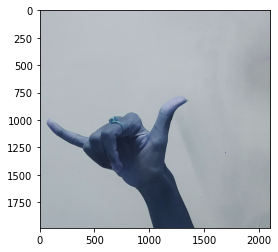

In [11]:
import matplotlib.pyplot as plt
import pyttsx3
engine = pyttsx3.init()
img=cv2.imread('Y_1.jpg')
plt.imshow(img)
img_array = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_array = cv2.resize(img_array, (50, 50))
    
img_array = img_array.reshape(IMAGE_SIZE, IMAGE_SIZE, 1)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)
conf, label=whichi(img_array)
engine.say(label)
engine.runAndWait()


1/1 [==============================] - 0s 21ms/step


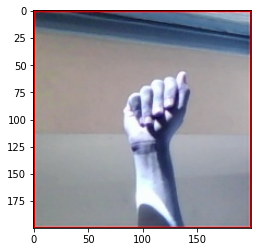

In [12]:
import matplotlib.pyplot as plt
engine = pyttsx3.init()
img=cv2.imread('A511.jpg')
plt.imshow(img)
img_array = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_array = cv2.resize(img_array, (50, 50))
    
img_array = img_array.reshape(IMAGE_SIZE, IMAGE_SIZE, 1)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)
conf, label=whichi(img_array)
engine.say(label)
engine.runAndWait()
